# Chapter I: Histogram of Stocks Indices

* source: https://www.investing.com/indices/major-indices

We are going to plot the histogram for the composite index of:

1. Dow Jones Industrial Average

An index to measure the industrial performance of United States' corporations.

2. Shanghai Stock Composite Index

The SSE Composite Index also known as SSE Index is a stock market index of all stocks (A shares and B shares) that are traded at the Shanghai Stock Exchange.

3. Nikkei 225

The Nikkei 225 is a price-weighted equity index, which consists of 225 stocks in the Prime Market of the Tokyo Stock Exchange. 

4. NASDAQ

NASDAQ is the second-largest stock exchange in the world for investors looking to buy and sell shares of stock. The index consisting of 3000 companies. Used to measure the growth of technology companies in the United States.

5. RTSI

RTS Index is cap-weighted composite index calculated based on prices of the most liquid Russian stocks of the largest & dynamically developing Russian issuers

6. DAX

German Stock Index DAX 30 was formerly known as Deutscher Aktien IndeX 30. It consists of the 30 major German companies trading on the Frankfurt Stock Market.

7. Jakarta Stock Exchange Composite Index 

Used by Indonesia Stock Exchange to measure the performance of Indonesian corporations.

We are going to see :

1. The frequencies of the price of the index that occur the most and the least (monthly data). 

2. The frequencies of the change of the index that occur the most and the least (monthly data). 

If the histogram looks like Poisson or Normal, it does not mean that it will stays that way, things change even if not in an instant. We took the historical data of all time from what is available at the source site, for example the NASDAQ historical price is from 1980.

For the JKSE / IDX, we are going to plot the usual chart for the price.



## DJIA, SSE, Nikkei 225, NASDAQ

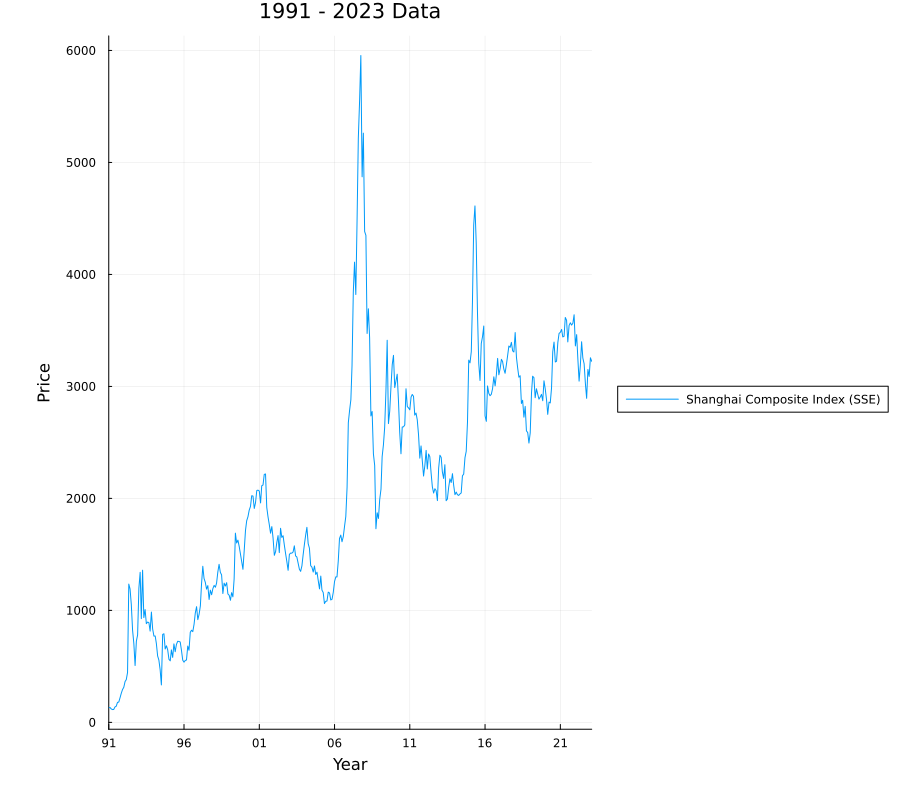

In [1]:
using CSV, DataFrames, Dates, Plots, Plots.PlotMeasures

filesse = "./csv/Shanghai Composite Historical Data.csv"

dfsse = CSV.read(filesse, DataFrame)

dfsse.Price .= parse.(Float64, replace.(dfsse.Price, "," => ""))

dfsse.Dates = Date.(dfsse.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfsse.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTicksse = Dates.format.(tick_years, "yy")
xlimssse = extrema([tick_years; dfsse.Dates])

p1 = plot(dfsse.Dates, dfsse.Price, title="1991 - 2023 Data",
    xticks=(tick_years,DateTicksse), xlims=xlimssse,
    label="Shanghai Composite Index (SSE)", xlabel="", ylabel="")

plot(p1, size=(900,800), layout = (1, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Year", yaxis = "Price")

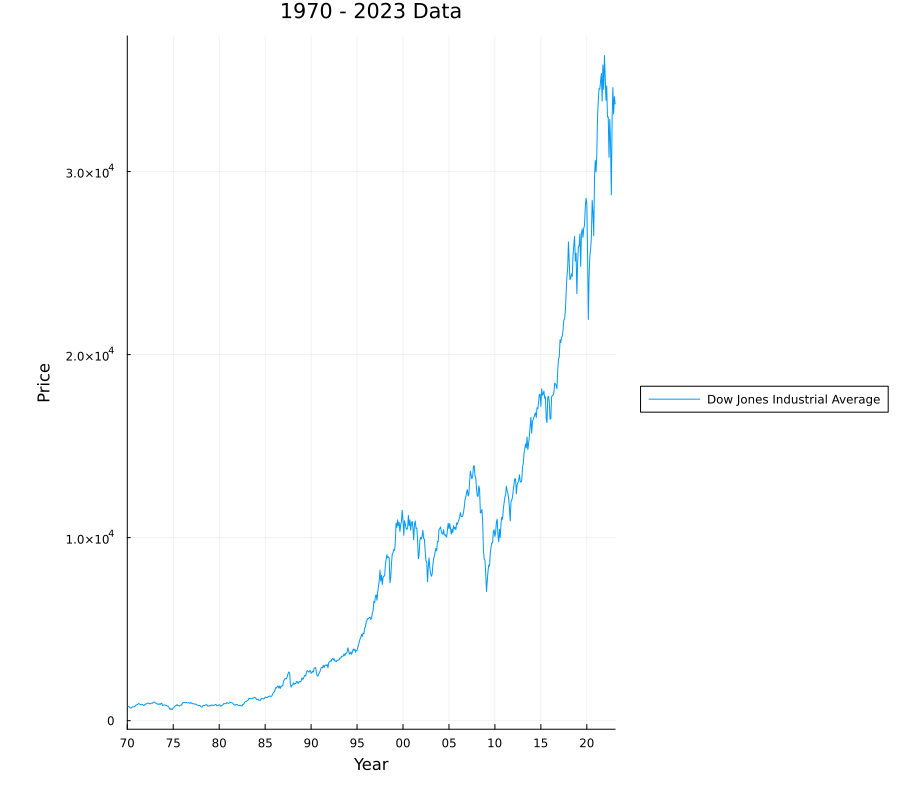

In [2]:
using CSV, DataFrames, Dates, Plots, Plots.PlotMeasures

filedj = "./csv/Dow Jones Industrial Average Historical Data.csv"

dfdj = CSV.read(filedj, DataFrame)

dfdj.Price .= parse.(Float64, replace.(dfdj.Price, "," => ""))

dfdj.Dates = Date.(dfdj.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfdj.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTickdj = Dates.format.(tick_years, "yy")
xlimsdj = extrema([tick_years; dfdj.Dates])

p2 = plot(dfdj.Dates, dfdj.Price, title="1970 - 2023 Data",
    xticks=(tick_years,DateTickdj), xlims=xlimsdj,
    label="Dow Jones Industrial Average", xlabel="", ylabel="")

plot(p2, size=(900,800), layout = (1, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Year", yaxis = "Price")

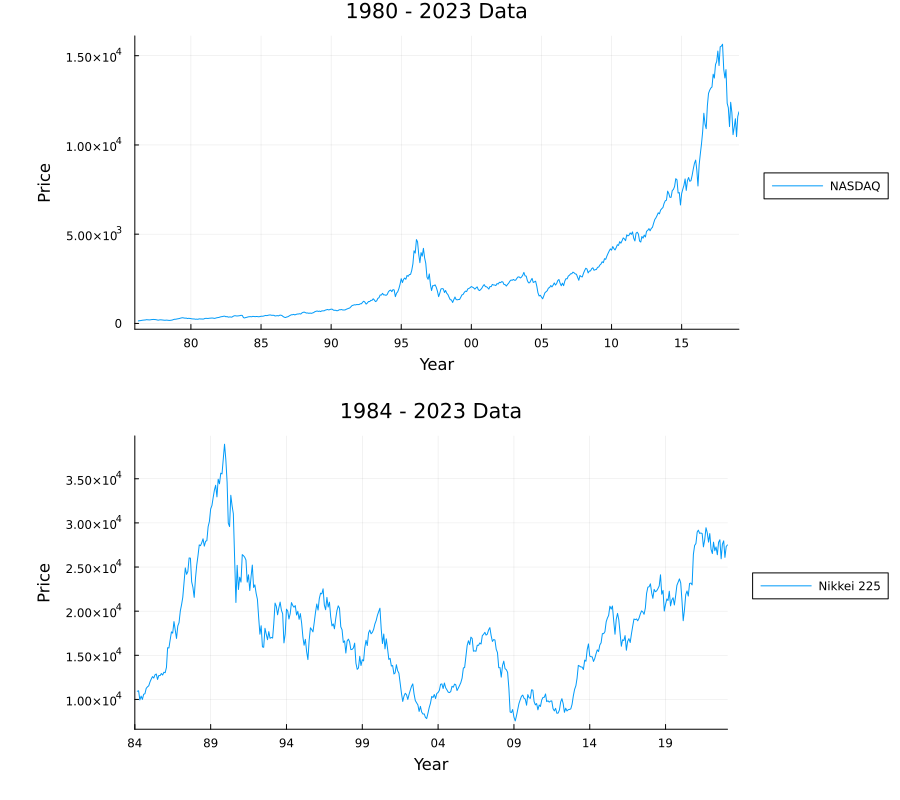

In [3]:
using CSV, DataFrames, Dates, Plots, Plots.PlotMeasures

filenasdaq = "./csv/NASDAQ Composite Historical Data.csv"
filenikkei = "./csv/Nikkei 225 Historical Data.csv"

dfnasdaq = CSV.read(filenasdaq, DataFrame)
dfnikkei = CSV.read(filenikkei, DataFrame)

dfnasdaq.Price .= parse.(Float64, replace.(dfnasdaq.Price, "," => ""))
dfnikkei.Price .= parse.(Float64, replace.(dfnikkei.Price, "," => ""))

dfnasdaq.Dates = Date.(dfnasdaq.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfnasdaq.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTicknasdaq = Dates.format.(tick_years, "yy")
xlimsnasdaq = extrema([tick_years; dfnasdaq.Dates])

dfnikkei.Dates = Date.(dfnikkei.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfnikkei.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTicknikkei = Dates.format.(tick_years, "yy")
xlimsnikkei = extrema([tick_years; dfnikkei.Dates])

p3 = plot(dfnasdaq.Dates, dfnasdaq.Price, title="1980 - 2023 Data",
    xticks=(tick_years,DateTicknasdaq), xlims=xlimsnasdaq,
    label="NASDAQ", xlabel="", ylabel="")
p4 = plot(dfnikkei.Dates, dfnikkei.Price, title="1984 - 2023 Data",
    xticks=(tick_years,DateTicknikkei), xlims=xlimsnikkei,
    label="Nikkei 225", xlabel="", ylabel="")
 
plot(p3, p4, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Year", yaxis = "Price")

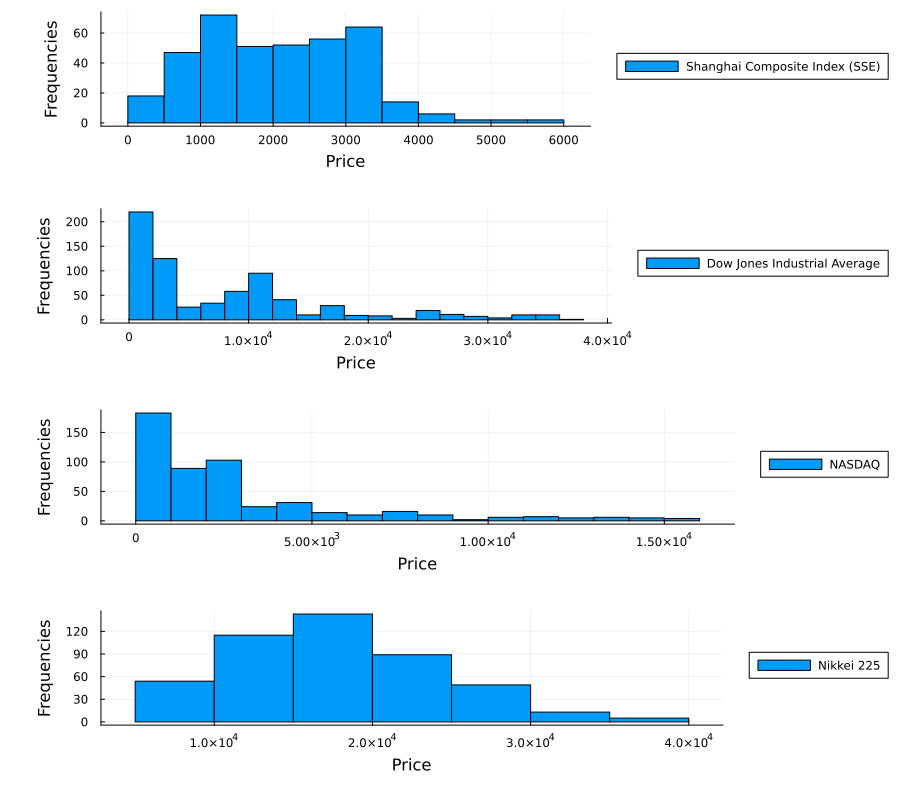

In [4]:
using CSV, DataFrames, Plots, Plots.PlotMeasures

filesse = "./csv/Shanghai Composite Historical Data.csv"
filedj = "./csv/Dow Jones Industrial Average Historical Data.csv"
filenasdaq = "./csv/NASDAQ Composite Historical Data.csv"
filenikkei = "./csv/Nikkei 225 Historical Data.csv"

dfsse = CSV.read(filesse, DataFrame)
dfdj = CSV.read(filedj, DataFrame)
dfnasdaq = CSV.read(filenasdaq, DataFrame)
dfnikkei = CSV.read(filenikkei, DataFrame)

dfsse.Price .= parse.(Float64, replace.(dfsse.Price, "," => ""))
dfdj.Price .= parse.(Float64, replace.(dfdj.Price, "," => ""))
dfnasdaq.Price .= parse.(Float64, replace.(dfnasdaq.Price, "," => ""))
dfnikkei.Price .= parse.(Float64, replace.(dfnikkei.Price, "," => ""))

p1 = histogram(dfsse.Price, title="",
    label="Shanghai Composite Index (SSE)", xlabel="", ylabel="")
p2 = histogram(dfdj.Price, title="",
    label="Dow Jones Industrial Average", xlabel="", ylabel="")
p3 = histogram(dfnasdaq.Price, title="",
    label="NASDAQ", xlabel="", ylabel="")
p4 = histogram(dfnikkei.Price, title="",
    label="Nikkei 225", xlabel="", ylabel="")

plot(p1, p2, p3, p4, size=(900,800), layout = (4, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Price", yaxis = "Frequencies")

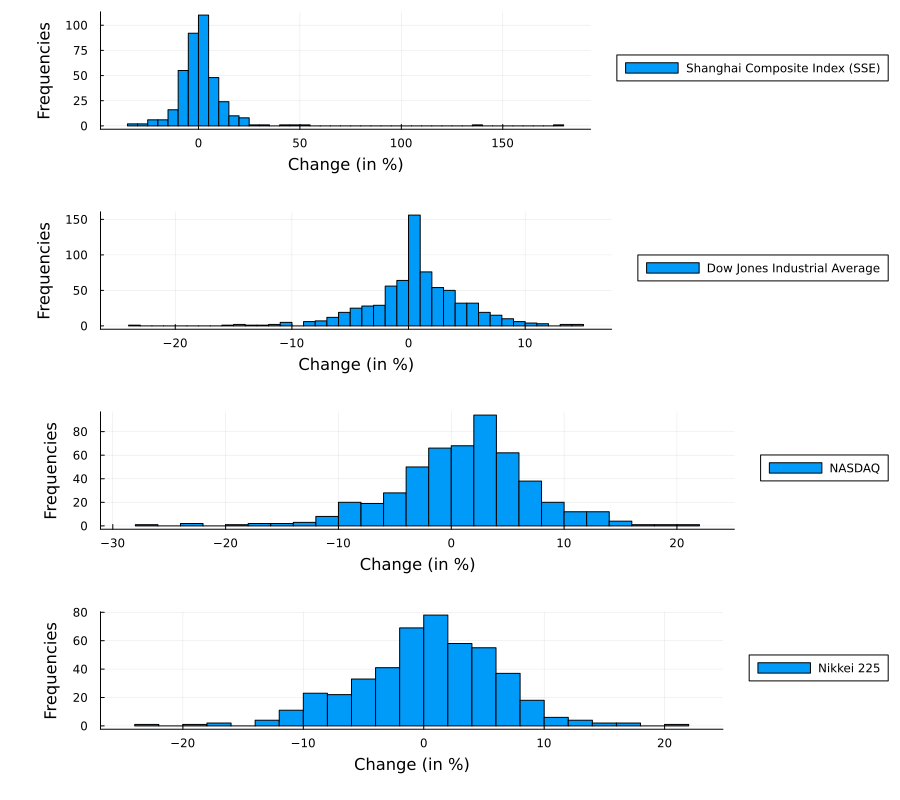

In [5]:
using CSV, DataFrames, Plots, Plots.PlotMeasures

filesse = "./csv/Shanghai Composite Historical Data.csv"
filedj = "./csv/Dow Jones Industrial Average Historical Data.csv"
filenasdaq = "./csv/NASDAQ Composite Historical Data.csv"
filenikkei = "./csv/Nikkei 225 Historical Data.csv"

dfsse = CSV.read(filesse, DataFrame)
dfdj = CSV.read(filedj, DataFrame)
dfnasdaq = CSV.read(filenasdaq, DataFrame)
dfnikkei = CSV.read(filenikkei, DataFrame)

dfsse[!,"Change %"] .= parse.(Float64, replace.(dfsse[!,"Change %"], "%" => ""))
dfdj[!,"Change %"] .= parse.(Float64, replace.(dfdj[!,"Change %"], "%" => ""))
dfnasdaq[!,"Change %"] .= parse.(Float64, replace.(dfnasdaq[!,"Change %"], "%" => ""))
dfnikkei[!,"Change %"] .= parse.(Float64, replace.(dfnikkei[!,"Change %"], "%" => ""))

p1 = histogram(dfsse[!,"Change %"], title="",
    label="Shanghai Composite Index (SSE)", xlabel="", ylabel="")
p2 = histogram(dfdj[!,"Change %"], title="",
    label="Dow Jones Industrial Average", xlabel="", ylabel="")
p3 = histogram(dfnasdaq[!,"Change %"], title="",
    label="NASDAQ", xlabel="", ylabel="")
p4 = histogram(dfnikkei[!,"Change %"], title="",
    label="Nikkei 225", xlabel="", ylabel="")

plot(p1, p2, p3, p4, size=(900,800), layout = (4, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Change (in %)", yaxis = "Frequencies")

## RTSI (Russia) and DAX (Germany)

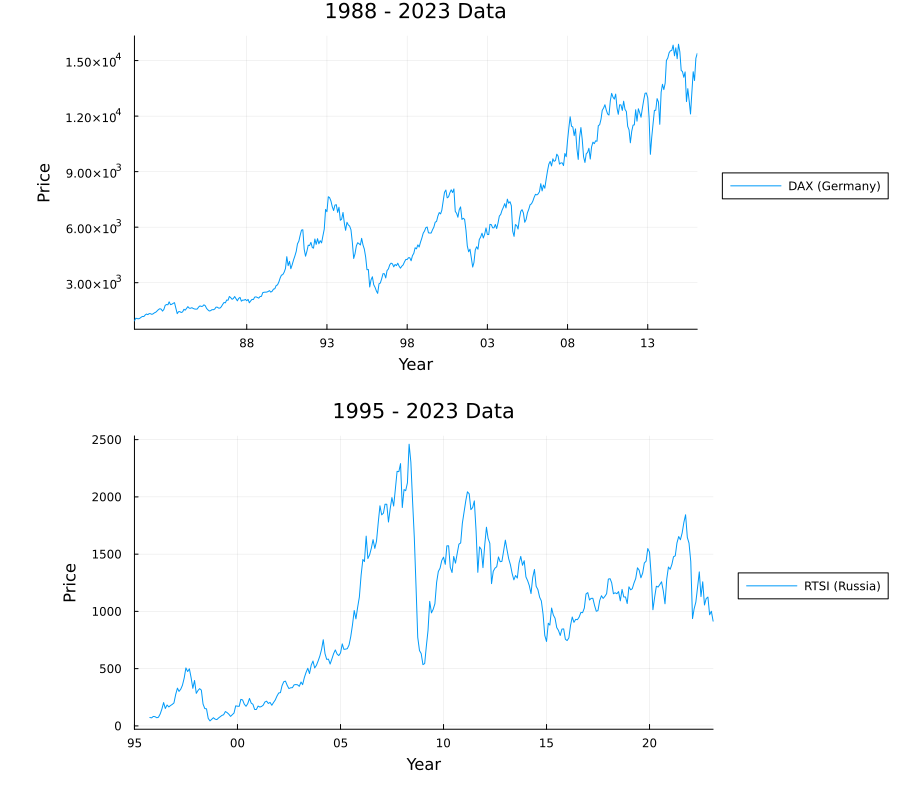

In [6]:
using CSV, DataFrames, Dates, Plots, Plots.PlotMeasures

filedax = "./csv/DAX Historical Data.csv"
filertsi = "./csv/RTSI Historical Data.csv"

dfdax = CSV.read(filedax, DataFrame)
dfrtsi = CSV.read(filertsi, DataFrame)

dfdax.Price .= parse.(Float64, replace.(dfdax.Price, "," => ""))
dfrtsi.Price .= parse.(Float64, replace.(dfrtsi.Price, "," => ""))

dfdax.Dates = Date.(dfdax.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfdax.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTickdax = Dates.format.(tick_years, "yy")
xlimsdax = extrema([tick_years; dfdax.Dates])

dfrtsi.Dates = Date.(dfrtsi.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfrtsi.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTickrtsi = Dates.format.(tick_years, "yy")
xlimsrtsi = extrema([tick_years; dfrtsi.Dates])

p1 = plot(dfdax.Dates, dfdax.Price, title="1988 - 2023 Data",
    xticks=(tick_years,DateTickdax), xlims=xlimsdax,
    label="DAX (Germany)", xlabel="", ylabel="")
p2 = plot(dfrtsi.Dates, dfrtsi.Price, title="1995 - 2023 Data",
    xticks=(tick_years,DateTickrtsi), xlims=xlimsrtsi,
    label="RTSI (Russia)", xlabel="", ylabel="")
 
plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Year", yaxis = "Price")

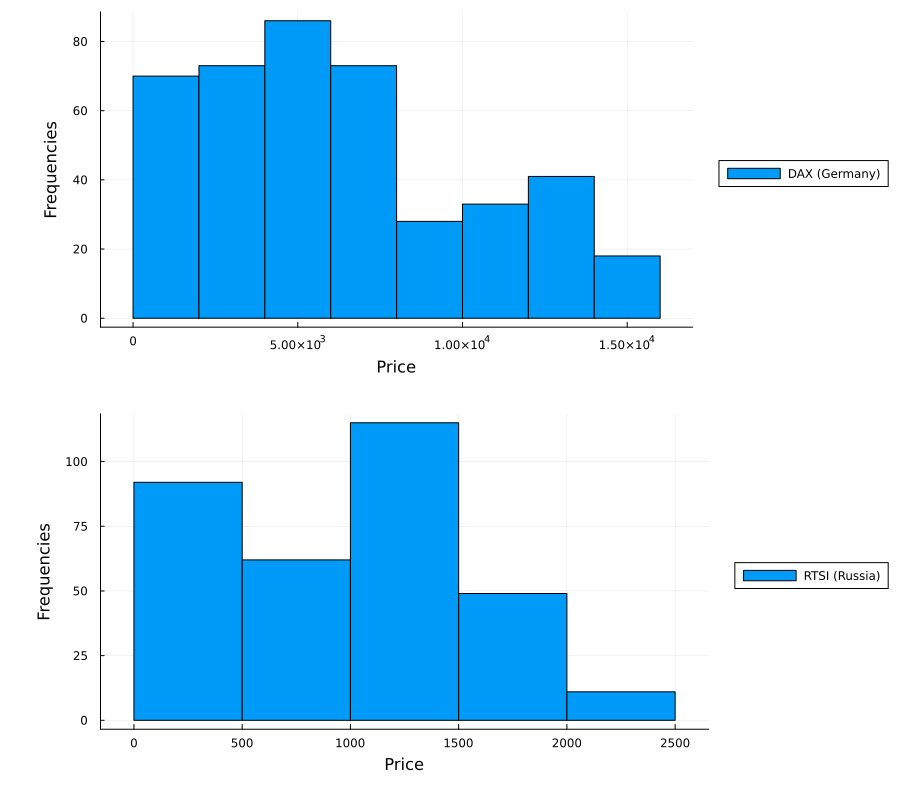

In [7]:
using CSV, DataFrames, Plots, Plots.PlotMeasures

filedax = "./csv/DAX Historical Data.csv"
filertsi = "./csv/RTSI Historical Data.csv"

dfdax = CSV.read(filedax, DataFrame)
dfrtsi = CSV.read(filertsi, DataFrame)

dfdax.Price .= parse.(Float64, replace.(dfdax.Price, "," => ""))
dfrtsi.Price .= parse.(Float64, replace.(dfrtsi.Price, "," => ""))

p1 = histogram(dfdax.Price, title="",
    label="DAX (Germany)", xlabel="", ylabel="")
p2 = histogram(dfrtsi.Price, title="",
    label="RTSI (Russia)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Price", yaxis = "Frequencies")

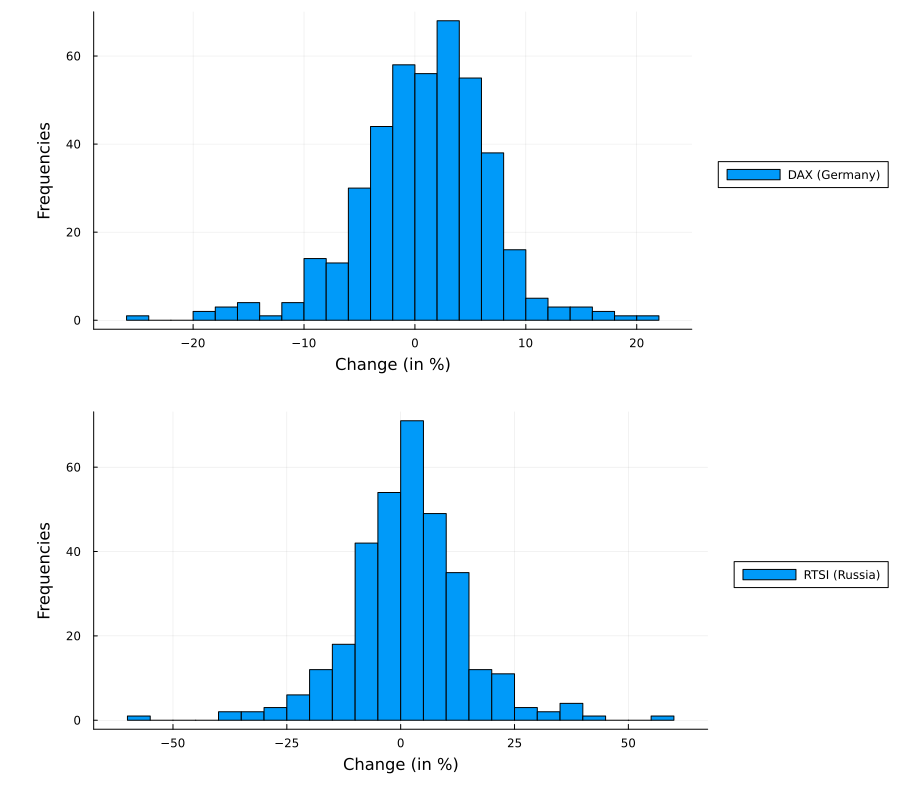

In [8]:
using CSV, DataFrames, Plots, Plots.PlotMeasures

filedax = "./csv/DAX Historical Data.csv"
filertsi = "./csv/RTSI Historical Data.csv"

dfdax = CSV.read(filedax, DataFrame)
dfrtsi = CSV.read(filertsi, DataFrame)

dfdax[!,"Change %"] .= parse.(Float64, replace.(dfdax[!,"Change %"], "%" => ""))
dfrtsi[!,"Change %"] .= parse.(Float64, replace.(dfrtsi[!,"Change %"], "%" => ""))

p1 = histogram(dfdax[!,"Change %"], title="",
    label="DAX (Germany)", xlabel="", ylabel="")
p2 = histogram(dfrtsi[!,"Change %"], title="",
    label="RTSI (Russia)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "Change (in %)", yaxis = "Frequencies")

## Indonesia Stock Exchange (JKSE / IDX) 

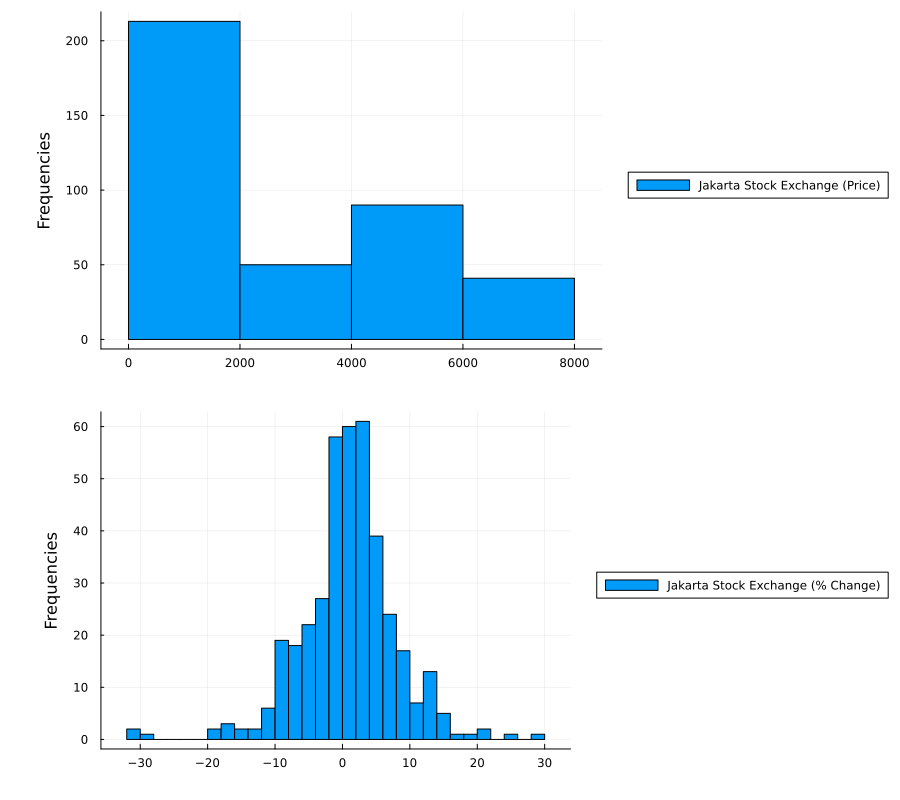

In [9]:
using CSV, DataFrames, Plots, Plots.PlotMeasures

filejak = "./csv/Jakarta Stock Exchange Composite Index Historical Data.csv"

dfjak = CSV.read(filejak, DataFrame)

dfjak.Price .= parse.(Float64, replace.(dfjak.Price, "," => ""))
dfjak[!,"Change %"] .= parse.(Float64, replace.(dfjak[!,"Change %"], "%" => ""))

p1 = histogram(dfjak.Price, title="",
    label="Jakarta Stock Exchange (Price)", xlabel="", ylabel="")
p2 = histogram(dfjak[!,"Change %"], title="",
    label="Jakarta Stock Exchange (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Frequencies")


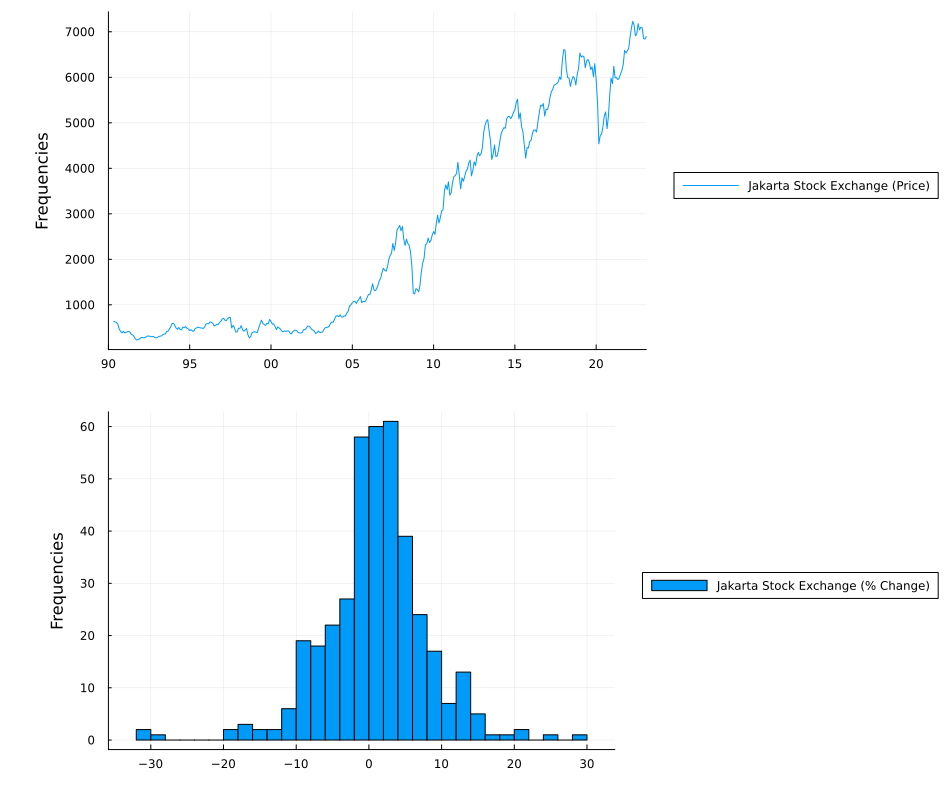

In [10]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filejak = "./csv/Jakarta Stock Exchange Composite Index Historical Data.csv"

dfjak = CSV.read(filejak, DataFrame)

dfjak.Price .= parse.(Float64, replace.(dfjak.Price, "," => ""))
dfjak[!,"Change %"] .= parse.(Float64, replace.(dfjak[!,"Change %"], "%" => ""))

dfjak.Dates = Date.(dfjak.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfjak.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsjak = extrema([tick_years; dfjak.Dates])

p1 = plot(dfjak.Dates, dfjak.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsjak,
    label="Jakarta Stock Exchange (Price)", xlabel="", ylabel="")
p2 = histogram(dfjak.Date, dfjak[!,"Change %"], title="",
    label="Jakarta Stock Exchange (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(950,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Frequencies")


# Chapter II: IDX Stocks

Source: https://www.investing.com/indices/idx-composite

We will list few stocks that are on our watchlist along with our estimation to the price we think is good enough, our own book value based on balance sheet, financial statement, not intuition.

1. Adhi Karya (ADHI) -> Construction

* Book value: 1604

2. Bukit Sentul / Sentul City (BKSL) -> Property

* Book value: 161

3. Bank Mandiri (BMRI) -> Banking

* Book value: 4921

4. Bakrie and Brothers (BNBR) -> Infrastructure and manufacturing

* Book value: 67.91
    
5. Barito Pacific (BRPT) -> Petrochemical

* Book value: 712

6. Bank Victoria (BVIC) -> Banking

* Book value: 318

7. Energi Mega Persada (ENRG) -> Oil

* Book value: 297

8. XL Axiata (EXCL)-> Telecommunication

* Book value: 1929

9. Gudang Garam -> Cigarettes and Kretek

* Book value: 29342

10. Garuda Indonesia (GIAA) -> State-Owned Airline

* Book value: -150

11. Gajah Tunggal (GJTL) -> Tires and Rubber

* Book value: 1981

12. Indonesia Air (IATA) -> Airlines management then under MNC Energy Investments 

* Book value: 116

13. Indika Energy (INDY) -> Coal

* Book value: 2548

14. Indah Kiat Pulp & Paper (INKP) -> Pulp and Paper

* Book value: 13048

15. Sky Energy (JSKY) -> Solar power

* Book value: 114

16. Jasa Marga (JSMR) -> Toll Road operator

* Book value: 2963

17. Kimia Farma (KAEF) -> Pharmacy

* Book value: 1297

18. Lippo Karawaci (LPKR) -> Property

* Book value: 236

19. Bank Mega (MEGA) -> Banking

* Book value: 1757

20. Industri Jamu dan Farmasi Sidomuncul (SIDO) -> Traditional medicine and candies

* Book value: 116

21. Waskita Karya (WSKT) -> Construction

* Book value: 305

## Adhi Karya

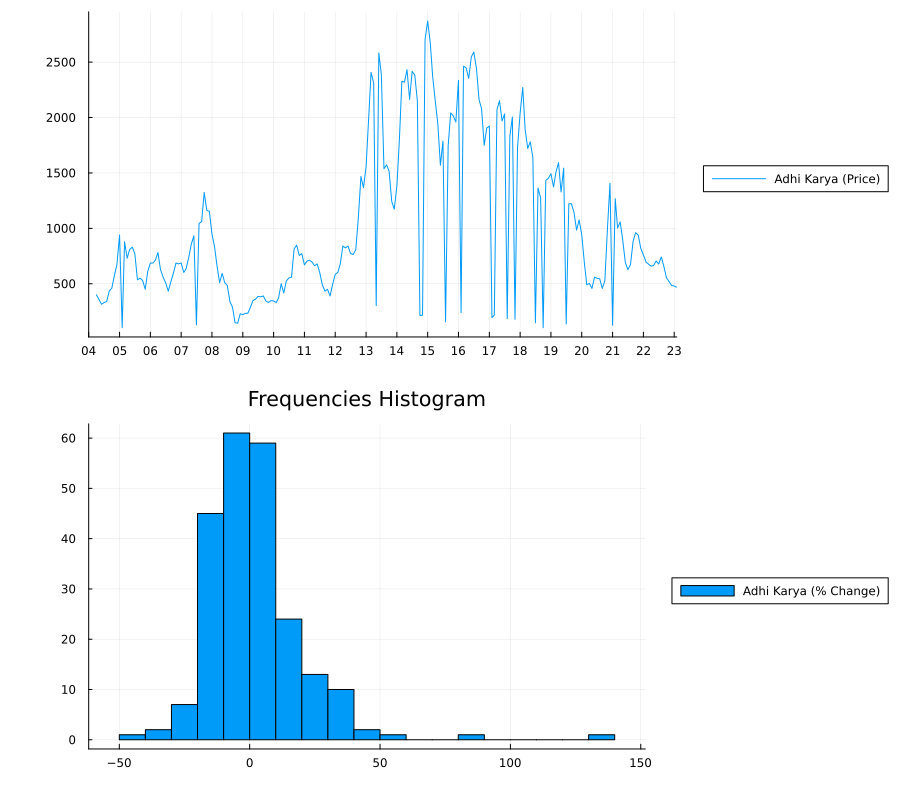

In [11]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileadhi = "./csv/IDX-Stocks/ADHI Historical Data.csv"

dfadhi = CSV.read(fileadhi, DataFrame)

dfadhi.Price .= parse.(Float64, replace.(dfadhi.Price, "," => ""))
dfadhi[!,"Change %"] .= parse.(Float64, replace.(dfadhi[!,"Change %"], "%" => ""))

dfadhi.Dates = Date.(dfadhi.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfadhi.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsadhi = extrema([tick_years; dfadhi.Dates])

p1 = plot(dfadhi.Dates, dfadhi.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsadhi,
    label="Adhi Karya (Price)", xlabel="", ylabel="")
p2 = histogram(dfadhi.Date, dfadhi[!,"Change %"], title="Frequencies Histogram",
    label="Adhi Karya (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


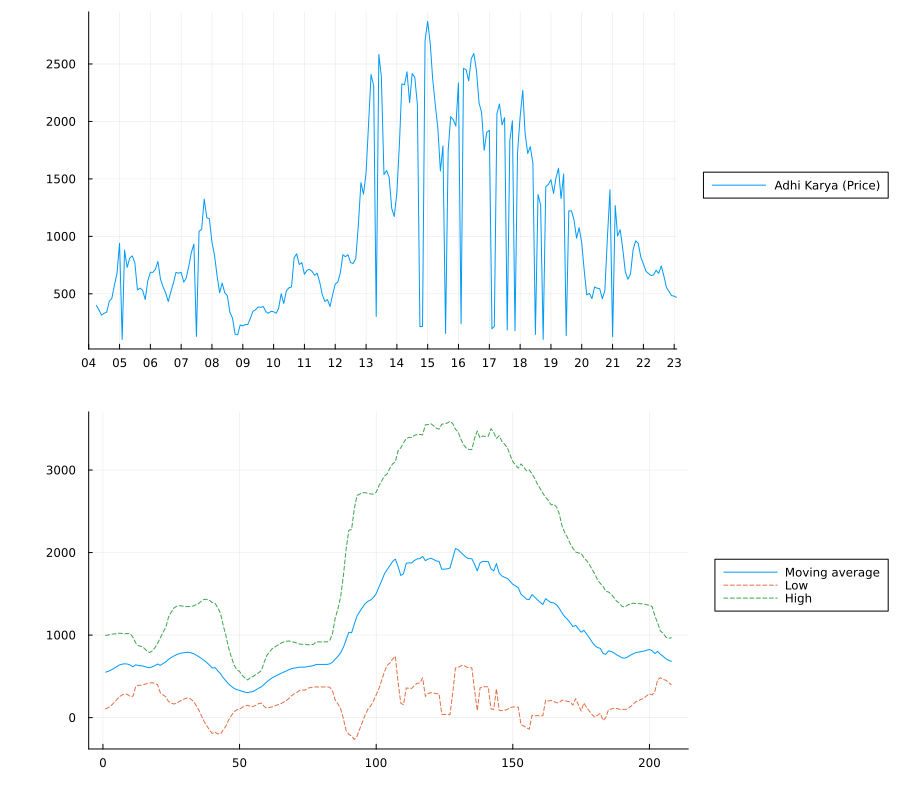

In [12]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileadhi = "./csv/IDX-Stocks/ADHI Historical Data.csv"

dfadhi = CSV.read(fileadhi, DataFrame)

dfadhi.Price .= parse.(Float64, replace.(dfadhi.Price, "," => ""))
dfadhi[!,"Change %"] .= parse.(Float64, replace.(dfadhi[!,"Change %"], "%" => ""))

dfadhi.Dates = Date.(dfadhi.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfadhi.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsadhi = extrema([tick_years; dfadhi.Dates])

p1 = plot(dfadhi.Dates, dfadhi.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsadhi,
    label="Adhi Karya (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfadhi.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


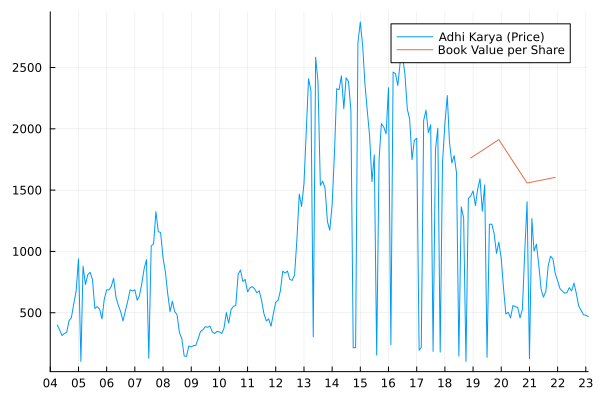

In [1]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileadhi = "./csv/IDX-Stocks/ADHI Historical Data.csv"

dfadhi = CSV.read(fileadhi, DataFrame)

dfadhi.Price .= parse.(Float64, replace.(dfadhi.Price, "," => ""))
dfadhi[!,"Change %"] .= parse.(Float64, replace.(dfadhi[!,"Change %"], "%" => ""))

dfadhi.Dates = Date.(dfadhi.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfadhi.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsadhi = extrema([tick_years; dfadhi.Dates])

plot(dfadhi.Dates, dfadhi.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsadhi,
    label="Adhi Karya (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [1762, 1912, 1558, 1604];
plot!(x,y, label="Book Value per Share")

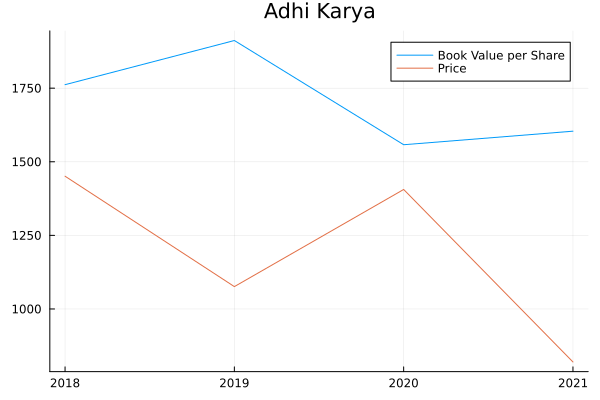

In [13]:
using Plots
gr()

# Set Book Value per Share
x = [2018, 2019, 2020, 2021];
y = [1762, 1912, 1558, 1604];
p = [1451, 1076, 1406, 820];
plot(x,y, label="Book Value per Share")

plot!(x,p, label="Price", title="Adhi Karya")


## Bukit Sentul

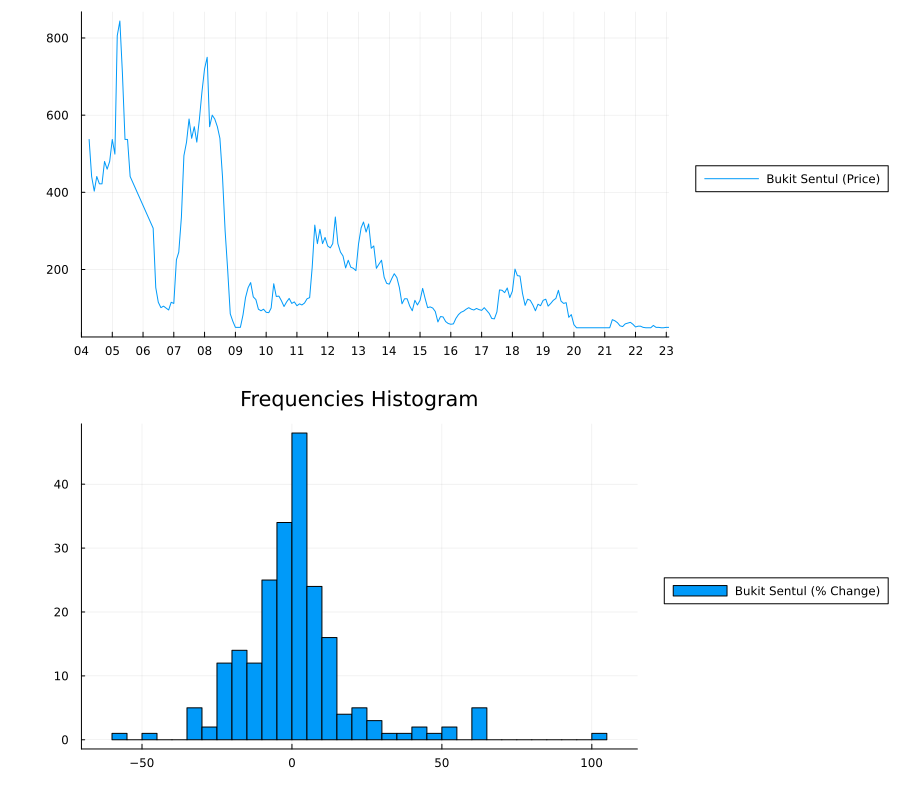

In [14]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebksl = "./csv/IDX-Stocks/BKSL Historical Data.csv"

dfbksl = CSV.read(filebksl, DataFrame)

dfbksl[!,"Change %"] .= parse.(Float64, replace.(dfbksl[!,"Change %"], "%" => ""))

dfbksl.Dates = Date.(dfbksl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbksl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbksl = extrema([tick_years; dfbksl.Dates])

p1 = plot(dfbksl.Dates, dfbksl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbksl,
    label="Bukit Sentul (Price)", xlabel="", ylabel="")
p2 = histogram(dfbksl.Date, dfbksl[!,"Change %"], title="Frequencies Histogram",
    label="Bukit Sentul (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


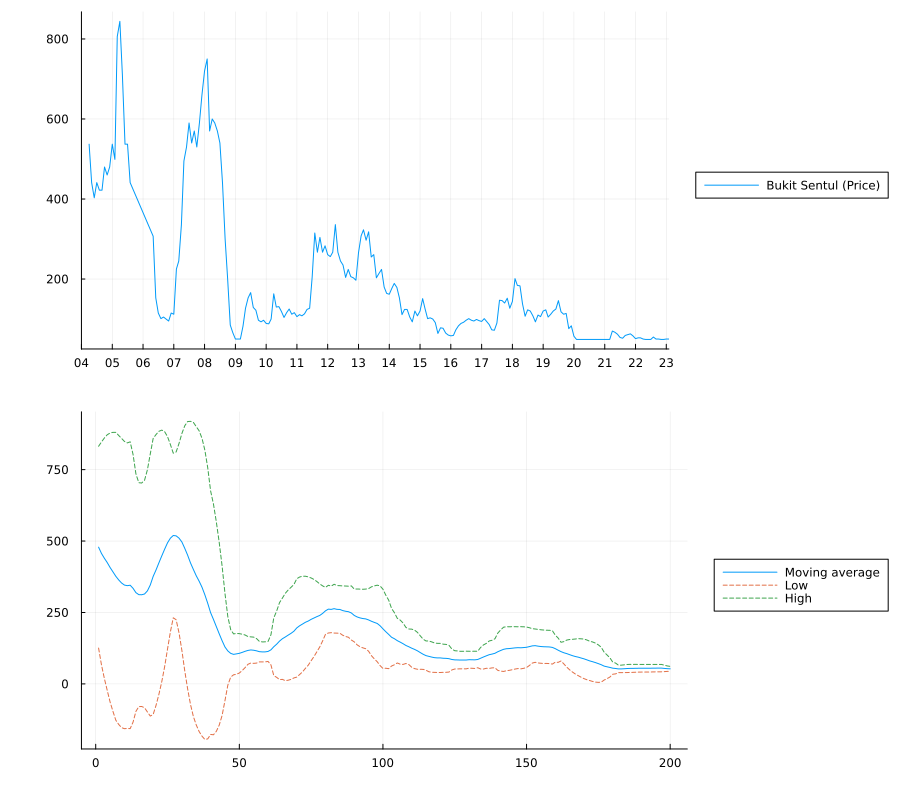

In [15]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebksl = "./csv/IDX-Stocks/BKSL Historical Data.csv"

dfbksl = CSV.read(filebksl, DataFrame)

dfbksl[!,"Change %"] .= parse.(Float64, replace.(dfbksl[!,"Change %"], "%" => ""))

dfbksl.Dates = Date.(dfbksl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbksl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbksl = extrema([tick_years; dfbksl.Dates])

p1 = plot(dfbksl.Dates, dfbksl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbksl,
    label="Bukit Sentul (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfbksl.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


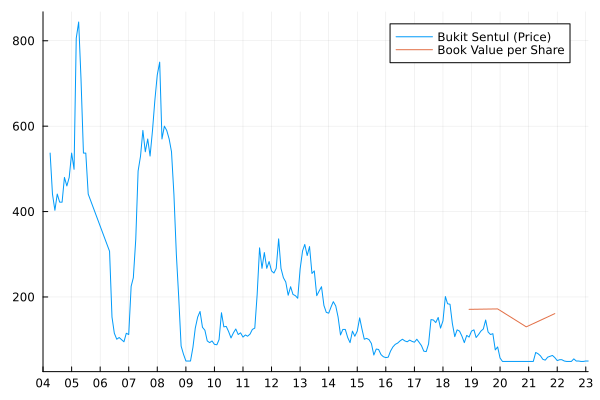

In [4]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebksl = "./csv/IDX-Stocks/BKSL Historical Data.csv"

dfbksl = CSV.read(filebksl, DataFrame)

dfbksl[!,"Change %"] .= parse.(Float64, replace.(dfbksl[!,"Change %"], "%" => ""))

dfbksl.Dates = Date.(dfbksl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbksl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbksl = extrema([tick_years; dfbksl.Dates])

plot(dfbksl.Dates, dfbksl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbksl,
    label="Bukit Sentul (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [171, 172, 130, 161];
plot!(x,y, label="Book Value per Share")

## Bank Mandiri

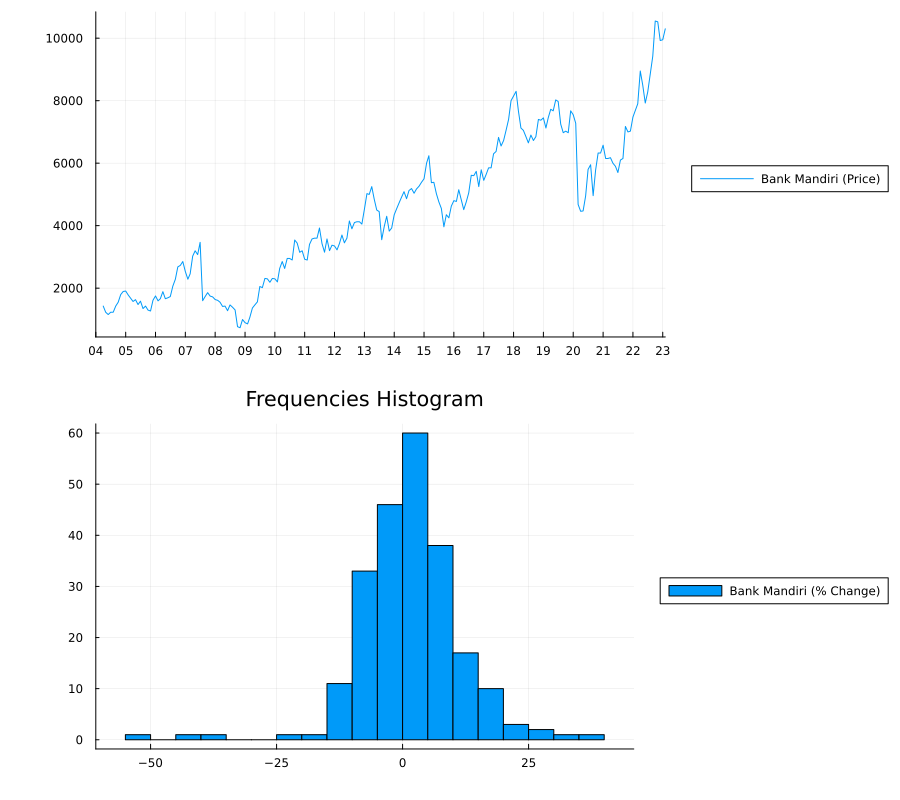

In [16]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebmri = "./csv/IDX-Stocks/BMRI Historical Data.csv"

dfbmri = CSV.read(filebmri, DataFrame)

dfbmri.Price .= parse.(Float64, replace.(dfbmri.Price, "," => ""))
dfbmri[!,"Change %"] .= parse.(Float64, replace.(dfbmri[!,"Change %"], "%" => ""))

dfbmri.Dates = Date.(dfbmri.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbmri.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbmri = extrema([tick_years; dfbmri.Dates])

p1 = plot(dfbmri.Dates, dfbmri.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbmri,
    label="Bank Mandiri (Price)", xlabel="", ylabel="")
p2 = histogram(dfbmri.Date, dfbmri[!,"Change %"], title="Frequencies Histogram",
    label="Bank Mandiri (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")

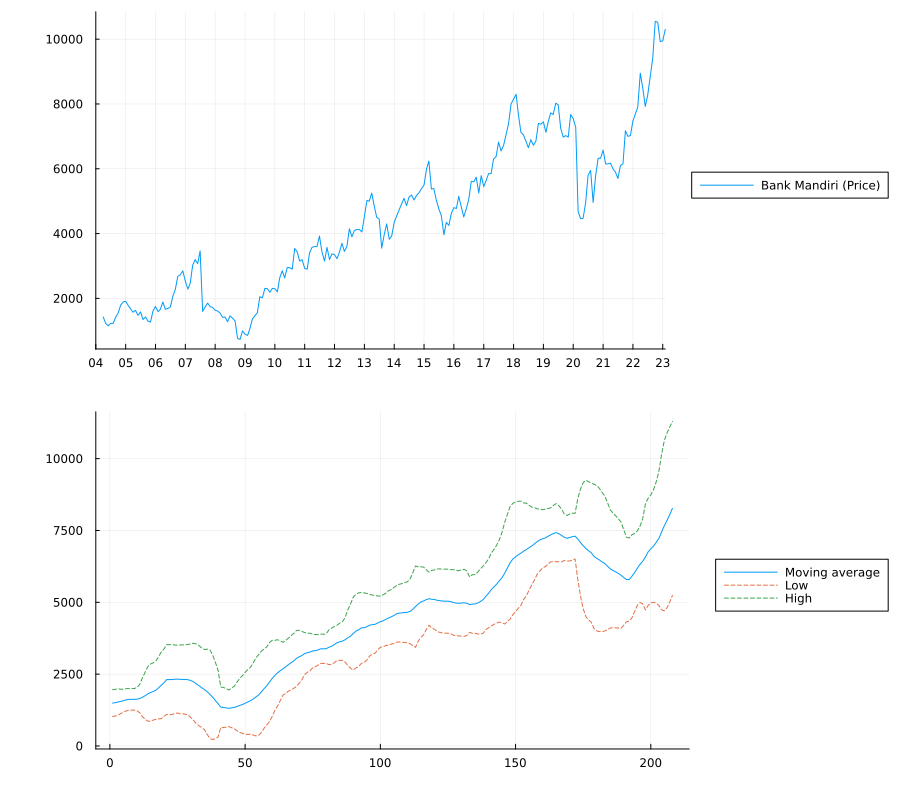

In [17]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebmri = "./csv/IDX-Stocks/BMRI Historical Data.csv"

dfbmri = CSV.read(filebmri, DataFrame)

dfbmri.Price .= parse.(Float64, replace.(dfbmri.Price, "," => ""))
dfbmri[!,"Change %"] .= parse.(Float64, replace.(dfbmri[!,"Change %"], "%" => ""))

dfbmri.Dates = Date.(dfbmri.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbmri.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbmri = extrema([tick_years; dfbmri.Dates])

p1 = plot(dfbmri.Dates, dfbmri.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbmri,
    label="Bank Mandiri (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfbmri.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


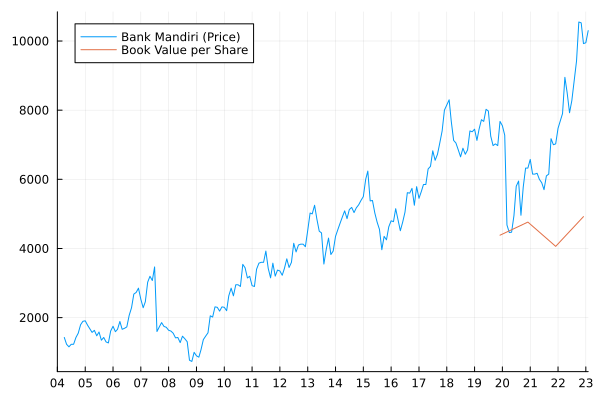

In [5]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebmri = "./csv/IDX-Stocks/BMRI Historical Data.csv"

dfbmri = CSV.read(filebmri, DataFrame)

dfbmri.Price .= parse.(Float64, replace.(dfbmri.Price, "," => ""))
dfbmri[!,"Change %"] .= parse.(Float64, replace.(dfbmri[!,"Change %"], "%" => ""))

dfbmri.Dates = Date.(dfbmri.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbmri.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbmri = extrema([tick_years; dfbmri.Dates])

plot(dfbmri.Dates, dfbmri.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbmri,
    label="Bank Mandiri (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y"), Date("01/12/2022", "d/m/y")];
y = [4384, 4763, 4061, 4921];
plot!(x,y, label="Book Value per Share")

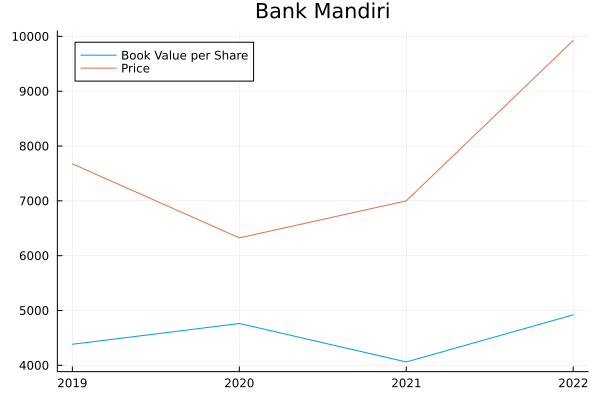

In [18]:
using Plots
gr()

# Set Book Value per Share
x = [2019, 2020, 2021, 2022];
y = [4384, 4763, 4061, 4921];
p = [7675, 6325, 7000, 9925];

plot(x,y, label="Book Value per Share")

plot!(x,p, label="Price", title="Bank Mandiri")


## Bakrie and Brothers

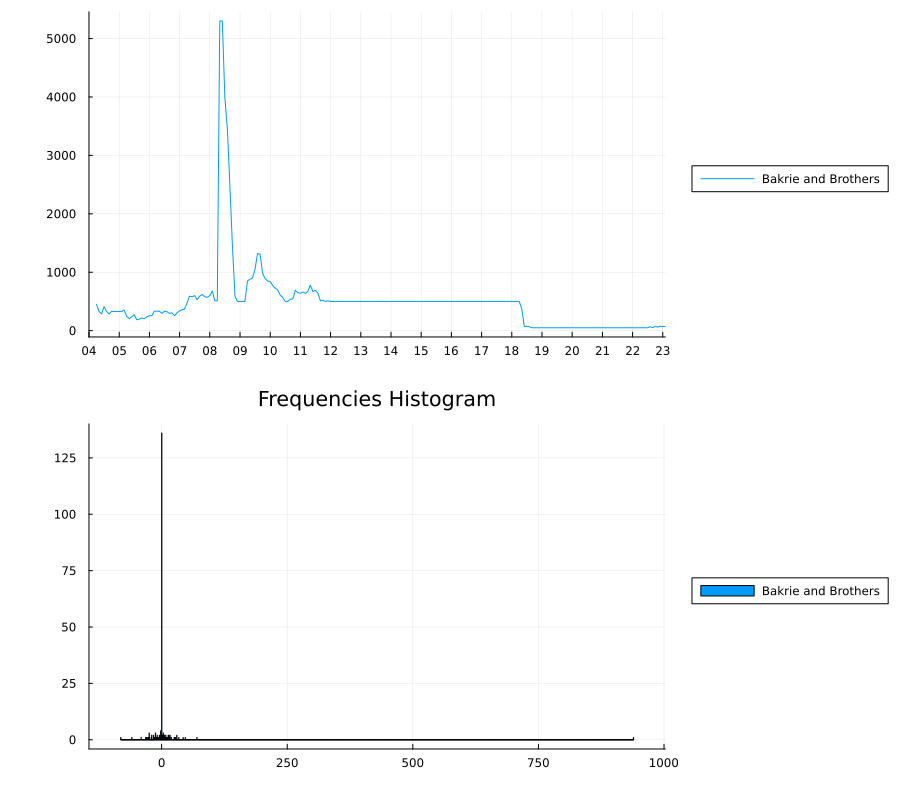

In [19]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebnbr = "./csv/IDX-Stocks/BNBR Historical Data.csv"

dfbnbr = CSV.read(filebnbr, DataFrame)

dfbnbr.Price .= parse.(Float64, replace.(dfbnbr.Price, "," => ""))
dfbnbr[!,"Change %"] .= parse.(Float64, replace.(dfbnbr[!,"Change %"], "%" => ""))

dfbnbr.Dates = Date.(dfbnbr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbnbr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbnbr = extrema([tick_years; dfbnbr.Dates])

p1 = plot(dfbnbr.Dates, dfbnbr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbnbr,
    label="Bakrie and Brothers", xlabel="", ylabel="")
p2 = histogram(dfbnbr.Date, dfbnbr[!,"Change %"], title="Frequencies Histogram",
    label="Bakrie and Brothers", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")

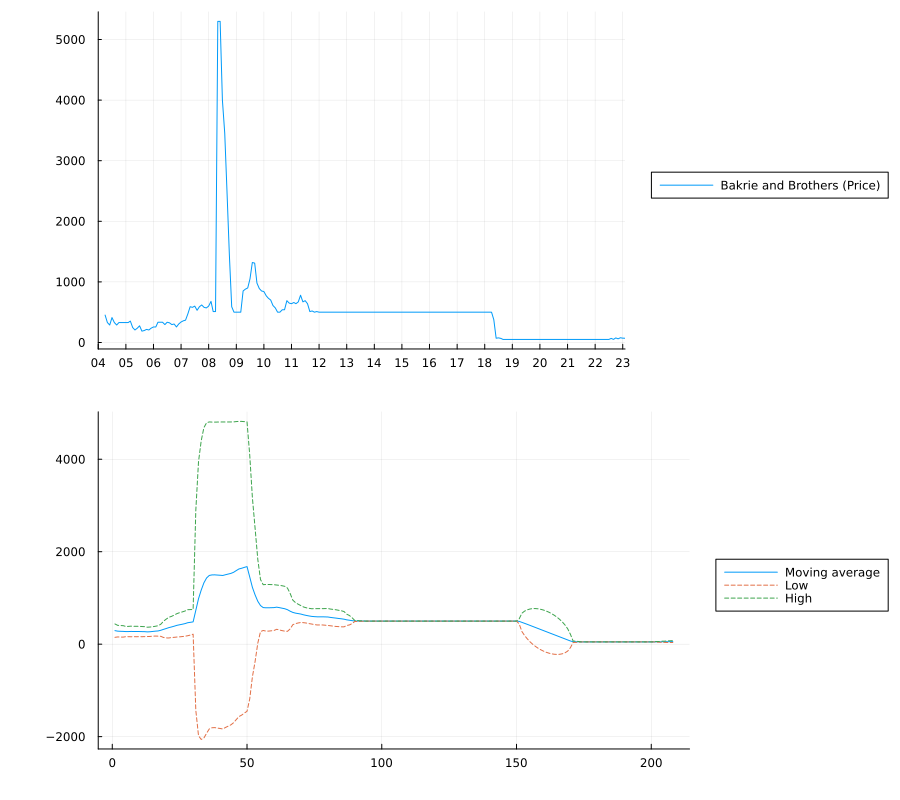

In [20]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebnbr = "./csv/IDX-Stocks/BNBR Historical Data.csv"

dfbnbr = CSV.read(filebnbr, DataFrame)

dfbnbr.Price .= parse.(Float64, replace.(dfbnbr.Price, "," => ""))
dfbnbr[!,"Change %"] .= parse.(Float64, replace.(dfbnbr[!,"Change %"], "%" => ""))

dfbnbr.Dates = Date.(dfbnbr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbnbr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbnbr = extrema([tick_years; dfbnbr.Dates])

p1 = plot(dfbnbr.Dates, dfbnbr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbnbr,
    label="Bakrie and Brothers (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfbnbr.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Barito Pacific

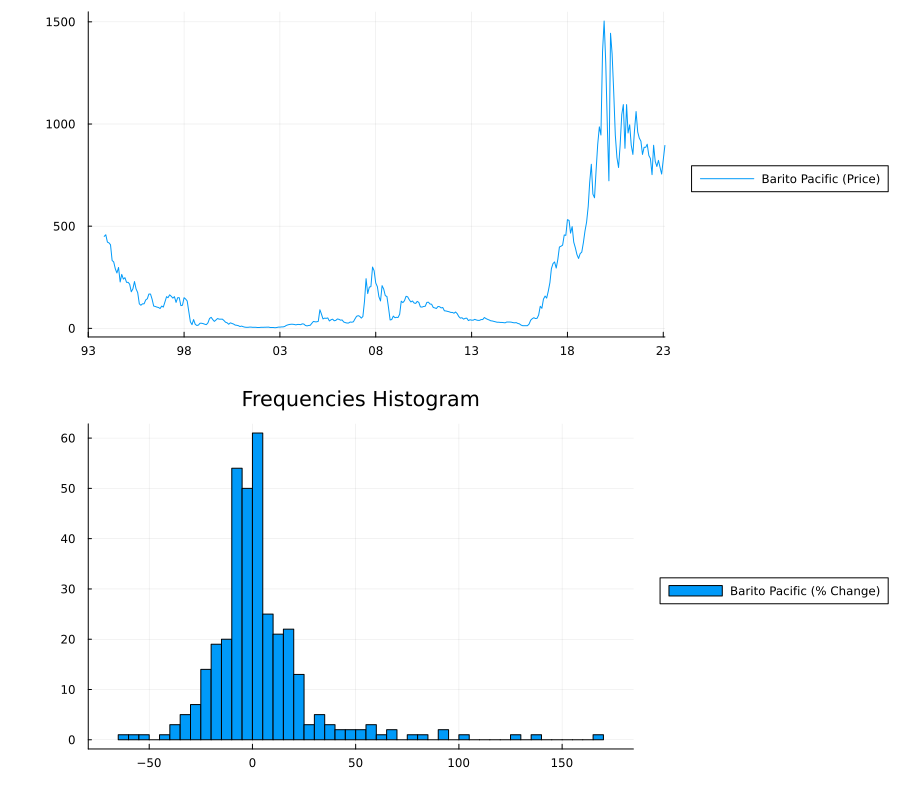

In [21]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebrpt = "./csv/IDX-Stocks/BRPT Historical Data.csv"

dfbrpt = CSV.read(filebrpt, DataFrame)

dfbrpt.Price .= parse.(Float64, replace.(dfbrpt.Price, "," => ""))
dfbrpt[!,"Change %"] .= parse.(Float64, replace.(dfbrpt[!,"Change %"], "%" => ""))

dfbrpt.Dates = Date.(dfbrpt.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbrpt.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsbrpt = extrema([tick_years; dfbrpt.Dates])

p1 = plot(dfbrpt.Dates, dfbrpt.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbrpt,
    label="Barito Pacific (Price)", xlabel="", ylabel="")
p2 = histogram(dfbrpt.Date, dfbrpt[!,"Change %"], title="Frequencies Histogram",
    label="Barito Pacific (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


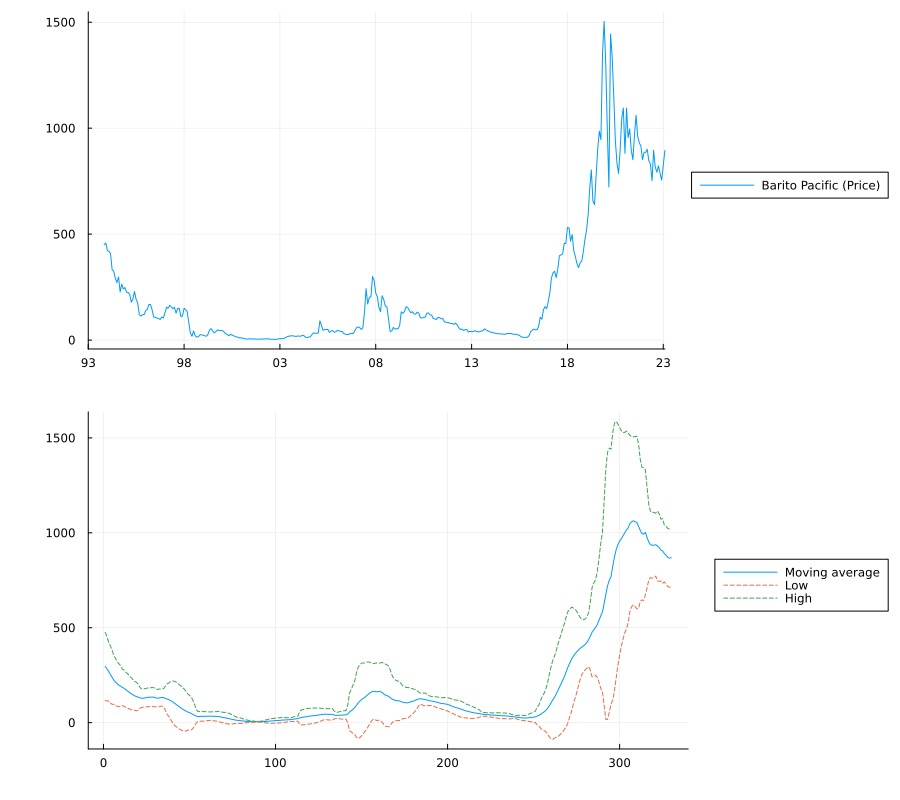

In [22]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebrpt = "./csv/IDX-Stocks/BRPT Historical Data.csv"

dfbrpt = CSV.read(filebrpt, DataFrame)

dfbrpt.Price .= parse.(Float64, replace.(dfbrpt.Price, "," => ""))
dfbrpt[!,"Change %"] .= parse.(Float64, replace.(dfbrpt[!,"Change %"], "%" => ""))

dfbrpt.Dates = Date.(dfbrpt.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbrpt.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsbrpt = extrema([tick_years; dfbrpt.Dates])

p1 = plot(dfbrpt.Dates, dfbrpt.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbrpt,
    label="Barito Pacific (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfbrpt.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


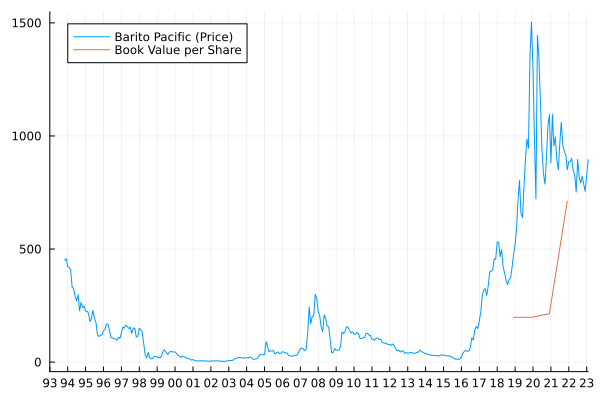

In [8]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebrpt = "./csv/IDX-Stocks/BRPT Historical Data.csv"

dfbrpt = CSV.read(filebrpt, DataFrame)

dfbrpt.Price .= parse.(Float64, replace.(dfbrpt.Price, "," => ""))
dfbrpt[!,"Change %"] .= parse.(Float64, replace.(dfbrpt[!,"Change %"], "%" => ""))

dfbrpt.Dates = Date.(dfbrpt.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbrpt.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbrpt = extrema([tick_years; dfbrpt.Dates])

plot(dfbrpt.Dates, dfbrpt.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbrpt,
    label="Barito Pacific (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [198, 198, 214, 712];
plot!(x,y, label="Book Value per Share")

## Bank Victoria

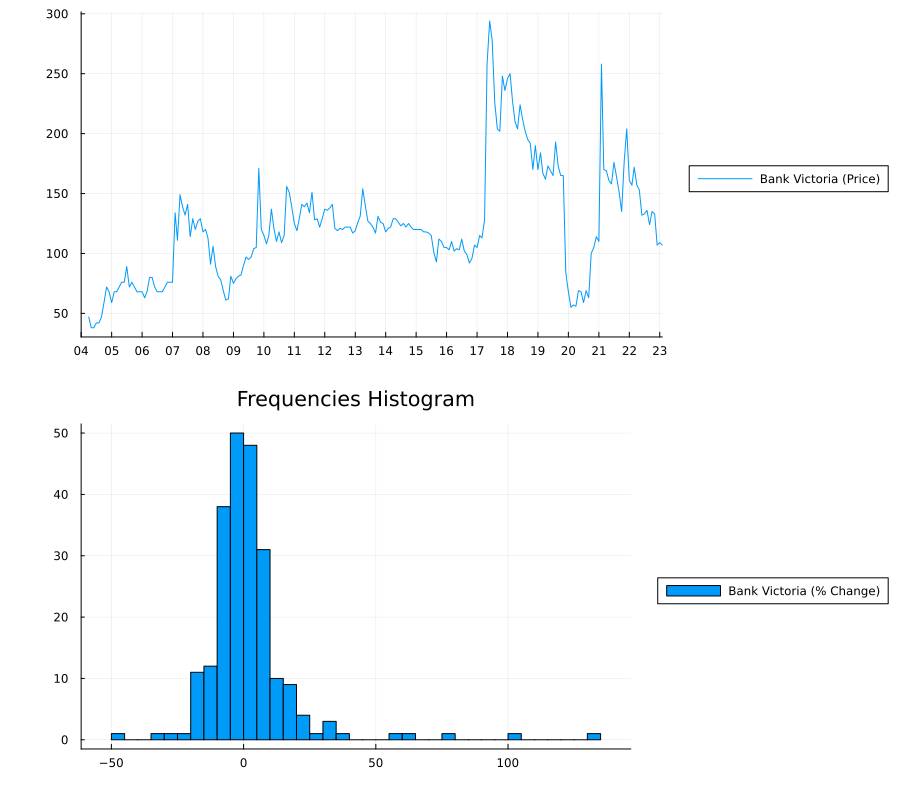

In [22]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures


filebvic = "./csv/IDX-Stocks/BVIC Historical Data.csv"

dfbvic = CSV.read(filebvic, DataFrame)

dfbvic[!,"Change %"] .= parse.(Float64, replace.(dfbvic[!,"Change %"], "%" => ""))

dfbvic.Dates = Date.(dfbvic.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbvic.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbvic = extrema([tick_years; dfbvic.Dates])

p1 = plot(dfbvic.Dates, dfbvic.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbvic,
    label="Bank Victoria (Price)", xlabel="", ylabel="")
p2 = histogram(dfbvic.Date, dfbvic[!,"Change %"], title="Frequencies Histogram",
    label="Bank Victoria (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


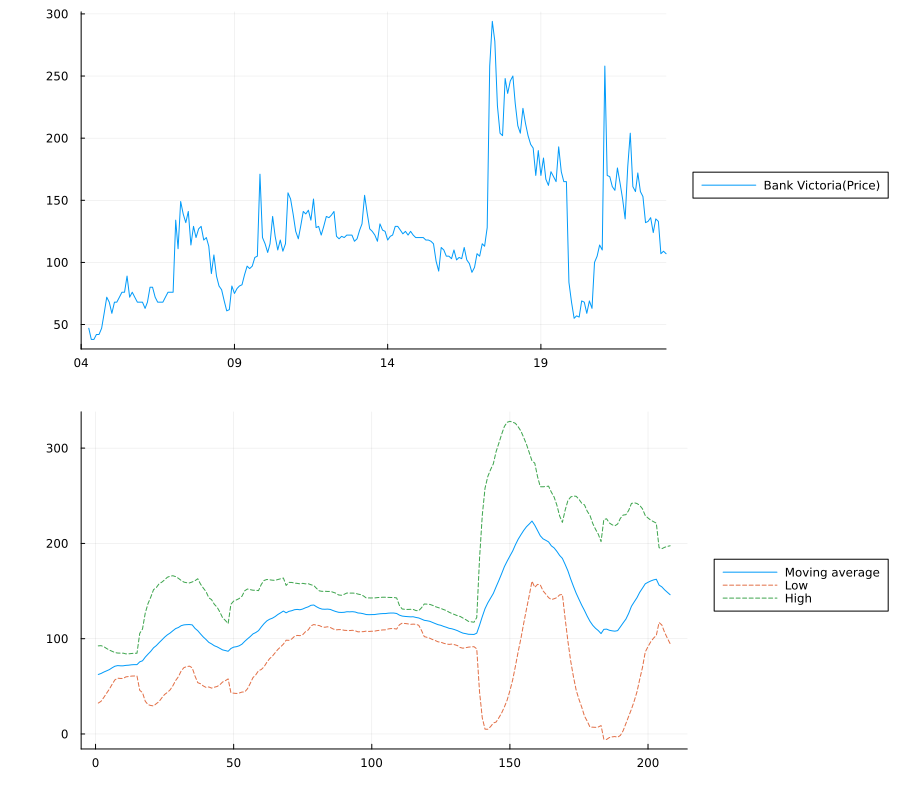

In [24]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebvic = "./csv/IDX-Stocks/BVIC Historical Data.csv"

dfbvic = CSV.read(filebvic, DataFrame)

dfbvic[!,"Change %"] .= parse.(Float64, replace.(dfbvic[!,"Change %"], "%" => ""))

dfbvic.Dates = Date.(dfbvic.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbvic.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsbvic = extrema([tick_years; dfbvic.Dates])

p1 = plot(dfbvic.Dates, dfbvic.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbvic,
    label="Bank Victoria(Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfbvic.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


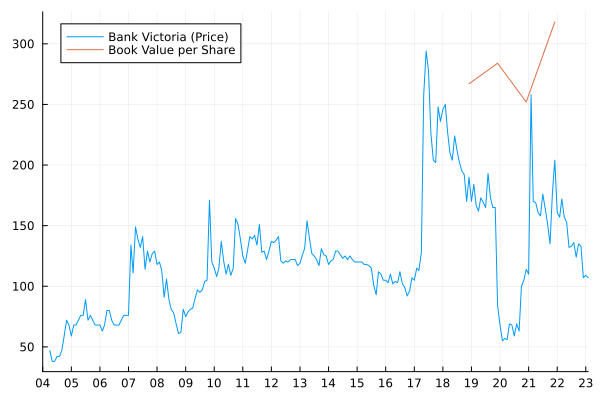

In [21]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filebvic = "./csv/IDX-Stocks/BVIC Historical Data.csv"

dfbvic = CSV.read(filebvic, DataFrame)

dfbvic[!,"Change %"] .= parse.(Float64, replace.(dfbvic[!,"Change %"], "%" => ""))

dfbvic.Dates = Date.(dfbvic.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfbvic.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsbvic = extrema([tick_years; dfbvic.Dates])

plot(dfbvic.Dates, dfbvic.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsbvic,
    label="Bank Victoria (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [267, 284, 252, 318];
plot!(x,y, label="Book Value per Share")

## Energi Mega Persada

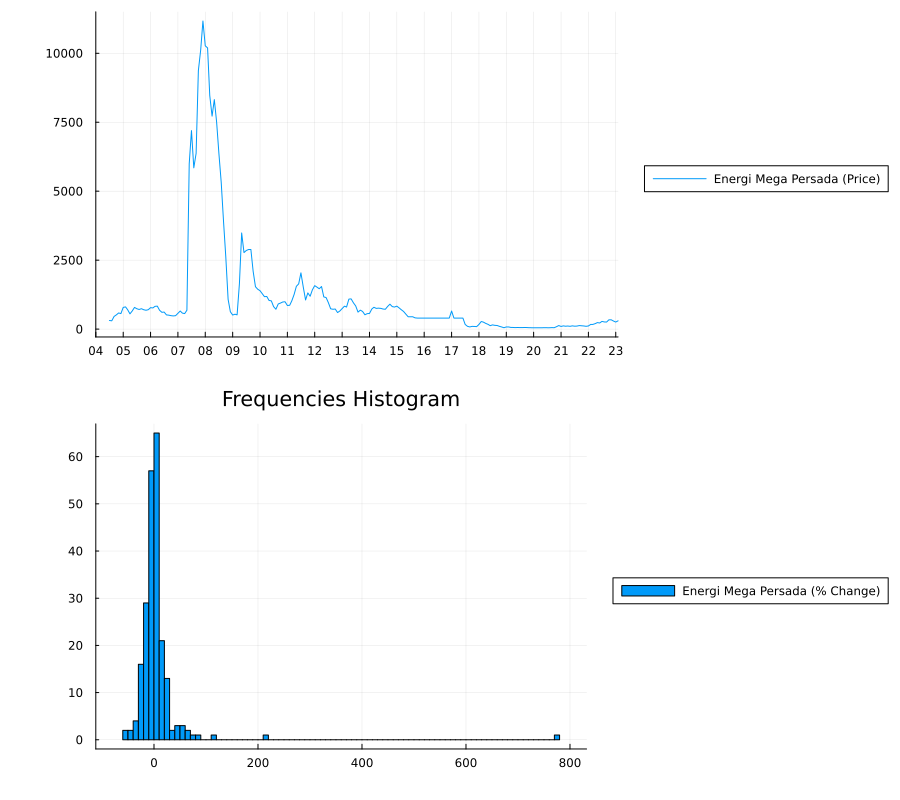

In [23]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileenrg = "./csv/IDX-Stocks/ENRG Historical Data.csv"

dfenrg = CSV.read(fileenrg, DataFrame)

dfenrg.Price .= parse.(Float64, replace.(dfenrg.Price, "," => ""))
dfenrg[!,"Change %"] .= parse.(Float64, replace.(dfenrg[!,"Change %"], "%" => ""))

dfenrg.Dates = Date.(dfenrg.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfenrg.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsenrg = extrema([tick_years; dfenrg.Dates])

p1 = plot(dfenrg.Dates, dfenrg.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsenrg,
    label="Energi Mega Persada (Price)", xlabel="", ylabel="")
p2 = histogram(dfenrg.Date, dfenrg[!,"Change %"], title="Frequencies Histogram",
    label="Energi Mega Persada (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


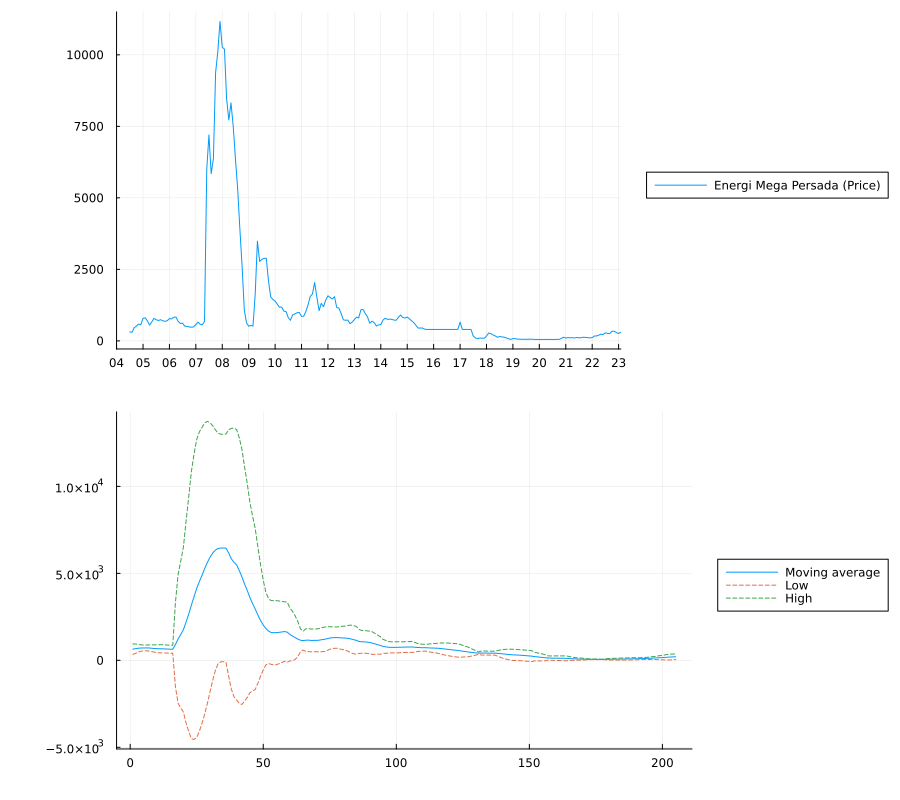

In [24]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileenrg = "./csv/IDX-Stocks/ENRG Historical Data.csv"

dfenrg = CSV.read(fileenrg, DataFrame)

dfenrg.Price .= parse.(Float64, replace.(dfenrg.Price, "," => ""))
dfenrg[!,"Change %"] .= parse.(Float64, replace.(dfenrg[!,"Change %"], "%" => ""))

dfenrg.Dates = Date.(dfenrg.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfenrg.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsenrg = extrema([tick_years; dfenrg.Dates])

p1 = plot(dfenrg.Dates, dfenrg.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsenrg,
    label="Energi Mega Persada (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfenrg.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## XL Axiata

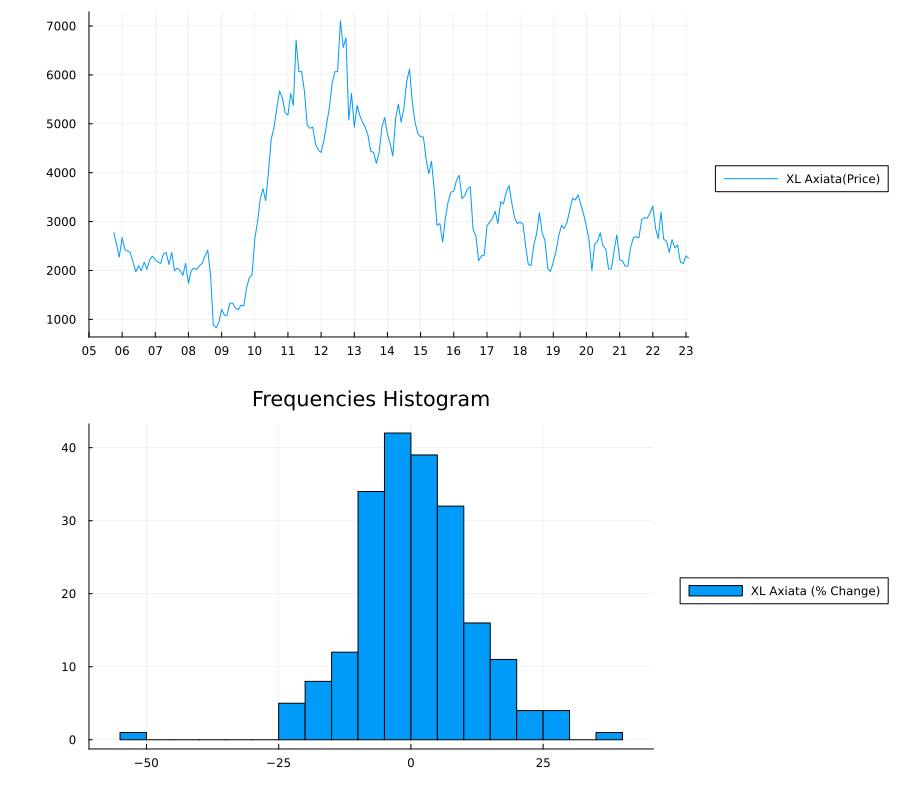

In [25]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileexcl = "./csv/IDX-Stocks/EXCL Historical Data.csv"

dfexcl = CSV.read(fileexcl, DataFrame)

dfexcl.Price .= parse.(Float64, replace.(dfexcl.Price, "," => ""))
dfexcl[!,"Change %"] .= parse.(Float64, replace.(dfexcl[!,"Change %"], "%" => ""))

dfexcl.Dates = Date.(dfexcl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfexcl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsexcl = extrema([tick_years; dfexcl.Dates])

p1 = plot(dfexcl.Dates, dfexcl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsexcl,
    label="XL Axiata(Price)", xlabel="", ylabel="")
p2 = histogram(dfexcl.Date, dfexcl[!,"Change %"], title="Frequencies Histogram",
    label="XL Axiata (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


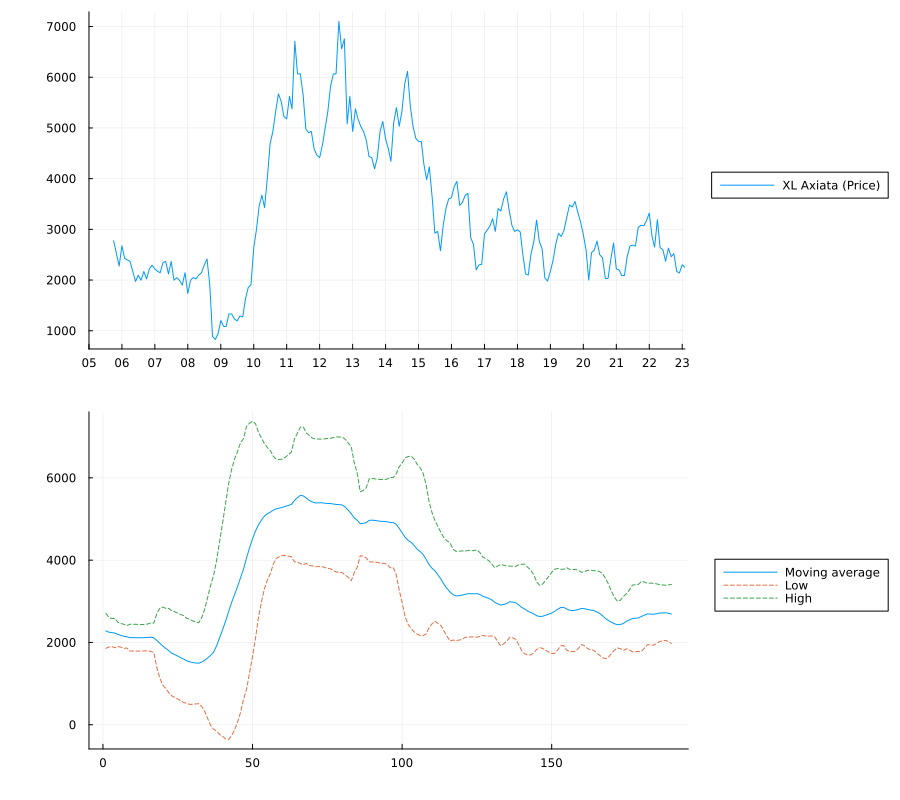

In [26]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileexcl = "./csv/IDX-Stocks/EXCL Historical Data.csv"

dfexcl = CSV.read(fileexcl, DataFrame)

dfexcl.Price .= parse.(Float64, replace.(dfexcl.Price, "," => ""))
dfexcl[!,"Change %"] .= parse.(Float64, replace.(dfexcl[!,"Change %"], "%" => ""))

dfexcl.Dates = Date.(dfexcl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfexcl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsexcl = extrema([tick_years; dfexcl.Dates])

p1 = plot(dfexcl.Dates, dfexcl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsexcl,
    label="XL Axiata (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfexcl.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Gudang Garam

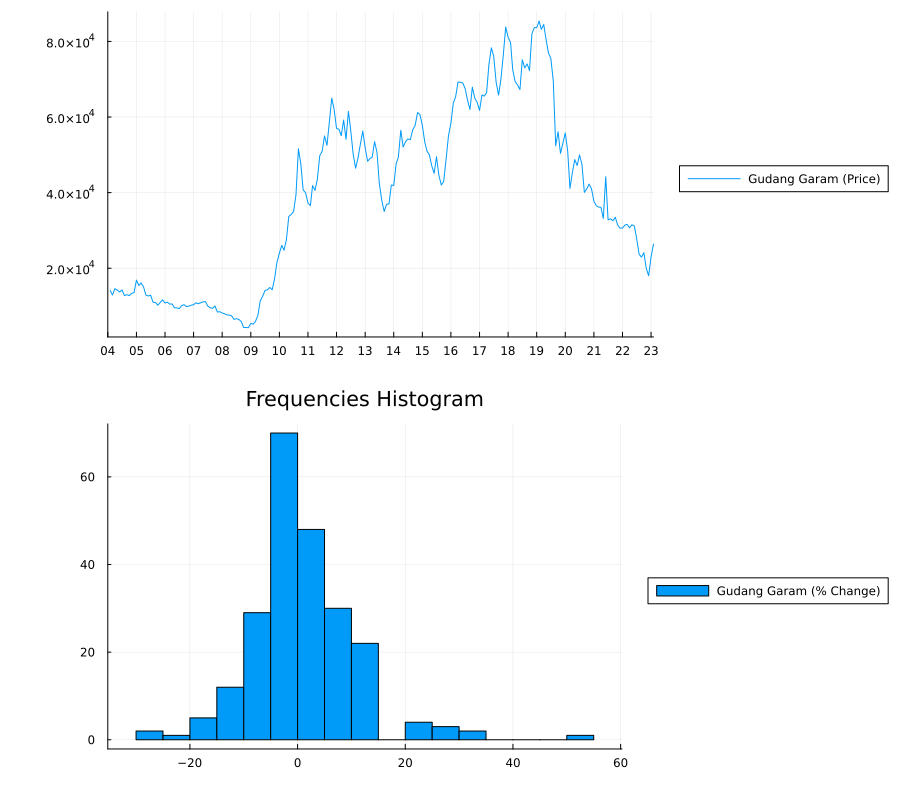

In [27]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileggrm = "./csv/IDX-Stocks/GGRM Historical Data.csv"

dfggrm = CSV.read(fileggrm, DataFrame)

dfggrm.Price .= parse.(Float64, replace.(dfggrm.Price, "," => ""))
dfggrm[!,"Change %"] .= parse.(Float64, replace.(dfggrm[!,"Change %"], "%" => ""))

dfggrm.Dates = Date.(dfggrm.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfggrm.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsggrm = extrema([tick_years; dfggrm.Dates])

p1 = plot(dfggrm.Dates, dfggrm.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsggrm,
    label="Gudang Garam (Price)", xlabel="", ylabel="")
p2 = histogram(dfggrm.Date, dfggrm[!,"Change %"], title="Frequencies Histogram",
    label="Gudang Garam (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


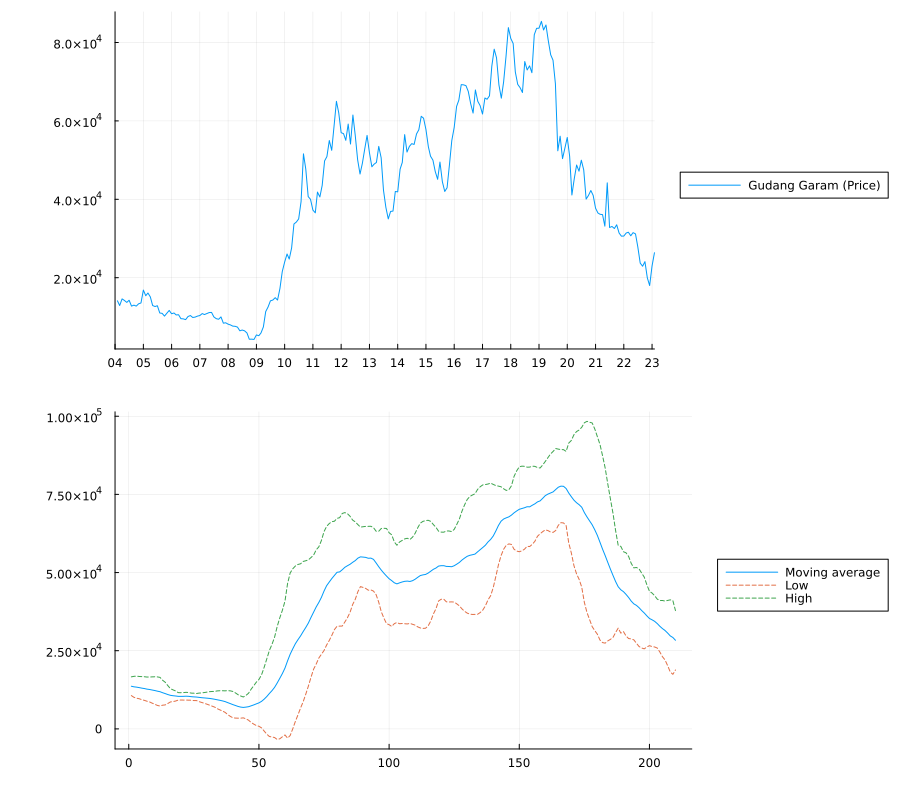

In [28]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileggrm = "./csv/IDX-Stocks/GGRM Historical Data.csv"

dfggrm = CSV.read(fileggrm, DataFrame)

dfggrm.Price .= parse.(Float64, replace.(dfggrm.Price, "," => ""))
dfggrm[!,"Change %"] .= parse.(Float64, replace.(dfggrm[!,"Change %"], "%" => ""))

dfggrm.Dates = Date.(dfggrm.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfggrm.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsggrm = extrema([tick_years; dfggrm.Dates])

p1 = plot(dfggrm.Dates, dfggrm.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsggrm,
    label="Gudang Garam (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfggrm.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


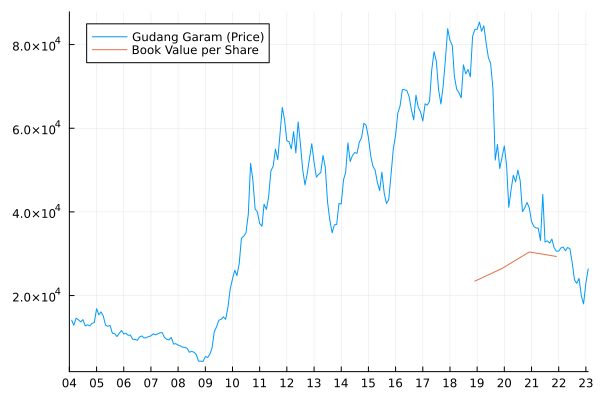

In [11]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileggrm = "./csv/IDX-Stocks/GGRM Historical Data.csv"

dfggrm = CSV.read(fileggrm, DataFrame)

dfggrm.Price .= parse.(Float64, replace.(dfggrm.Price, "," => ""))
dfggrm[!,"Change %"] .= parse.(Float64, replace.(dfggrm[!,"Change %"], "%" => ""))

dfggrm.Dates = Date.(dfggrm.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfggrm.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsggrm = extrema([tick_years; dfggrm.Dates])

plot(dfggrm.Dates, dfggrm.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsggrm,
    label="Gudang Garam (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [23458, 26471, 30417, 29342];
plot!(x,y, label="Book Value per Share")

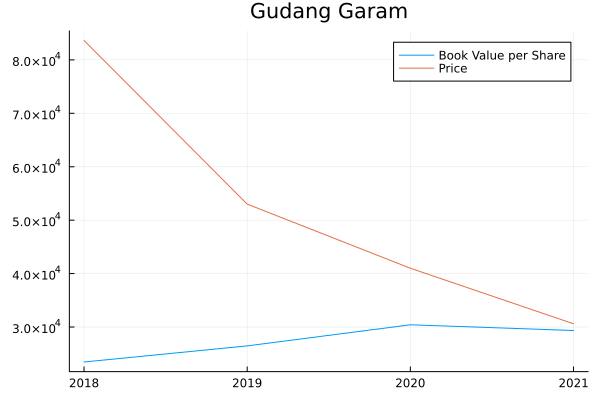

In [70]:
using Plots
gr()

# Set Book Value per Share
x = [2018, 2019, 2020, 2021];
y = [23458, 26471, 30417, 29342];
p = [83625, 53000, 41000, 30600];
plot(x,y, label="Book Value per Share")

plot!(x,p, label="Price", title="Gudang Garam")


## Garuda Indonesia

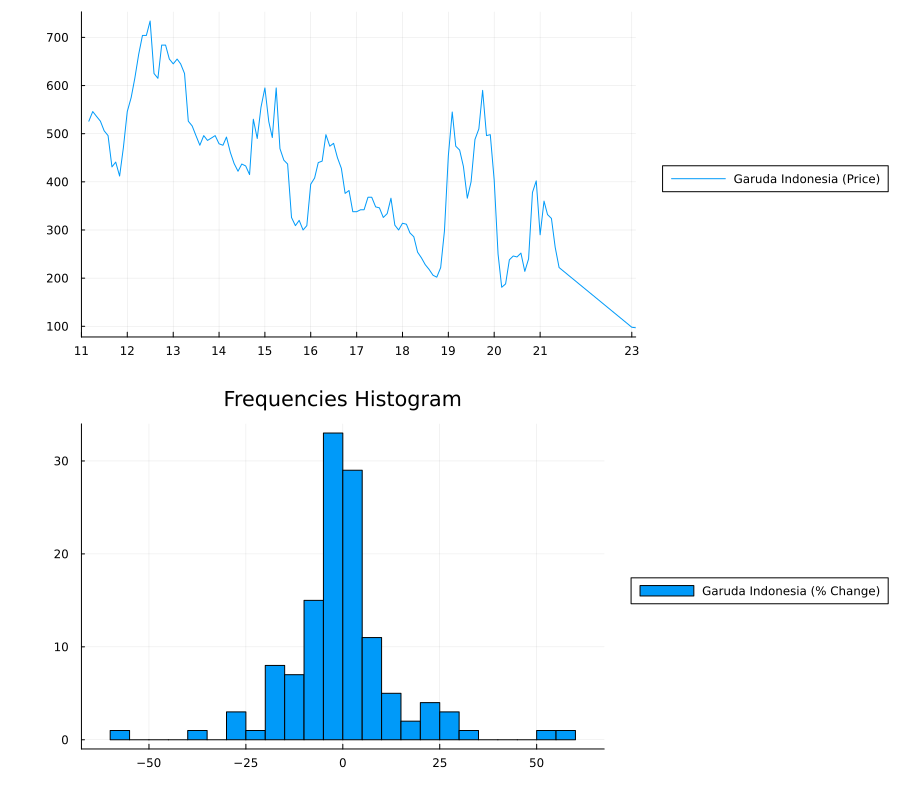

In [71]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filegiaa = "./csv/IDX-Stocks/GIAA Historical Data.csv"

dfgiaa = CSV.read(filegiaa, DataFrame)

dfgiaa[!,"Change %"] .= parse.(Float64, replace.(dfgiaa[!,"Change %"], "%" => ""))

dfgiaa.Dates = Date.(dfgiaa.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgiaa.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsgiaa = extrema([tick_years; dfgiaa.Dates])

p1 = plot(dfgiaa.Dates, dfgiaa.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsgiaa,
    label="Garuda Indonesia (Price)", xlabel="", ylabel="")
p2 = histogram(dfgiaa.Date, dfgiaa[!,"Change %"], title="Frequencies Histogram",
    label="Garuda Indonesia (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


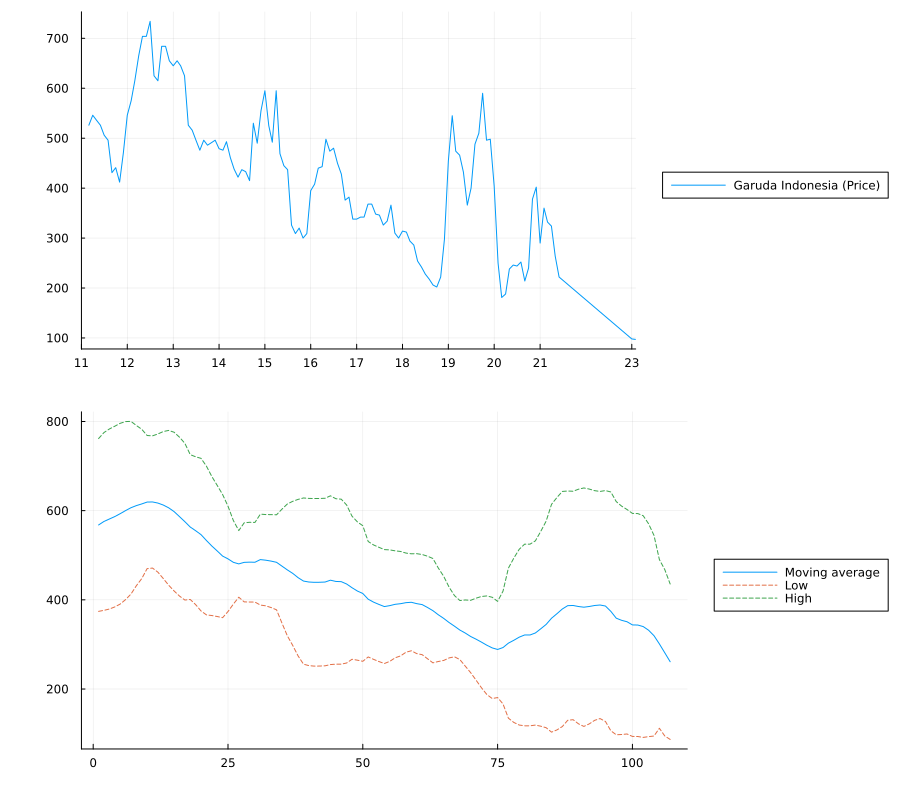

In [31]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filegiaa = "./csv/IDX-Stocks/GIAA Historical Data.csv"

dfgiaa = CSV.read(filegiaa, DataFrame)

dfgiaa[!,"Change %"] .= parse.(Float64, replace.(dfgiaa[!,"Change %"], "%" => ""))

dfgiaa.Dates = Date.(dfgiaa.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgiaa.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsgiaa = extrema([tick_years; dfgiaa.Dates])

p1 = plot(dfgiaa.Dates, dfgiaa.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsgiaa,
    label="Garuda Indonesia (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfgiaa.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Gajah Tunggal

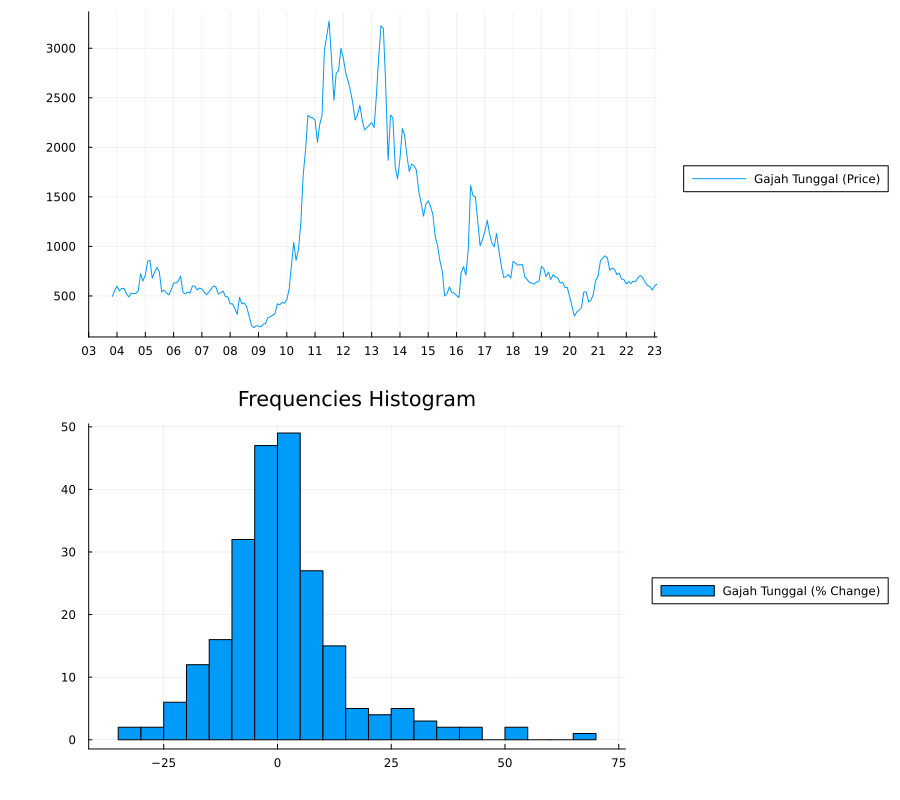

In [32]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filegjtl = "./csv/IDX-Stocks/GJTL Historical Data.csv"

dfgjtl = CSV.read(filegjtl, DataFrame)

dfgjtl.Price .= parse.(Float64, replace.(dfgjtl.Price, "," => ""))
dfgjtl[!,"Change %"] .= parse.(Float64, replace.(dfgjtl[!,"Change %"], "%" => ""))

dfgjtl.Dates = Date.(dfgjtl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgjtl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsgjtl = extrema([tick_years; dfgjtl.Dates])

p1 = plot(dfgjtl.Dates, dfgjtl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsgjtl,
    label="Gajah Tunggal (Price)", xlabel="", ylabel="")
p2 = histogram(dfgjtl.Date, dfgjtl[!,"Change %"], title="Frequencies Histogram",
    label="Gajah Tunggal (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


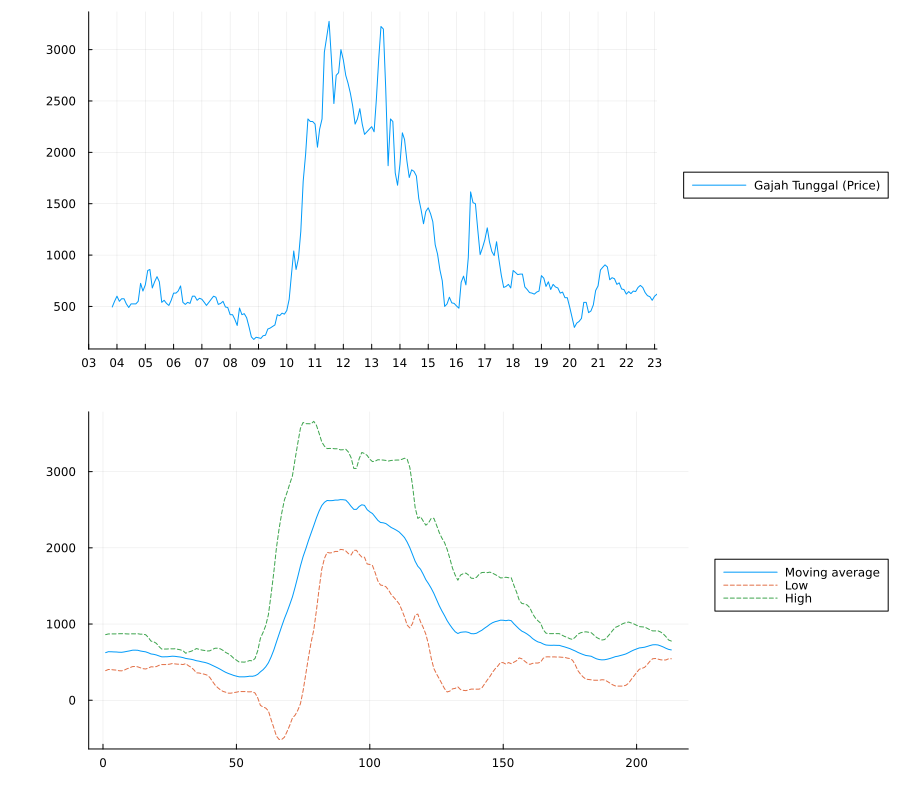

In [33]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filegjtl = "./csv/IDX-Stocks/GJTL Historical Data.csv"

dfgjtl = CSV.read(filegjtl, DataFrame)

dfgjtl.Price .= parse.(Float64, replace.(dfgjtl.Price, "," => ""))
dfgjtl[!,"Change %"] .= parse.(Float64, replace.(dfgjtl[!,"Change %"], "%" => ""))

dfgjtl.Dates = Date.(dfgjtl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgjtl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsgjtl = extrema([tick_years; dfgjtl.Dates])

p1 = plot(dfgjtl.Dates, dfgjtl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsgjtl,
    label="Gajah Tunggal (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfgjtl.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


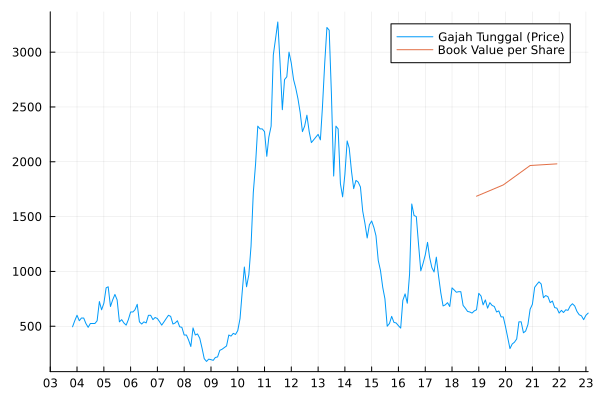

In [12]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filegjtl = "./csv/IDX-Stocks/GJTL Historical Data.csv"

dfgjtl = CSV.read(filegjtl, DataFrame)

dfgjtl.Price .= parse.(Float64, replace.(dfgjtl.Price, "," => ""))
dfgjtl[!,"Change %"] .= parse.(Float64, replace.(dfgjtl[!,"Change %"], "%" => ""))

dfgjtl.Dates = Date.(dfgjtl.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgjtl.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsgjtl = extrema([tick_years; dfgjtl.Dates])

plot(dfgjtl.Dates, dfgjtl.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsgjtl,
    label="Gajah Tunggal (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [1686, 1789, 1966, 1981];
plot!(x,y, label="Book Value per Share")

## Indonesia Air

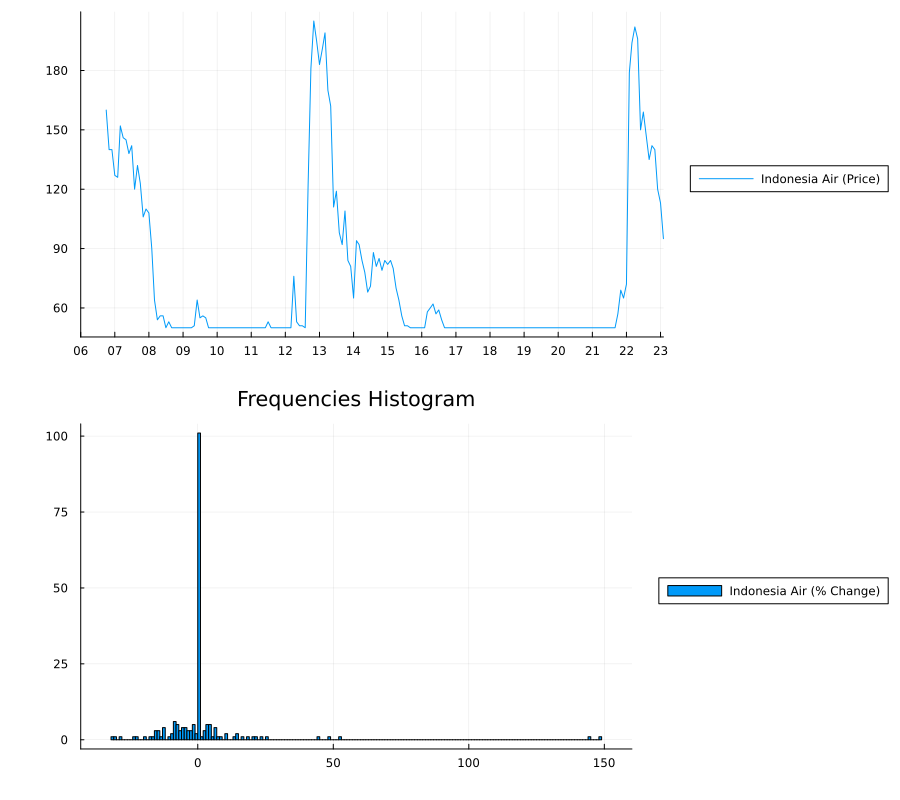

In [34]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileiata = "./csv/IDX-Stocks/IATA Historical Data.csv"

dfiata = CSV.read(fileiata, DataFrame)

dfiata[!,"Change %"] .= parse.(Float64, replace.(dfiata[!,"Change %"], "%" => ""))

dfiata.Dates = Date.(dfiata.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfiata.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsiata = extrema([tick_years; dfiata.Dates])

p1 = plot(dfiata.Dates, dfiata.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsiata,
    label="Indonesia Air (Price)", xlabel="", ylabel="")
p2 = histogram(dfiata.Date, dfiata[!,"Change %"], title="Frequencies Histogram",
    label="Indonesia Air (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


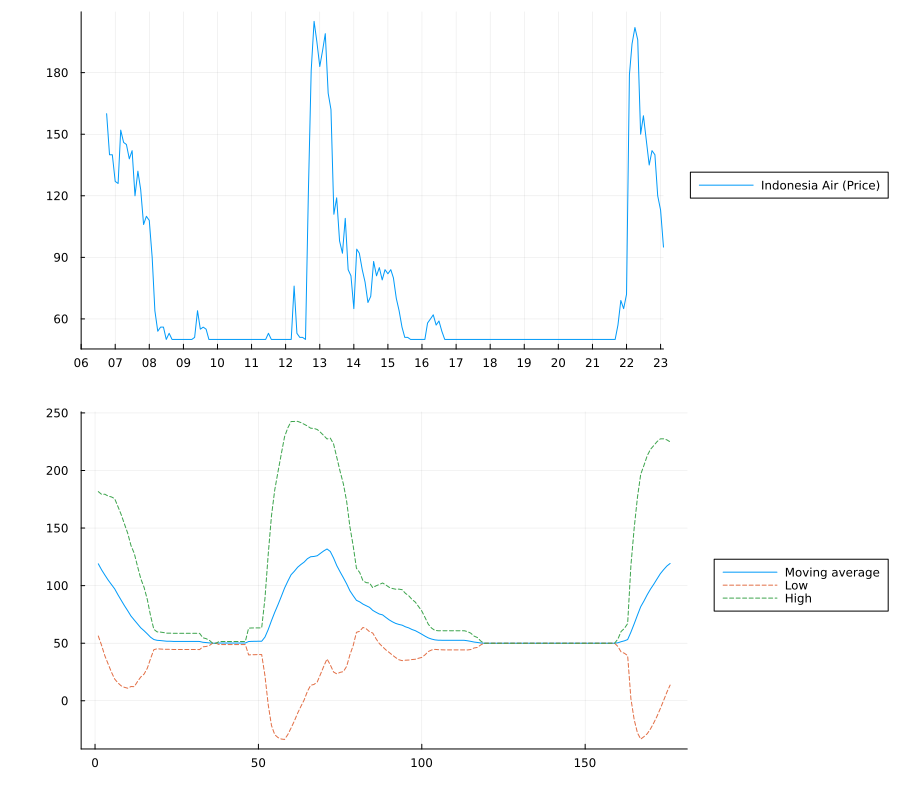

In [35]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileiata = "./csv/IDX-Stocks/IATA Historical Data.csv"

dfiata = CSV.read(fileiata, DataFrame)

dfiata[!,"Change %"] .= parse.(Float64, replace.(dfiata[!,"Change %"], "%" => ""))

dfiata.Dates = Date.(dfiata.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfiata.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsiata = extrema([tick_years; dfiata.Dates])

p1 = plot(dfiata.Dates, dfiata.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsiata,
    label="Indonesia Air (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfiata.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Indika Energy

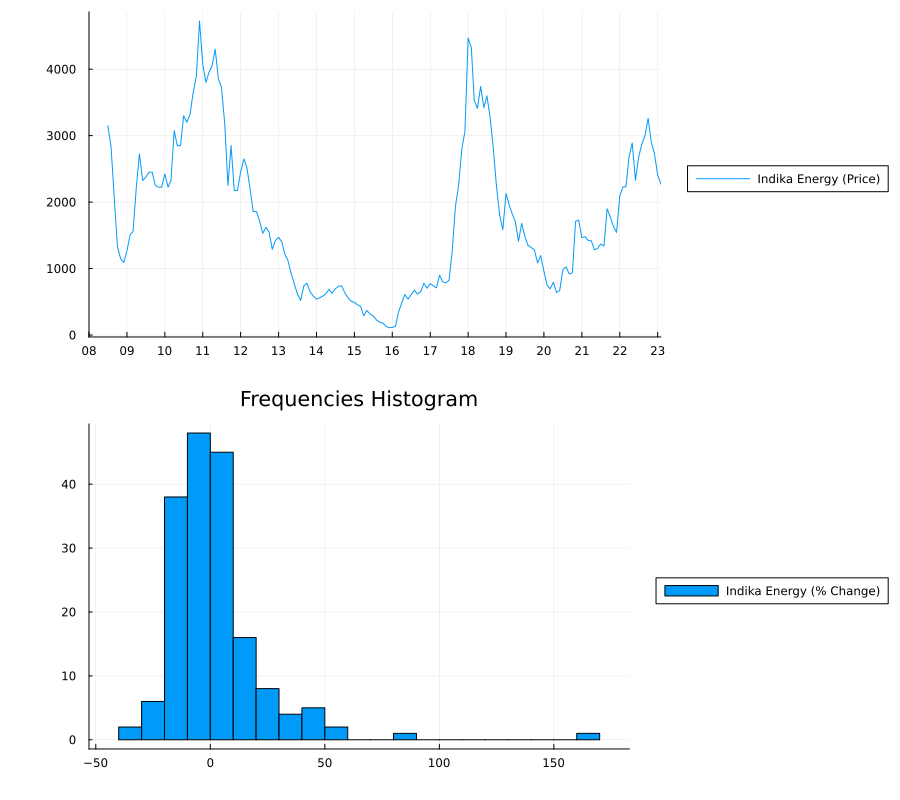

In [36]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileindy = "./csv/IDX-Stocks/INDY Historical Data.csv"

dfindy = CSV.read(fileindy, DataFrame)

dfindy.Price .= parse.(Float64, replace.(dfindy.Price, "," => ""))
dfindy[!,"Change %"] .= parse.(Float64, replace.(dfindy[!,"Change %"], "%" => ""))

dfindy.Dates = Date.(dfindy.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfindy.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsindy = extrema([tick_years; dfindy.Dates])

p1 = plot(dfindy.Dates, dfindy.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsindy,
    label="Indika Energy (Price)", xlabel="", ylabel="")
p2 = histogram(dfindy.Date, dfindy[!,"Change %"], title="Frequencies Histogram",
    label="Indika Energy (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


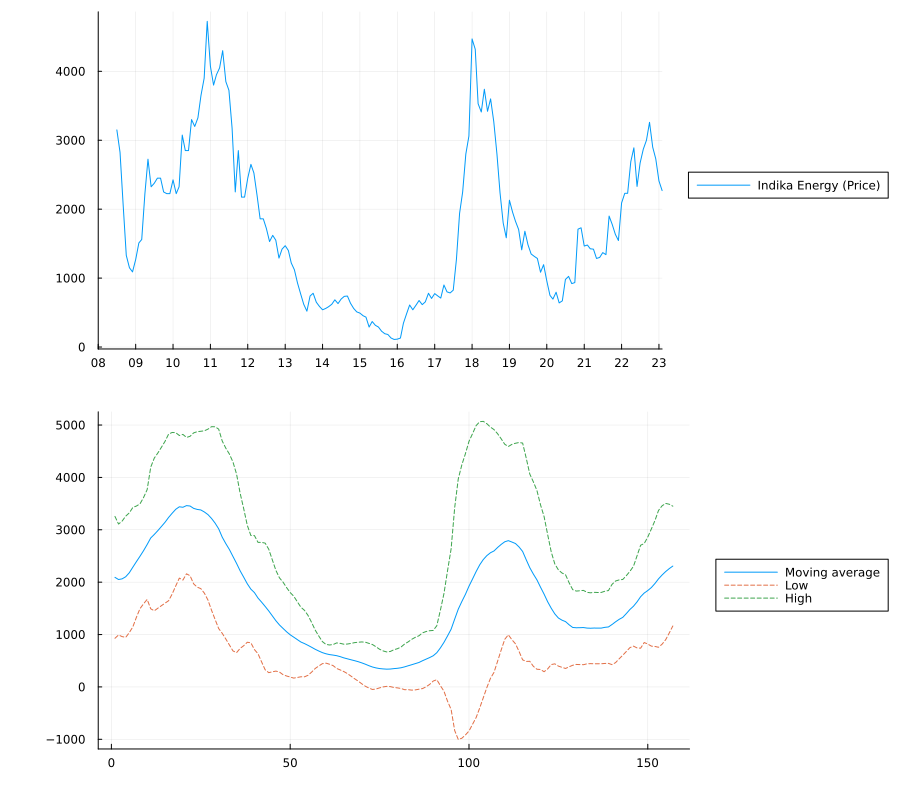

In [37]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileindy = "./csv/IDX-Stocks/INDY Historical Data.csv"

dfindy = CSV.read(fileindy, DataFrame)

dfindy.Price .= parse.(Float64, replace.(dfindy.Price, "," => ""))
dfindy[!,"Change %"] .= parse.(Float64, replace.(dfindy[!,"Change %"], "%" => ""))

dfindy.Dates = Date.(dfindy.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfindy.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsindy = extrema([tick_years; dfindy.Dates])

p1 = plot(dfindy.Dates, dfindy.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsindy,
    label="Indika Energy (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfindy.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Indah Kiat Pulp & Paper

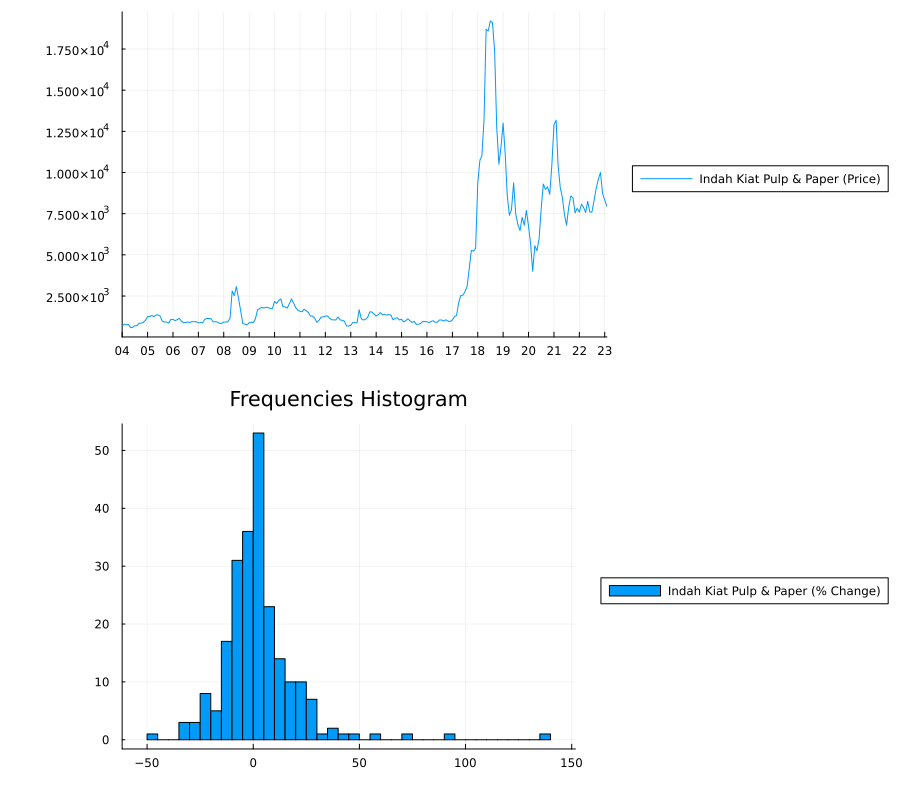

In [38]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileinkp = "./csv/IDX-Stocks/INKP Historical Data.csv"

dfinkp = CSV.read(fileinkp, DataFrame)

dfinkp.Price .= parse.(Float64, replace.(dfinkp.Price, "," => ""))
dfinkp[!,"Change %"] .= parse.(Float64, replace.(dfinkp[!,"Change %"], "%" => ""))

dfinkp.Dates = Date.(dfinkp.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfinkp.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsinkp = extrema([tick_years; dfinkp.Dates])

p1 = plot(dfinkp.Dates, dfinkp.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsinkp,
    label="Indah Kiat Pulp & Paper (Price)", xlabel="", ylabel="")
p2 = histogram(dfinkp.Date, dfinkp[!,"Change %"], title="Frequencies Histogram",
    label="Indah Kiat Pulp & Paper (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


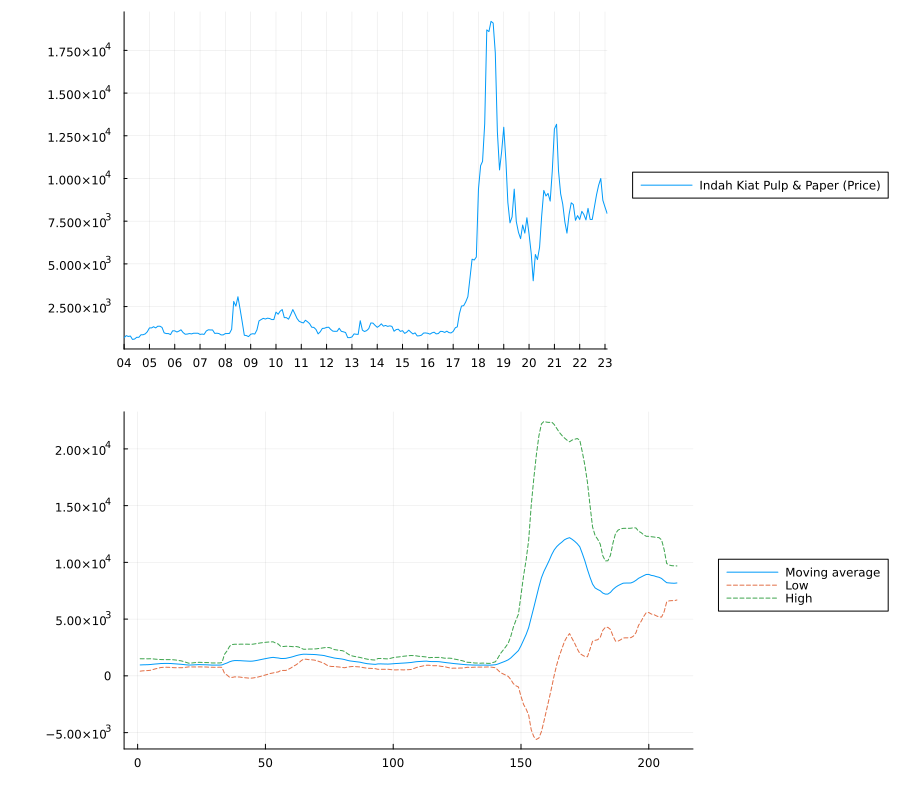

In [39]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

fileinkp = "./csv/IDX-Stocks/INKP Historical Data.csv"

dfinkp = CSV.read(fileinkp, DataFrame)

dfinkp.Price .= parse.(Float64, replace.(dfinkp.Price, "," => ""))
dfinkp[!,"Change %"] .= parse.(Float64, replace.(dfinkp[!,"Change %"], "%" => ""))

dfinkp.Dates = Date.(dfinkp.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfinkp.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsinkp = extrema([tick_years; dfinkp.Dates])

p1 = plot(dfinkp.Dates, dfinkp.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsinkp,
    label="Indah Kiat Pulp & Paper (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfinkp.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Sky Energy

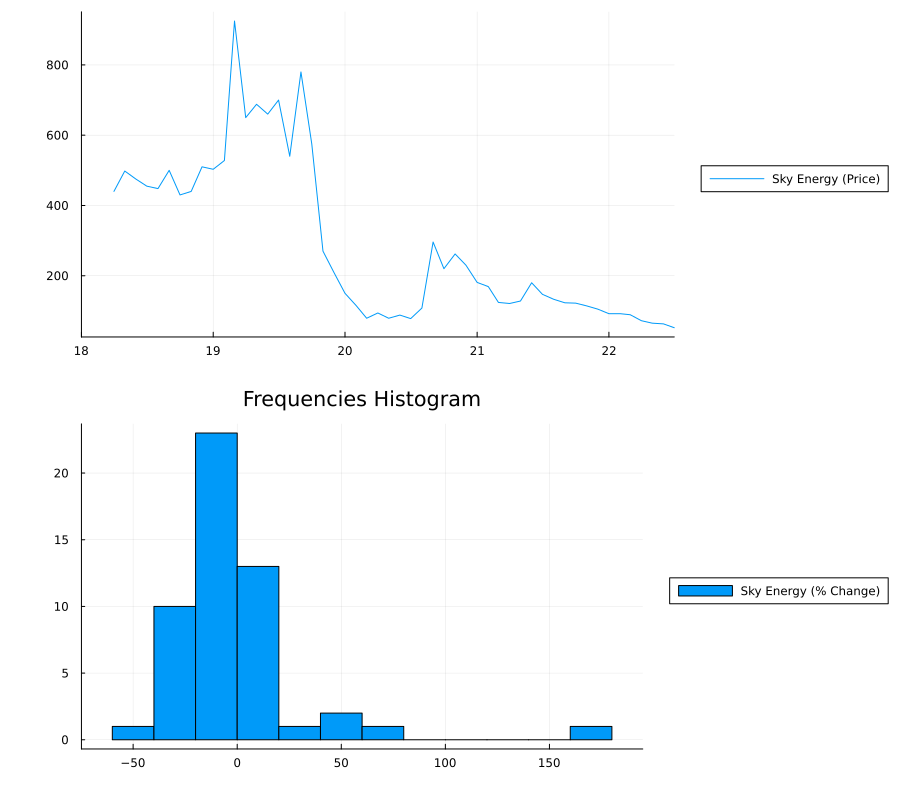

In [40]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filejsky = "./csv/IDX-Stocks/JSKY Historical Data.csv"

dfjsky = CSV.read(filejsky, DataFrame)

dfjsky[!,"Change %"] .= parse.(Float64, replace.(dfjsky[!,"Change %"], "%" => ""))

dfjsky.Dates = Date.(dfjsky.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfjsky.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsjsky = extrema([tick_years; dfjsky.Dates])

p1 = plot(dfjsky.Dates, dfjsky.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsjsky,
    label="Sky Energy (Price)", xlabel="", ylabel="")
p2 = histogram(dfjsky.Date, dfjsky[!,"Change %"], title="Frequencies Histogram",
    label="Sky Energy (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


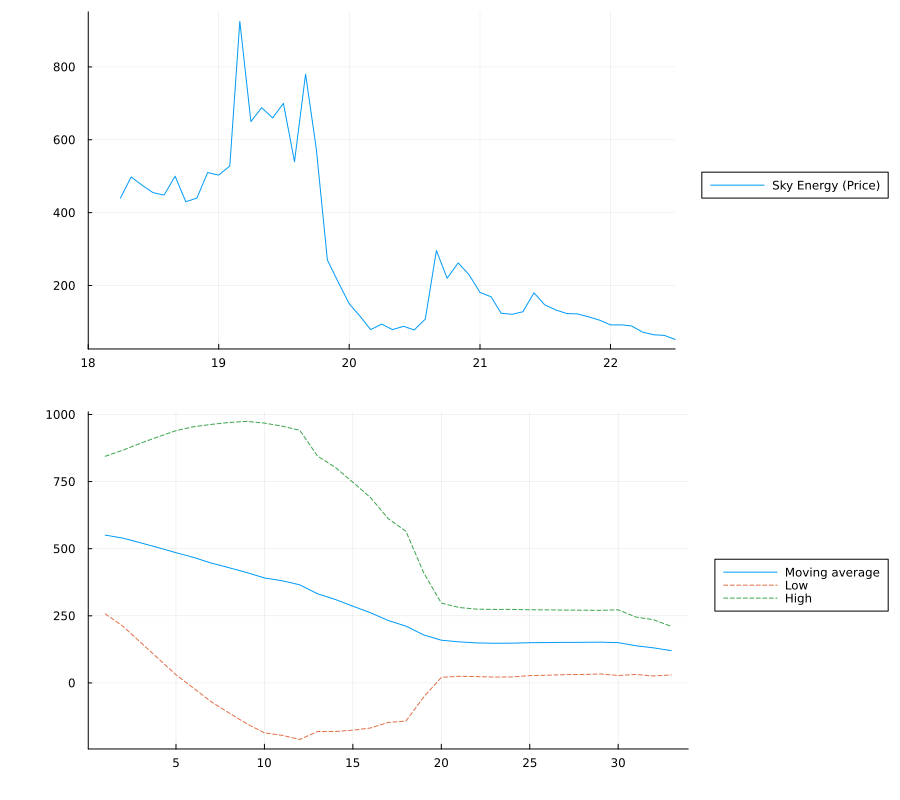

In [41]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filejsky = "./csv/IDX-Stocks/JSKY Historical Data.csv"

dfjsky = CSV.read(filejsky, DataFrame)

dfjsky[!,"Change %"] .= parse.(Float64, replace.(dfjsky[!,"Change %"], "%" => ""))

dfjsky.Dates = Date.(dfjsky.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfjsky.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsjsky = extrema([tick_years; dfjsky.Dates])

p1 = plot(dfjsky.Dates, dfjsky.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsjsky,
    label="Sky Energy (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfjsky.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Jasa Marga

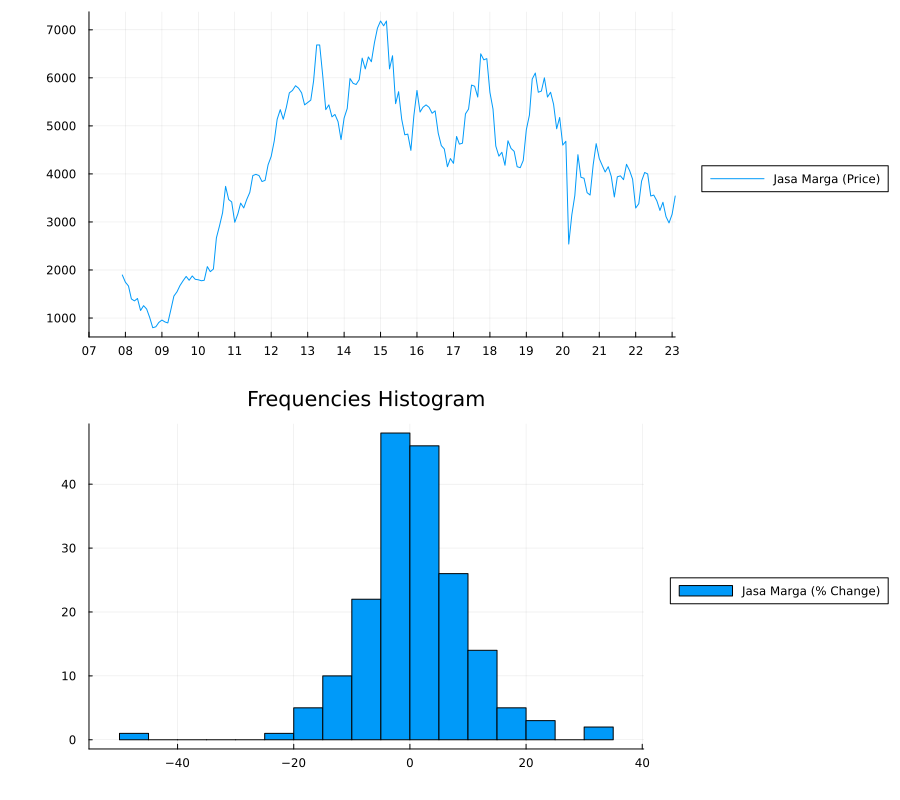

In [42]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filejsmr = "./csv/IDX-Stocks/JSMR Historical Data.csv"

dfjsmr = CSV.read(filejsmr, DataFrame)

dfjsmr.Price .= parse.(Float64, replace.(dfjsmr.Price, "," => ""))
dfjsmr[!,"Change %"] .= parse.(Float64, replace.(dfjsmr[!,"Change %"], "%" => ""))

dfjsmr.Dates = Date.(dfjsmr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfjsmr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsjsmr = extrema([tick_years; dfjsmr.Dates])

p1 = plot(dfjsmr.Dates, dfjsmr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsjsmr,
    label="Jasa Marga (Price)", xlabel="", ylabel="")
p2 = histogram(dfjsmr.Date, dfjsmr[!,"Change %"], title="Frequencies Histogram",
    label="Jasa Marga (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


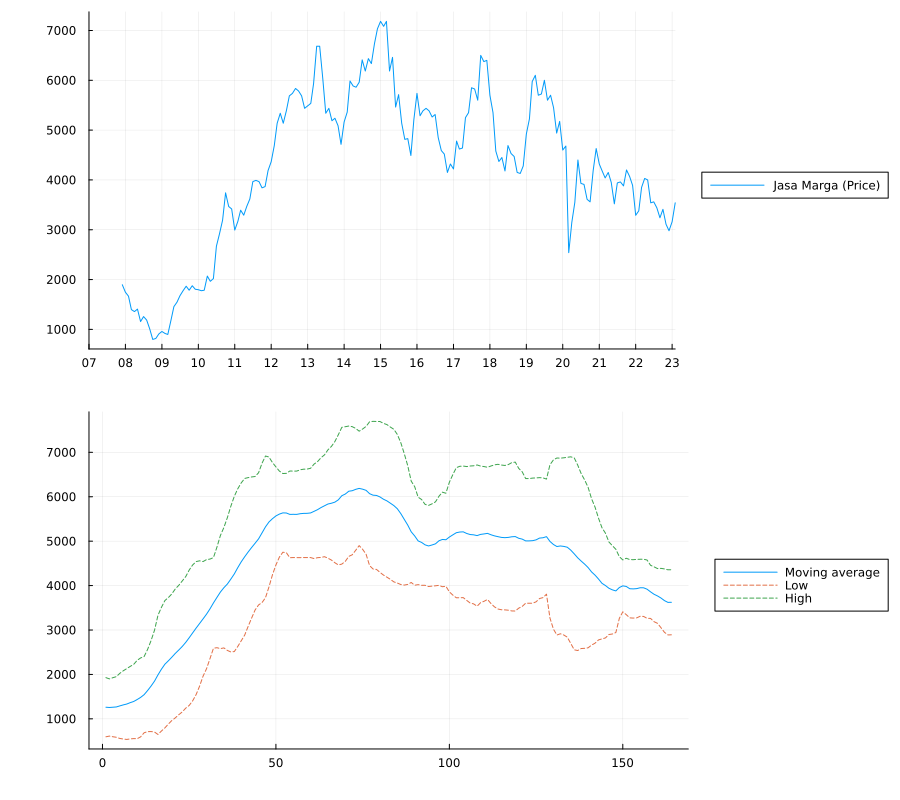

In [43]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filejsmr = "./csv/IDX-Stocks/JSMR Historical Data.csv"

dfjsmr = CSV.read(filejsmr, DataFrame)

dfjsmr.Price .= parse.(Float64, replace.(dfjsmr.Price, "," => ""))
dfjsmr[!,"Change %"] .= parse.(Float64, replace.(dfjsmr[!,"Change %"], "%" => ""))

dfjsmr.Dates = Date.(dfjsmr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfjsmr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsjsmr = extrema([tick_years; dfjsmr.Dates])

p1 = plot(dfjsmr.Dates, dfjsmr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsjsmr,
    label="Jasa Marga (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfjsmr.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


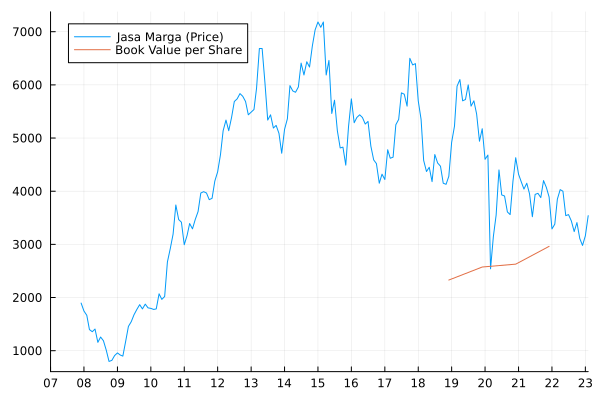

In [13]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filejsmr = "./csv/IDX-Stocks/JSMR Historical Data.csv"

dfjsmr = CSV.read(filejsmr, DataFrame)

dfjsmr.Price .= parse.(Float64, replace.(dfjsmr.Price, "," => ""))
dfjsmr[!,"Change %"] .= parse.(Float64, replace.(dfjsmr[!,"Change %"], "%" => ""))

dfjsmr.Dates = Date.(dfjsmr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfjsmr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsjsmr = extrema([tick_years; dfjsmr.Dates])

plot(dfjsmr.Dates, dfjsmr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsjsmr,
    label="Jasa Marga (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [2329, 2574, 2628, 2963];
plot!(x,y, label="Book Value per Share")

## Kimia Farma

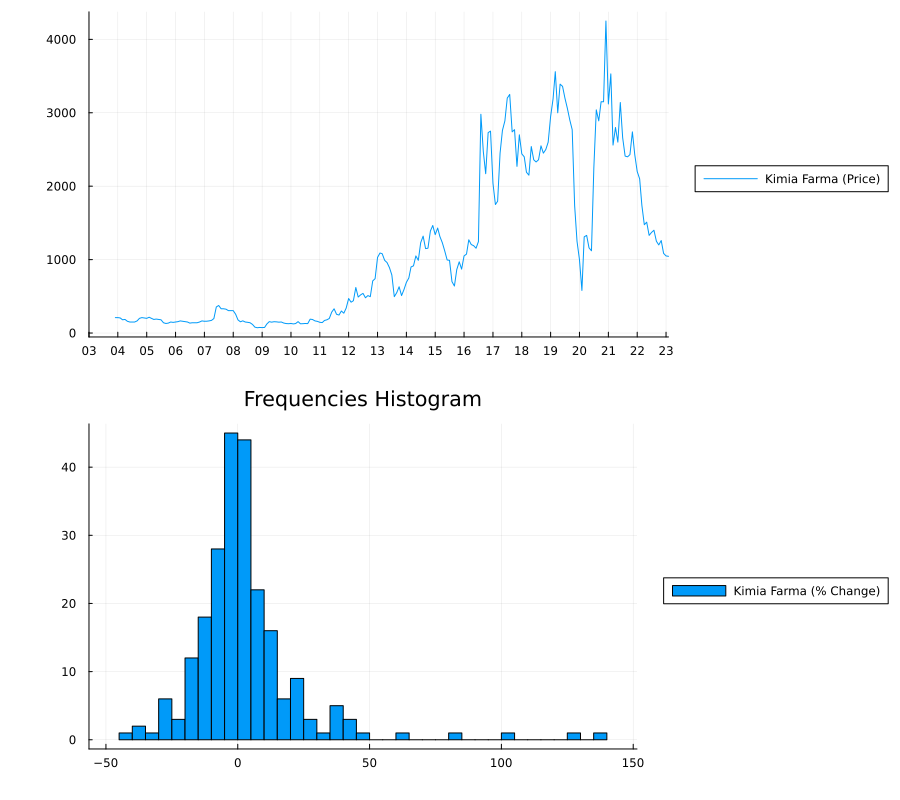

In [44]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filekaef = "./csv/IDX-Stocks/KAEF Historical Data.csv"

dfkaef = CSV.read(filekaef, DataFrame)

dfkaef.Price .= parse.(Float64, replace.(dfkaef.Price, "," => ""))
dfkaef[!,"Change %"] .= parse.(Float64, replace.(dfkaef[!,"Change %"], "%" => ""))

dfkaef.Dates = Date.(dfkaef.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfkaef.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimskaef = extrema([tick_years; dfkaef.Dates])

p1 = plot(dfkaef.Dates, dfkaef.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimskaef,
    label="Kimia Farma (Price)", xlabel="", ylabel="")
p2 = histogram(dfkaef.Date, dfkaef[!,"Change %"], title="Frequencies Histogram",
    label="Kimia Farma (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


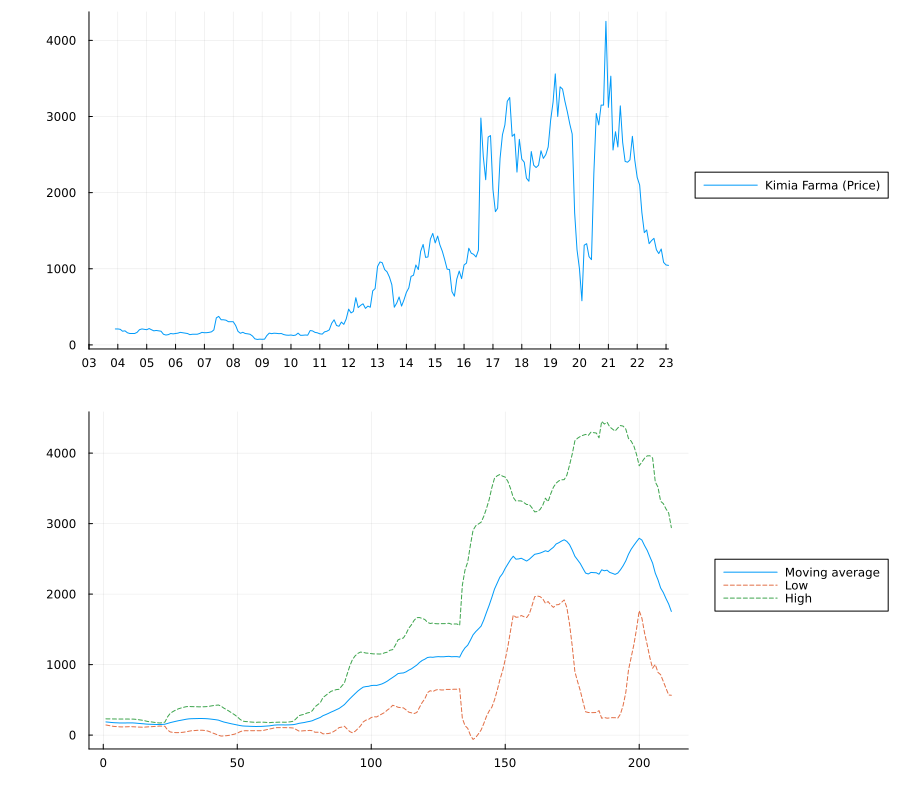

In [45]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filekaef = "./csv/IDX-Stocks/KAEF Historical Data.csv"

dfkaef = CSV.read(filekaef, DataFrame)

dfkaef.Price .= parse.(Float64, replace.(dfkaef.Price, "," => ""))
dfkaef[!,"Change %"] .= parse.(Float64, replace.(dfkaef[!,"Change %"], "%" => ""))

dfkaef.Dates = Date.(dfkaef.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfkaef.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimskaef = extrema([tick_years; dfkaef.Dates])

p1 = plot(dfkaef.Dates, dfkaef.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimskaef,
    label="Kimia Farma (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfkaef.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Lippo Karawaci

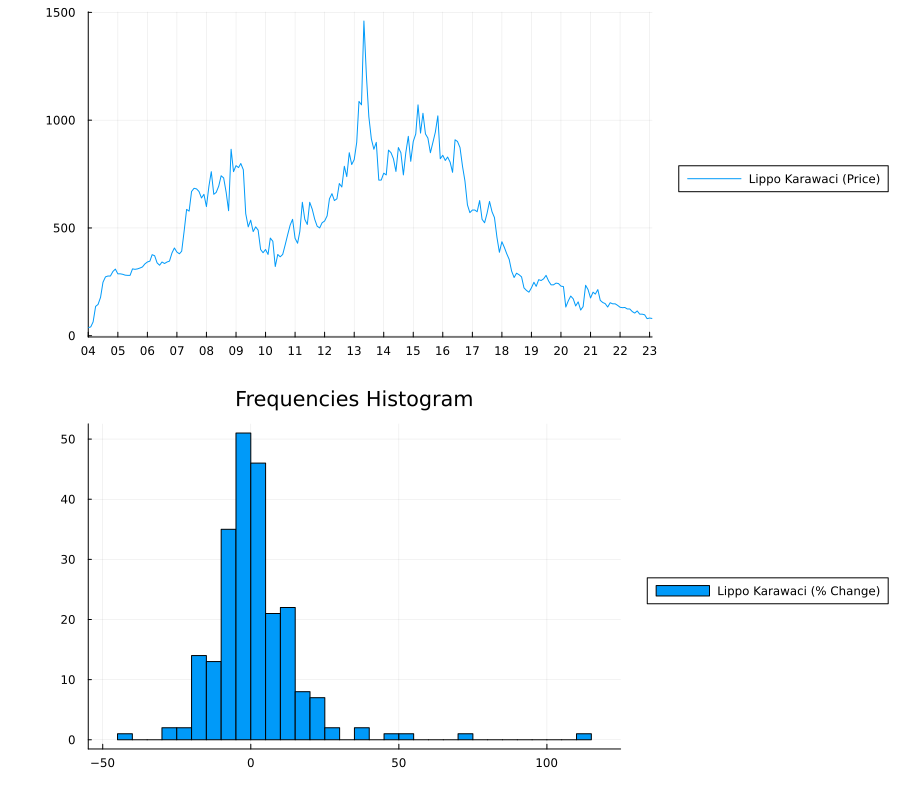

In [46]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filelpkr = "./csv/IDX-Stocks/LPKR Historical Data.csv"

dflpkr = CSV.read(filelpkr, DataFrame)

dflpkr.Price .= parse.(Float64, replace.(dflpkr.Price, "," => ""))
dflpkr[!,"Change %"] .= parse.(Float64, replace.(dflpkr[!,"Change %"], "%" => ""))

dflpkr.Dates = Date.(dflpkr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dflpkr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimslpkr = extrema([tick_years; dflpkr.Dates])

p1 = plot(dflpkr.Dates, dflpkr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimslpkr,
    label="Lippo Karawaci (Price)", xlabel="", ylabel="")
p2 = histogram(dflpkr.Date, dflpkr[!,"Change %"], title="Frequencies Histogram",
    label="Lippo Karawaci (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


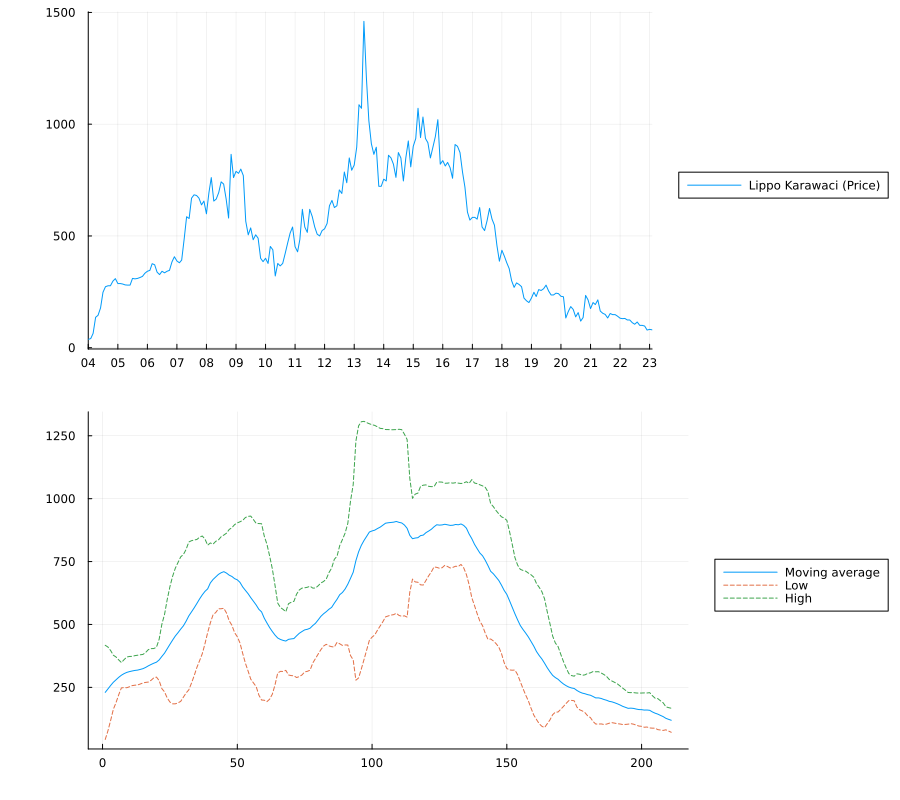

In [47]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filelpkr = "./csv/IDX-Stocks/LPKR Historical Data.csv"

dflpkr = CSV.read(filelpkr, DataFrame)

dflpkr.Price .= parse.(Float64, replace.(dflpkr.Price, "," => ""))
dflpkr[!,"Change %"] .= parse.(Float64, replace.(dflpkr[!,"Change %"], "%" => ""))

dflpkr.Dates = Date.(dflpkr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dflpkr.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimslpkr = extrema([tick_years; dflpkr.Dates])

p1 = plot(dflpkr.Dates, dflpkr.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimslpkr,
    label="Lippo Karawaci (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dflpkr.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Bank Mega

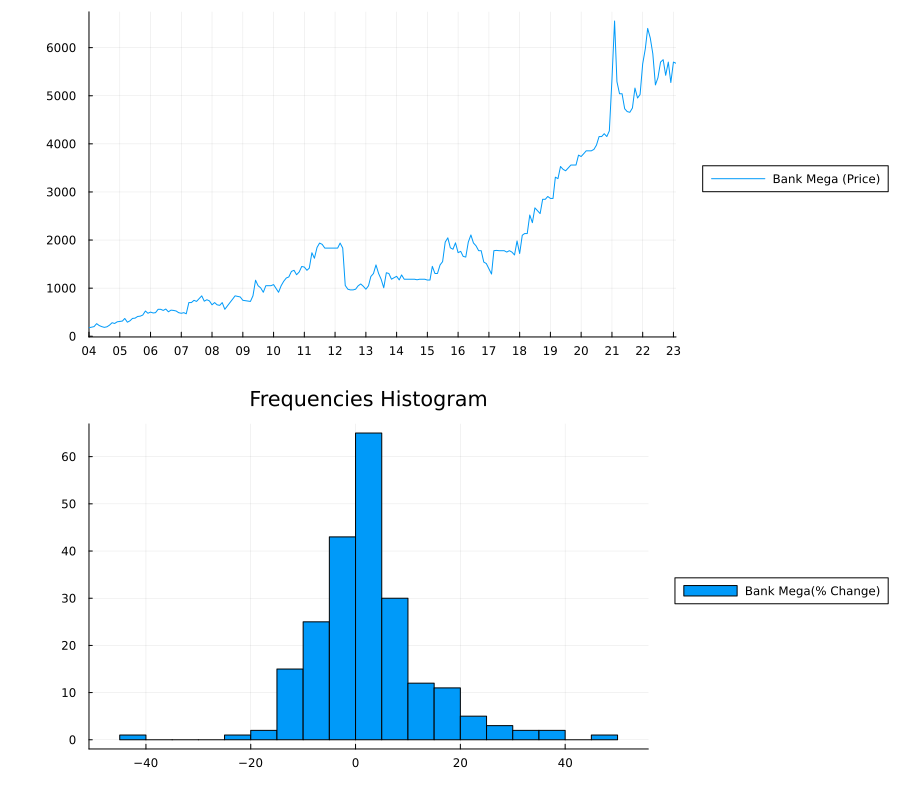

In [48]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filemega = "./csv/IDX-Stocks/MEGA Historical Data.csv"

dfmega = CSV.read(filemega, DataFrame)

dfmega.Price .= parse.(Float64, replace.(dfmega.Price, "," => ""))
dfmega[!,"Change %"] .= parse.(Float64, replace.(dfmega[!,"Change %"], "%" => ""))

dfmega.Dates = Date.(dfmega.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfmega.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsmega = extrema([tick_years; dfmega.Dates])

p1 = plot(dfmega.Dates, dfmega.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsmega,
    label="Bank Mega (Price)", xlabel="", ylabel="")
p2 = histogram(dfmega.Date, dfmega[!,"Change %"], title="Frequencies Histogram",
    label="Bank Mega(% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


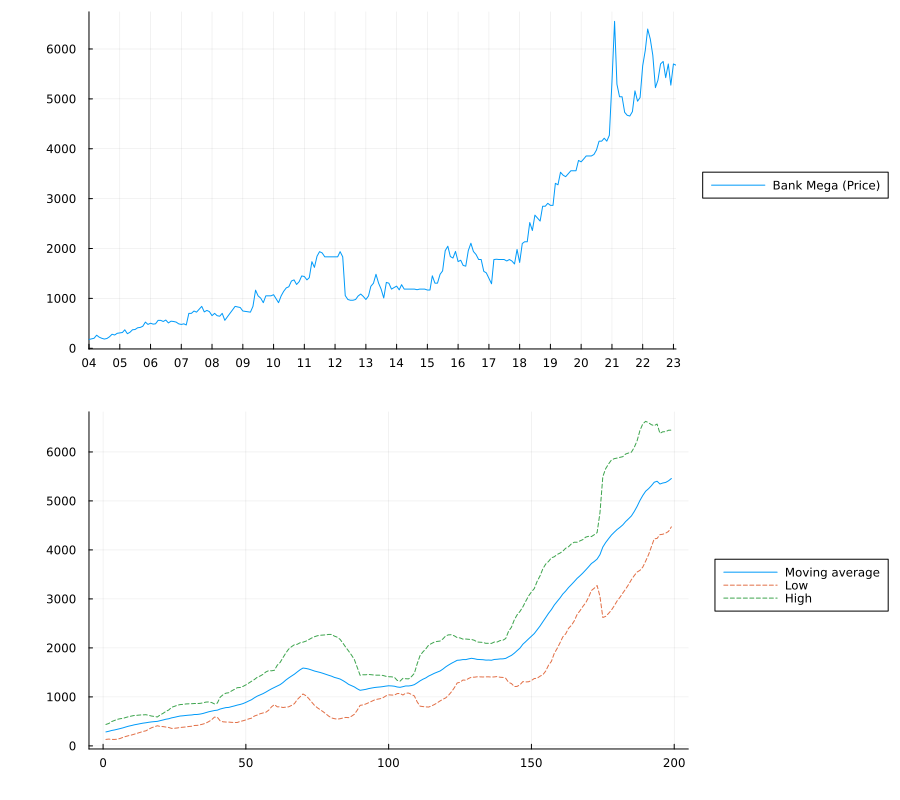

In [49]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filemega = "./csv/IDX-Stocks/MEGA Historical Data.csv"

dfmega = CSV.read(filemega, DataFrame)

dfmega.Price .= parse.(Float64, replace.(dfmega.Price, "," => ""))
dfmega[!,"Change %"] .= parse.(Float64, replace.(dfmega[!,"Change %"], "%" => ""))

dfmega.Dates = Date.(dfmega.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfmega.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimsmega = extrema([tick_years; dfmega.Dates])

p1 = plot(dfmega.Dates, dfmega.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimsmega,
    label="Bank Mega (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfmega.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


## Industri Jamu dan Farmasi Sidomuncul

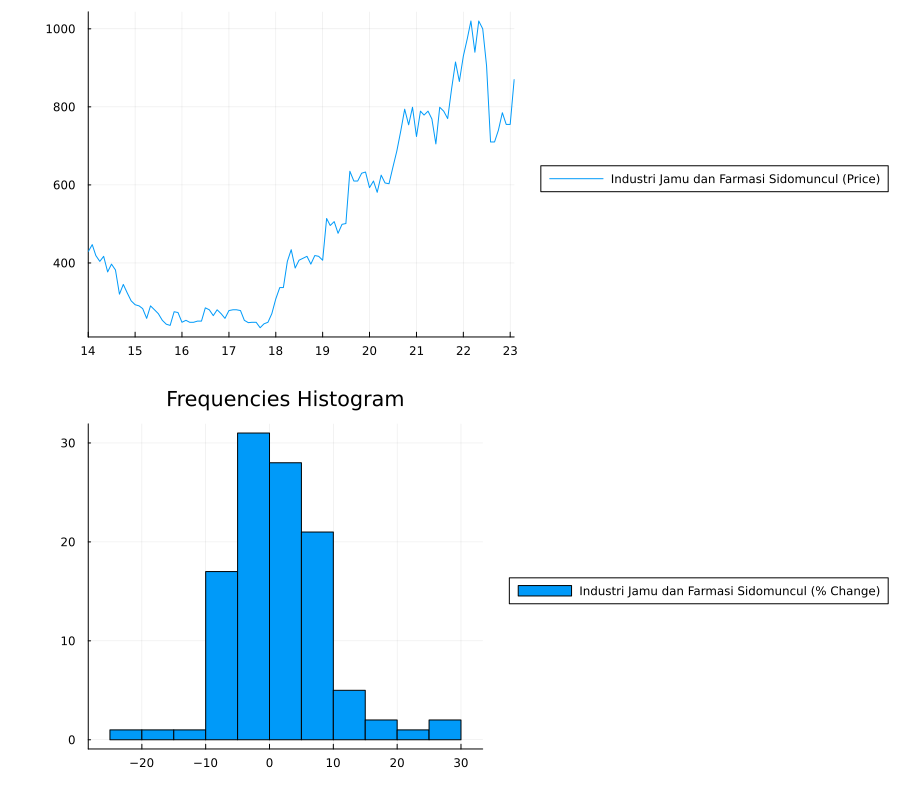

In [50]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filesido = "./csv/IDX-Stocks/SIDO Historical Data.csv"

dfsido = CSV.read(filesido, DataFrame)

dfsido.Price .= parse.(Float64, replace.(dfsido.Price, "," => ""))
dfsido[!,"Change %"] .= parse.(Float64, replace.(dfsido[!,"Change %"], "%" => ""))

dfsido.Dates = Date.(dfsido.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfsido.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimssido = extrema([tick_years; dfsido.Dates])

p1 = plot(dfsido.Dates, dfsido.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimssido,
    label="Industri Jamu dan Farmasi Sidomuncul (Price)", xlabel="", ylabel="")
p2 = histogram(dfsido.Date, dfsido[!,"Change %"], title="Frequencies Histogram",
    label="Industri Jamu dan Farmasi Sidomuncul (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


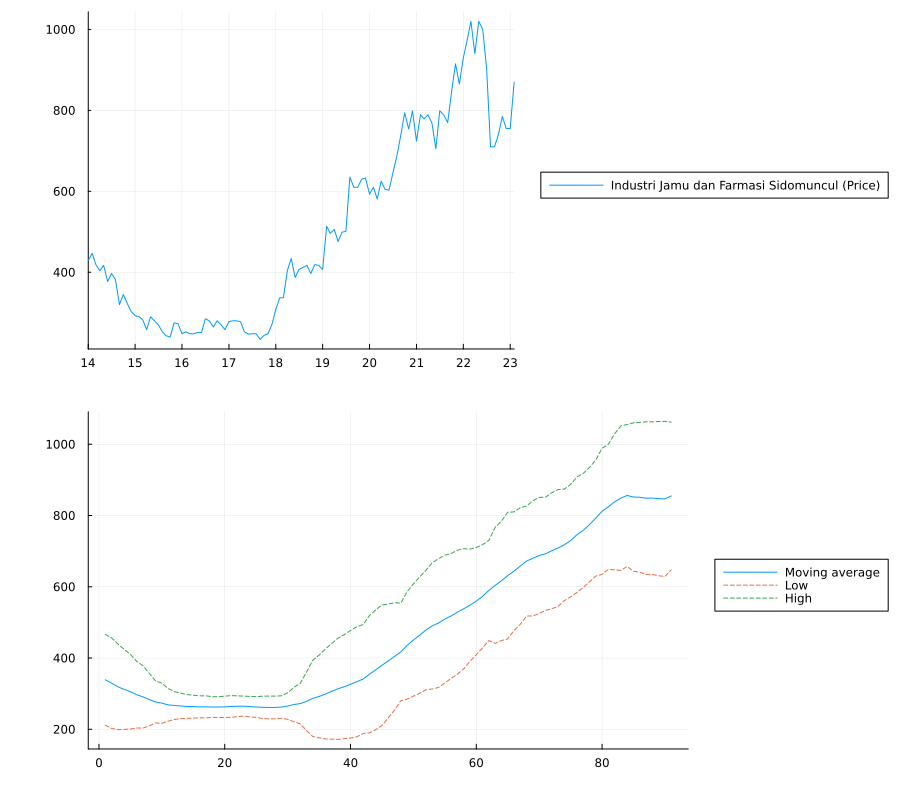

In [51]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filesido = "./csv/IDX-Stocks/SIDO Historical Data.csv"

dfsido = CSV.read(filesido, DataFrame)

dfsido.Price .= parse.(Float64, replace.(dfsido.Price, "," => ""))
dfsido[!,"Change %"] .= parse.(Float64, replace.(dfsido[!,"Change %"], "%" => ""))

dfsido.Dates = Date.(dfsido.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfsido.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimssido = extrema([tick_years; dfsido.Dates])

p1 = plot(dfsido.Dates, dfsido.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimssido,
    label="Industri Jamu dan Farmasi Sidomuncul (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfsido.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


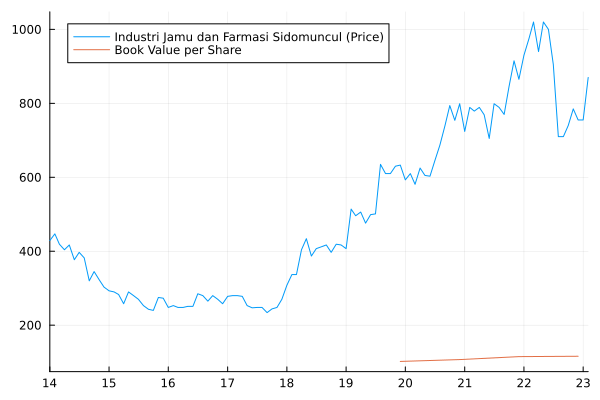

In [19]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filesido = "./csv/IDX-Stocks/SIDO Historical Data.csv"

dfsido = CSV.read(filesido, DataFrame)

dfsido.Price .= parse.(Float64, replace.(dfsido.Price, "," => ""))
dfsido[!,"Change %"] .= parse.(Float64, replace.(dfsido[!,"Change %"], "%" => ""))

dfsido.Dates = Date.(dfsido.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfsido.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimssido = extrema([tick_years; dfsido.Dates])

plot(dfsido.Dates, dfsido.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimssido,
    label="Industri Jamu dan Farmasi Sidomuncul (Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y"), Date("01/12/2022", "d/m/y")];
y = [102, 107, 115, 116];
plot!(x,y, label="Book Value per Share")

## Waskita Karya

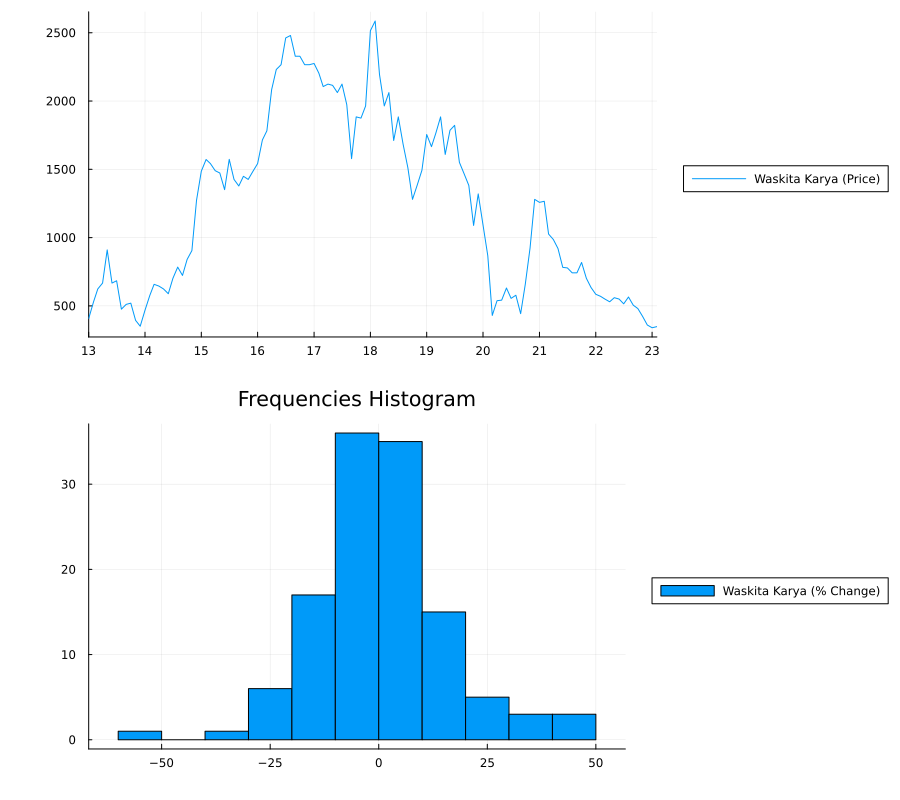

In [52]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filewskt = "./csv/IDX-Stocks/WSKT Historical Data.csv"

dfwskt = CSV.read(filewskt, DataFrame)

dfwskt.Price .= parse.(Float64, replace.(dfwskt.Price, "," => ""))
dfwskt[!,"Change %"] .= parse.(Float64, replace.(dfwskt[!,"Change %"], "%" => ""))

dfwskt.Dates = Date.(dfwskt.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfwskt.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimswskt = extrema([tick_years; dfwskt.Dates])

p1 = plot(dfwskt.Dates, dfwskt.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimswskt,
    label="Waskita Karya (Price)", xlabel="", ylabel="")
p2 = histogram(dfwskt.Date, dfwskt[!,"Change %"], title="Frequencies Histogram",
    label="Waskita Karya (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


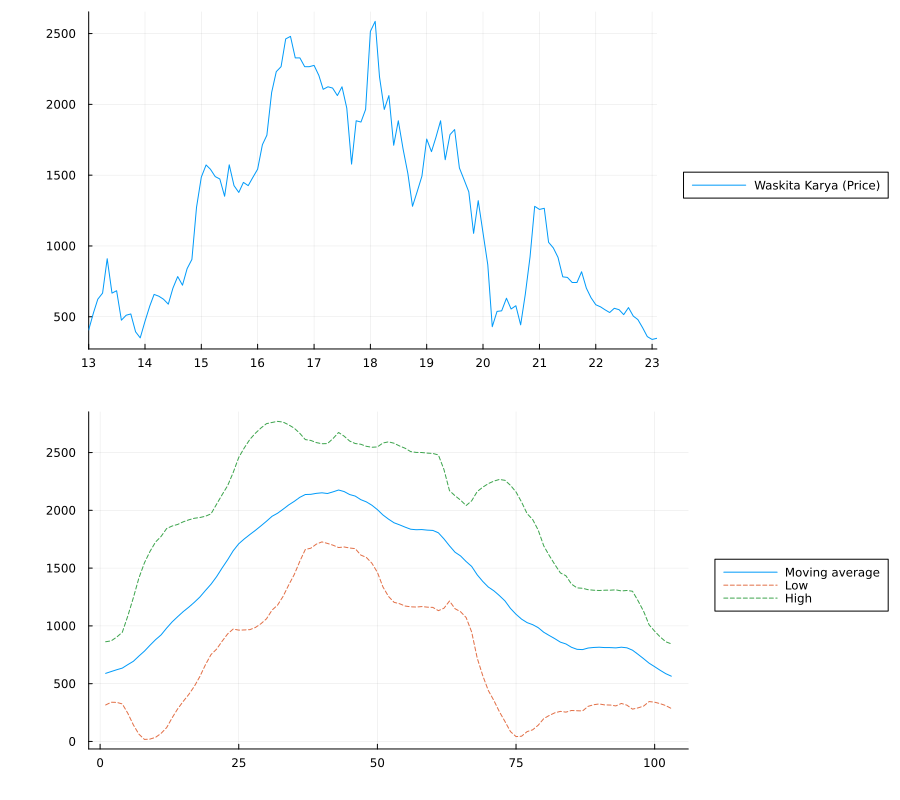

In [53]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filewskt = "./csv/IDX-Stocks/WSKT Historical Data.csv"

dfwskt = CSV.read(filewskt, DataFrame)

dfwskt.Price .= parse.(Float64, replace.(dfwskt.Price, "," => ""))
dfwskt[!,"Change %"] .= parse.(Float64, replace.(dfwskt[!,"Change %"], "%" => ""))

dfwskt.Dates = Date.(dfwskt.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfwskt.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimswskt = extrema([tick_years; dfwskt.Dates])

p1 = plot(dfwskt.Dates, dfwskt.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimswskt,
    label="Waskita Karya (Price)", xlabel="", ylabel="")

# Set up MA and Bollinger Band
prices = dfwskt.Price;
moving_average = rollmean(prices, 20);
moving_std = rollstd(prices, 20);

bollinger_high = moving_average .+ 2moving_std;
bollinger_low = moving_average .- 2moving_std;

p2 = plot([moving_average bollinger_low bollinger_high], 
    label = ["Moving average" "Low" "High"], ls = [:solid :dash :dash])

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


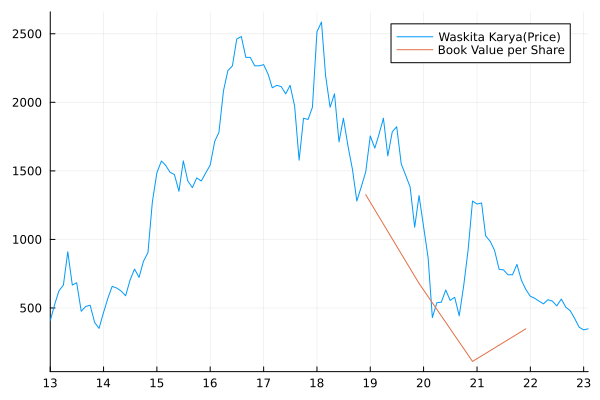

In [20]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures, RollingFunctions

filewskt = "./csv/IDX-Stocks/WSKT Historical Data.csv"

dfwskt = CSV.read(filewskt, DataFrame)

dfwskt.Price .= parse.(Float64, replace.(dfwskt.Price, "," => ""))
dfwskt[!,"Change %"] .= parse.(Float64, replace.(dfwskt[!,"Change %"], "%" => ""))

dfwskt.Dates = Date.(dfwskt.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfwskt.Dates)))
DateTick = Dates.format.(tick_years, "yy")
xlimswskt = extrema([tick_years; dfwskt.Dates])

plot(dfwskt.Dates, dfwskt.Price, title="",
    xticks=(tick_years,DateTick), xlims=xlimswskt,
    label="Waskita Karya(Price)", xlabel="", ylabel="")

# Set Book Value per Share
x = [Date("01/12/2018", "d/m/y"), Date("01/12/2019", "d/m/y"), Date("01/12/2020", "d/m/y"), Date("01/12/2021", "d/m/y")];
y = [1326, 679, 110, 348];
plot!(x,y, label="Book Value per Share")

# Chapter III: Commodities

Commodities are used as raw materials for industry.

We will show the price plot over time and the histogram of the change (in %) for these commodities:

1. Gold

2. Crude Oil WTI

3. Natural Gas

4. US Soybeans

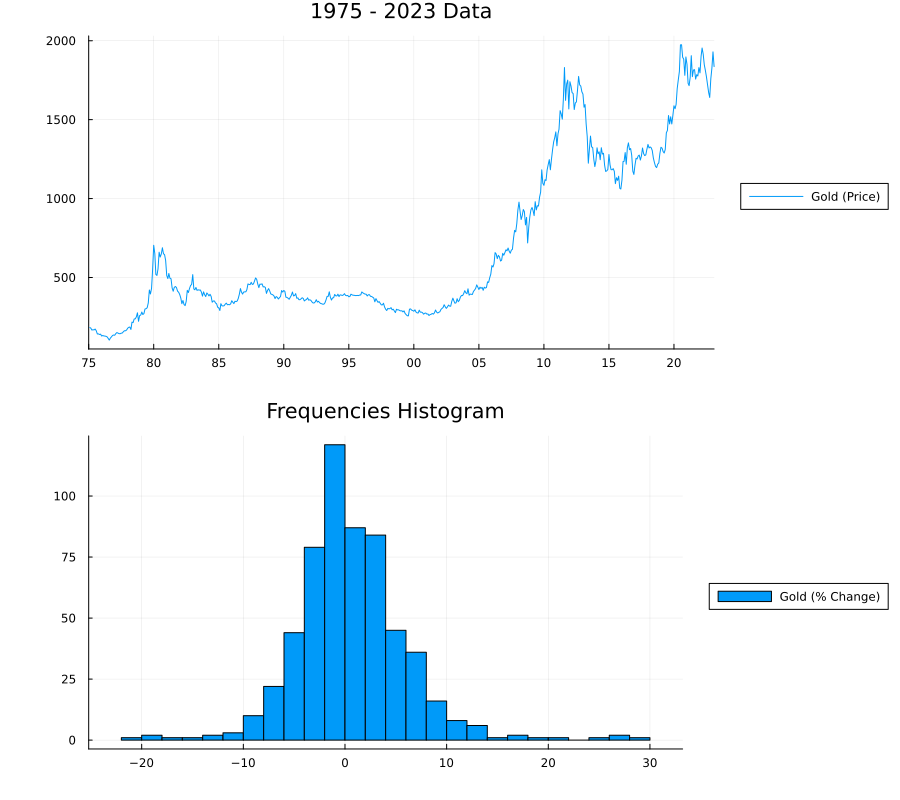

In [68]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filegold = "./csv/Gold Futures Historical Data.csv"

dfgold = CSV.read(filegold, DataFrame)

dfgold.Price .= parse.(Float64, replace.(dfgold.Price, "," => ""))
dfgold[!,"Change %"] .= parse.(Float64, replace.(dfgold[!,"Change %"], "%" => ""))

dfgold.Dates = Date.(dfgold.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgold.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsgold = extrema([tick_years; dfgold.Dates])

p1 = plot(dfgold.Dates, dfgold.Price, title="1975 - 2023 Data",
    xticks=(tick_years,DateTick), xlims=xlimsgold,
    label="Gold (Price)", xlabel="", ylabel="")
p2 = histogram(dfgold.Date, dfgold[!,"Change %"], title="Frequencies Histogram",
    label="Gold (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


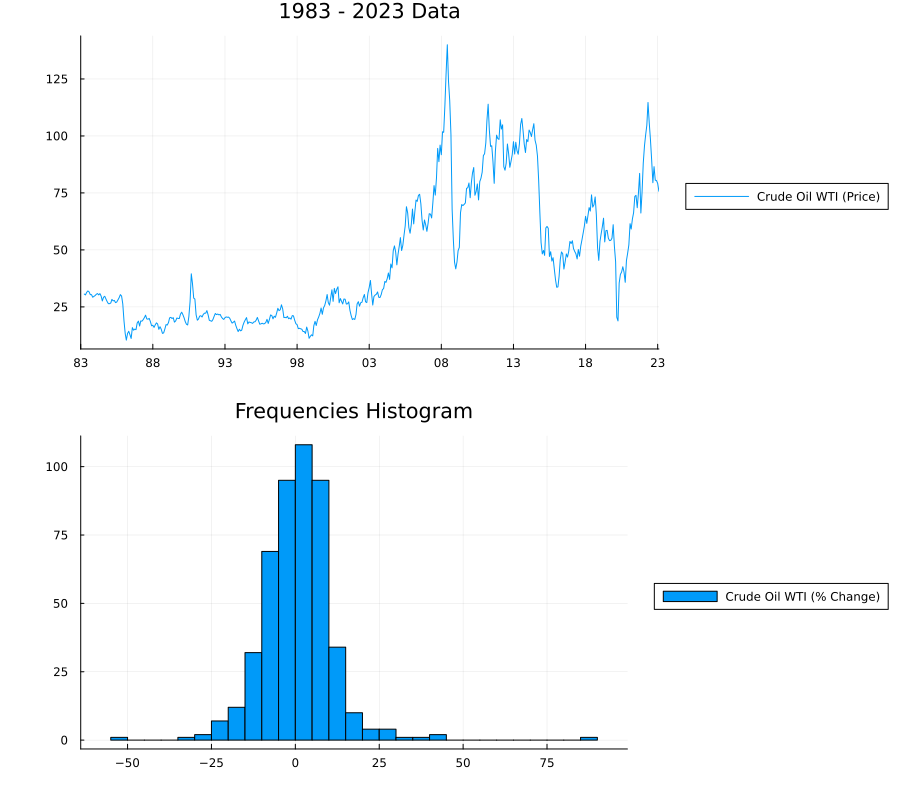

In [69]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filecrudeoil = "./csv/Crude Oil WTI Futures Historical Data.csv"

dfcrudeoil = CSV.read(filecrudeoil, DataFrame)

dfcrudeoil[!,"Change %"] .= parse.(Float64, replace.(dfcrudeoil[!,"Change %"], "%" => ""))

dfcrudeoil.Dates = Date.(dfcrudeoil.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfcrudeoil.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimscrudeoil = extrema([tick_years; dfcrudeoil.Dates])

p1 = plot(dfcrudeoil.Dates, dfcrudeoil.Price, title="1983 - 2023 Data",
    xticks=(tick_years,DateTick), xlims=xlimscrudeoil,
    label="Crude Oil WTI (Price)", xlabel="", ylabel="")
p2 = histogram(dfcrudeoil.Date, dfcrudeoil[!,"Change %"], title="Frequencies Histogram",
    label="Crude Oil WTI (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


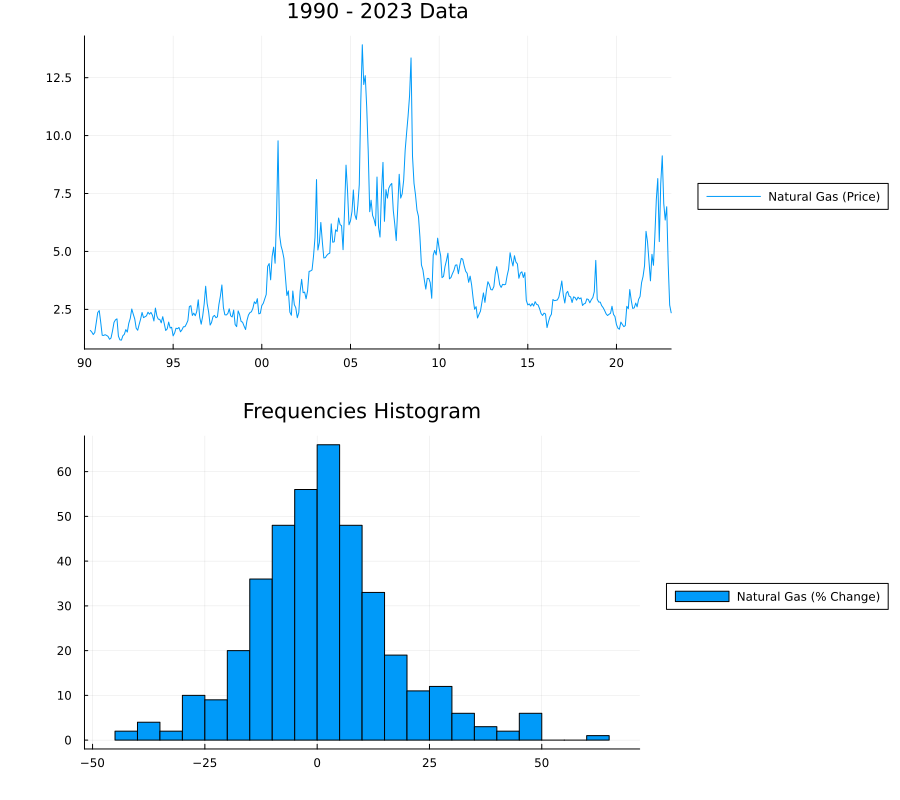

In [56]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filegas = "./csv/Natural Gas Futures Historical Data.csv"

dfgas = CSV.read(filegas, DataFrame)

dfgas[!,"Change %"] .= parse.(Float64, replace.(dfgas[!,"Change %"], "%" => ""))

dfgas.Dates = Date.(dfgas.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgas.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsgas = extrema([tick_years; dfgas.Dates])

p1 = plot(dfgas.Dates, dfgas.Price, title="1990 - 2023 Data",
    xticks=(tick_years,DateTick), xlims=xlimsgas,
    label="Natural Gas (Price)", xlabel="", ylabel="")
p2 = histogram(dfgas.Date, dfgas[!,"Change %"], title="Frequencies Histogram",
    label="Natural Gas (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


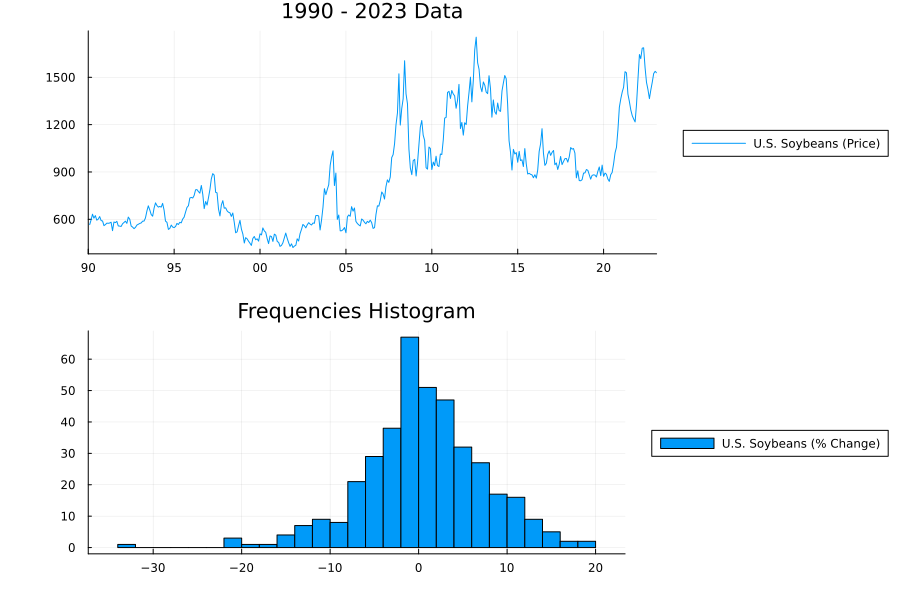

In [57]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileussoybeans = "./csv/US Soybeans Futures Historical Data.csv"

dfussoybeans = CSV.read(fileussoybeans, DataFrame)

dfussoybeans.Price .= parse.(Float64, replace.(dfussoybeans.Price, "," => ""))
dfussoybeans[!,"Change %"] .= parse.(Float64, replace.(dfussoybeans[!,"Change %"], "%" => ""))

dfussoybeans.Dates = Date.(dfussoybeans.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfussoybeans.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsussoybeans = extrema([tick_years; dfussoybeans.Dates])

p1 = plot(dfussoybeans.Dates, dfussoybeans.Price, title="1990 - 2023 Data",
    xticks=(tick_years,DateTick), xlims=xlimsussoybeans,
    label="U.S. Soybeans (Price)", xlabel="", ylabel="")
p2 = histogram(dfussoybeans.Date, dfussoybeans[!,"Change %"], title="Frequencies Histogram",
    label="U.S. Soybeans (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,600), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


# Chapter IV: Currencies

Currency, is a system of money in general use in a particular country at a specific time. We live in a world with lots of countries that use their own currencies, thus there is this currency rate.

We will show the price plot over time and the histogram of the change (in %) for these currencies rate:

1. EUR/USD

2. GBP/USD

3. USD/JPY

4. USD/IDR

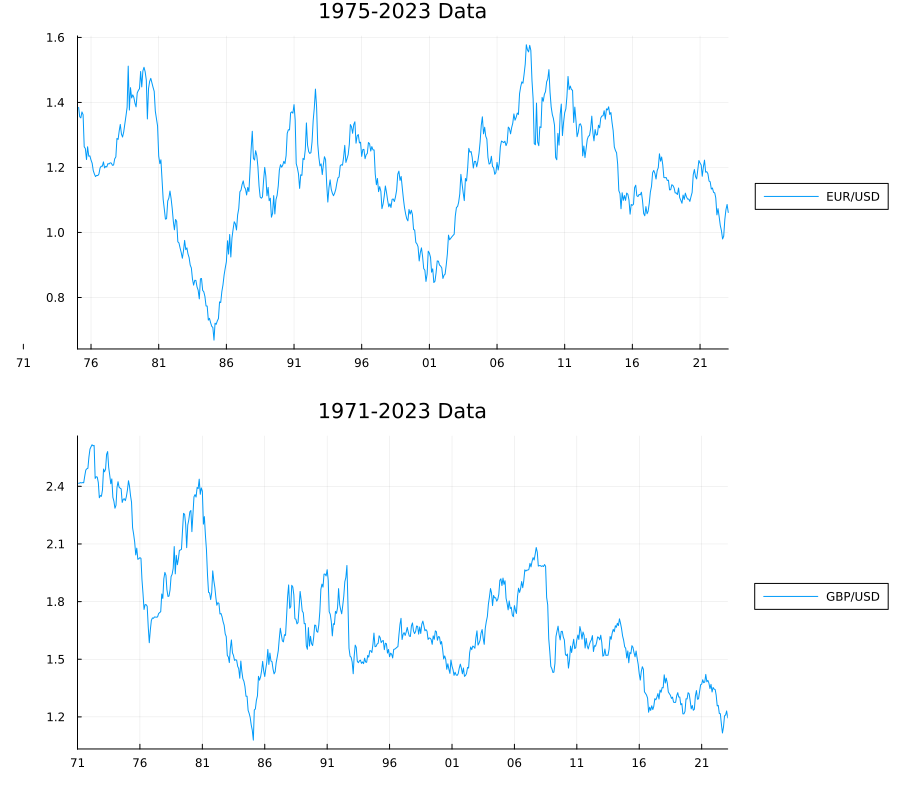

In [58]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileeurusd = "./csv/EUR_USD Historical Data.csv"
filegbpusd = "./csv/GBP_USD Historical Data.csv"

dfeurusd = CSV.read(fileeurusd, DataFrame)
dfgbpusd = CSV.read(filegbpusd, DataFrame)

dfeurusd.Dates = Date.(dfeurusd.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfeurusd.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimseurusd = extrema([tick_years; dfeurusd.Dates])

dfgbpusd.Dates = Date.(dfgbpusd.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfgbpusd.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsgbpusd = extrema([tick_years; dfgbpusd.Dates])

p1 = plot(dfeurusd.Dates, dfeurusd.Price, title="1975-2023 Data",
    xticks=(tick_years,DateTick), xlims = xlimseurusd, 
    label="EUR/USD", xlabel="", ylabel="")
p2 = plot(dfgbpusd.Dates, dfgbpusd.Price, title="1971-2023 Data",
    xticks=(tick_years,DateTick), xlims = xlimsgbpusd,
    label="GBP/USD", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


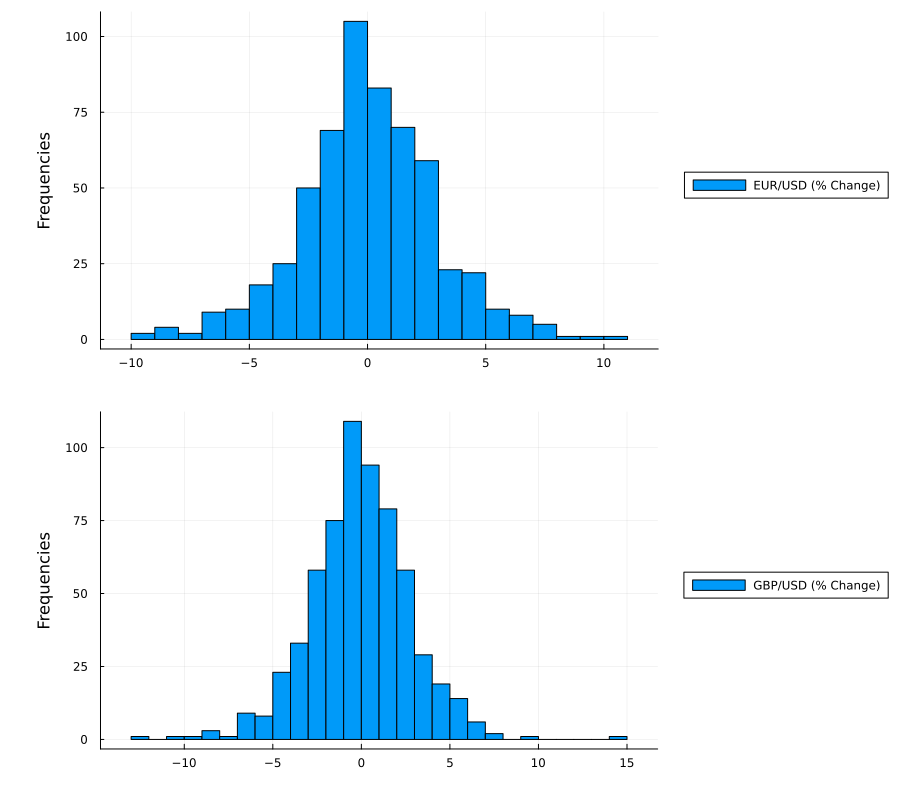

In [59]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileeurusd = "./csv/EUR_USD Historical Data.csv"
filegbpusd = "./csv/GBP_USD Historical Data.csv"

dfeurusd = CSV.read(fileeurusd, DataFrame)
dfgbpusd = CSV.read(filegbpusd, DataFrame)

dfeurusd[!,"Change %"] .= parse.(Float64, replace.(dfeurusd[!,"Change %"], "%" => ""))
dfgbpusd[!,"Change %"] .= parse.(Float64, replace.(dfgbpusd[!,"Change %"], "%" => ""))

p1 = histogram(dfeurusd.Date, dfeurusd[!,"Change %"], title="",
    label="EUR/USD (% Change)", xlabel="", ylabel="")
p2 = histogram(dfgbpusd.Date, dfgbpusd[!,"Change %"], title="",
    label="GBP/USD (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Frequencies")


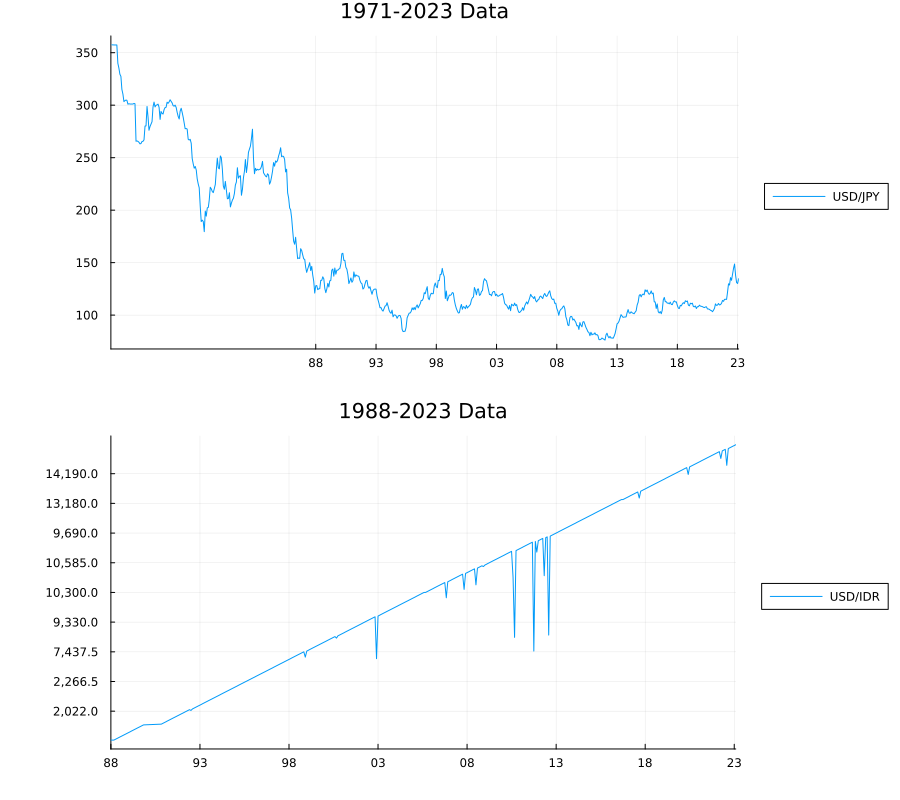

In [60]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileusdjpy = "./csv/USD_JPY Historical Data.csv"
fileusdidr = "./csv/USD_IDR Historical Data.csv"

dfusdjpy = CSV.read(fileusdjpy, DataFrame)
dfusdidr = CSV.read(fileusdidr, DataFrame)

dfusdjpy.Dates = Date.(dfusdjpy.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfusdjpy.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsusdjpy = extrema([tick_years; dfusdjpy.Dates])

dfusdidr.Dates = Date.(dfusdidr.Date, "mm/dd/yyyy")
tick_years = Date.(unique(Dates.year.(dfusdidr.Dates)))
tick_years = minimum(tick_years):Year(5):maximum(tick_years)
DateTick = Dates.format.(tick_years, "yy")
xlimsusdidr = extrema([tick_years; dfusdidr.Dates])

p1 = plot(dfusdjpy.Dates, dfusdjpy.Price, title="1971-2023 Data",
    xticks=(tick_years,DateTick), xlims = xlimsusdjpy, 
    label="USD/JPY", xlabel="", ylabel="")
p2 = plot(dfusdidr.Dates, dfusdidr.Price, title="1988-2023 Data",
    xticks=(tick_years,DateTick), xlims = xlimsusdidr,
    label="USD/IDR", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


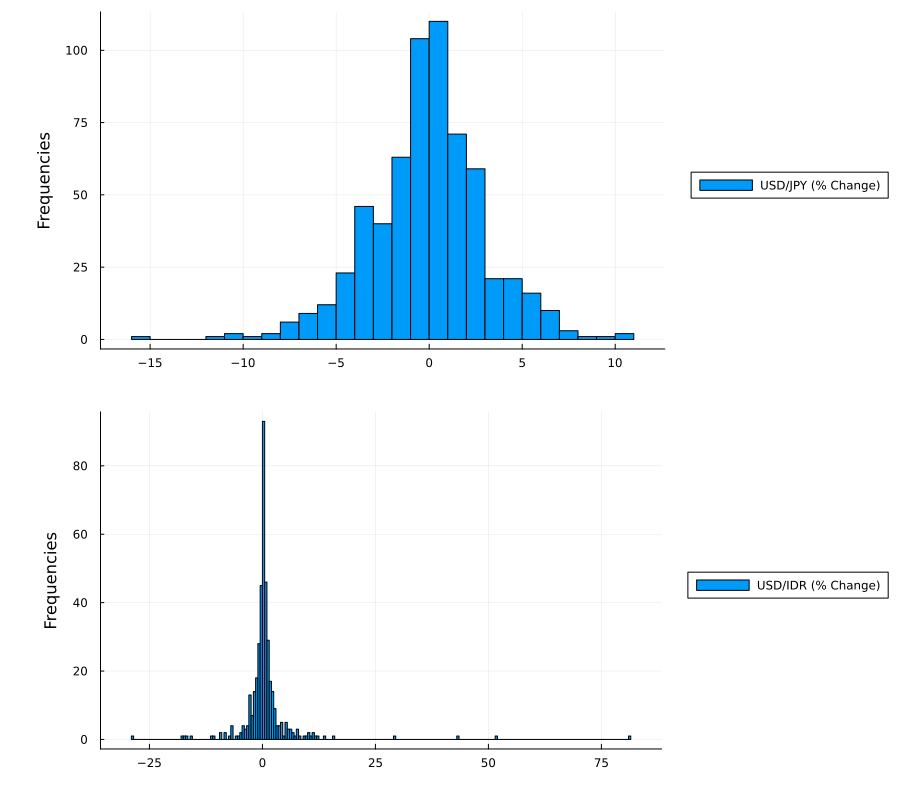

In [61]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

fileusdjpy = "./csv/USD_JPY Historical Data.csv"
fileusdidr = "./csv/USD_IDR Historical Data.csv"

dfusdjpy = CSV.read(fileusdjpy, DataFrame)
dfusdidr = CSV.read(fileusdidr, DataFrame)

dfusdjpy[!,"Change %"] .= parse.(Float64, replace.(dfusdjpy[!,"Change %"], "%" => ""))
dfusdidr[!,"Change %"] .= parse.(Float64, replace.(dfusdidr[!,"Change %"], "%" => ""))

p1 = histogram(dfusdjpy.Date, dfusdjpy[!,"Change %"], title="",
    label="USD/JPY (% Change)", xlabel="", ylabel="")
p2 = histogram(dfusdidr.Date, dfusdidr[!,"Change %"], title="",
    label="USD/IDR (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Frequencies")


# Chapter V: United States Government Bond

A bond is a fixed-income investment that represents a loan made by an investor to a borrower, ususally corporate or governmental.

We will show the price plot over time and the histogram of the change (in %) for these bonds:

1. U.S. 3-Month Bond Yield

2. U.S. 5-Year Bond Yield

3. U.S. 10-Year Bond Yield

4. U.S. 30-Year Bond Yield

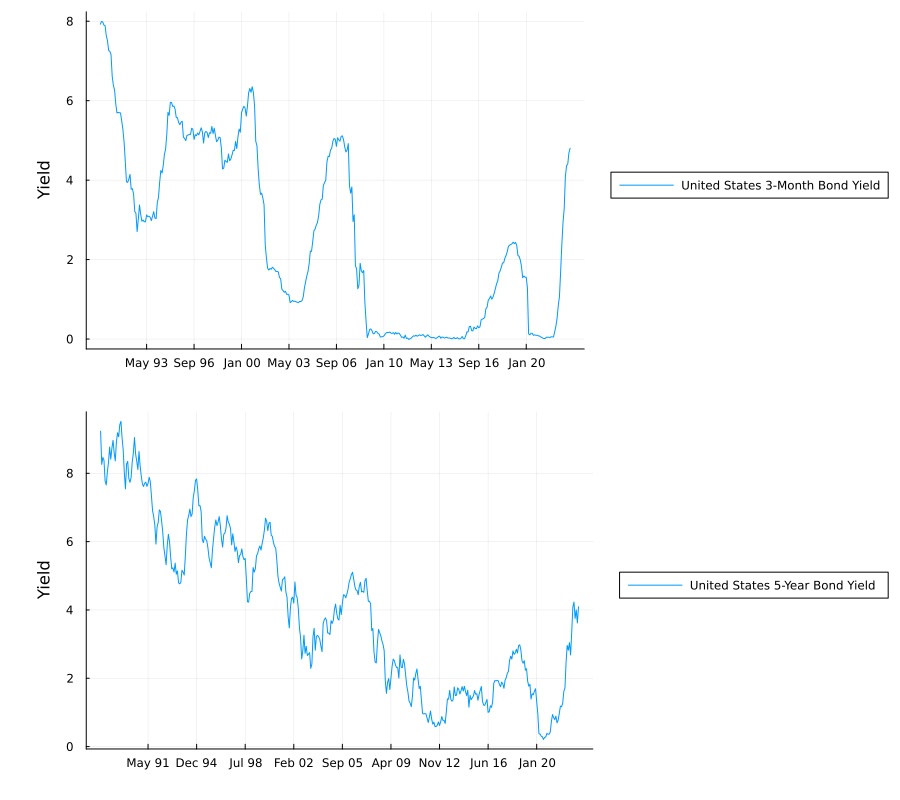

In [62]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebond3m = "./csv/United States 3-Month Bond Yield Historical Data.csv"
filebond5y = "./csv/United States 5-Year Bond Yield Historical Data.csv"

dfbond3m = CSV.read(filebond3m, DataFrame)
dfbond5y = CSV.read(filebond5y, DataFrame)

p1 = plot(dfbond3m.Date, dfbond3m.Price, title="",
    label="United States 3-Month Bond Yield", xlabel="", ylabel="")
p2 = plot(dfbond5y.Date, dfbond5y.Price, title="",
    label="United States 5-Year Bond Yield ", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Yield")


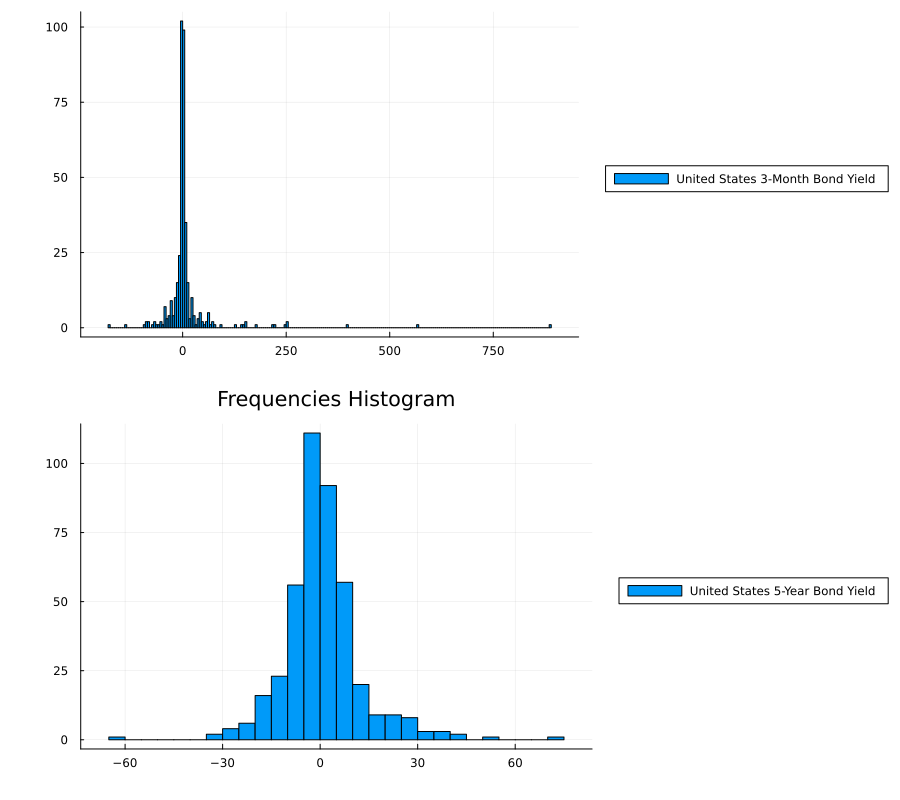

In [63]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebond3m = "./csv/United States 3-Month Bond Yield Historical Data.csv"
filebond5y = "./csv/United States 5-Year Bond Yield Historical Data.csv"

dfbond3m = CSV.read(filebond3m, DataFrame)
dfbond5y = CSV.read(filebond5y, DataFrame)

dfbond3m[!,"Change %"] .= parse.(Float64, replace.(dfbond3m[!,"Change %"], "%" => ""))
dfbond5y[!,"Change %"] .= parse.(Float64, replace.(dfbond5y[!,"Change %"], "%" => ""))

p1 = histogram(dfbond3m.Date, dfbond3m[!,"Change %"], title="",
    label="United States 3-Month Bond Yield ", xlabel="", ylabel="")
p2 = histogram(dfbond5y.Date, dfbond5y[!,"Change %"], title="Frequencies Histogram",
    label="United States 5-Year Bond Yield ", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "")


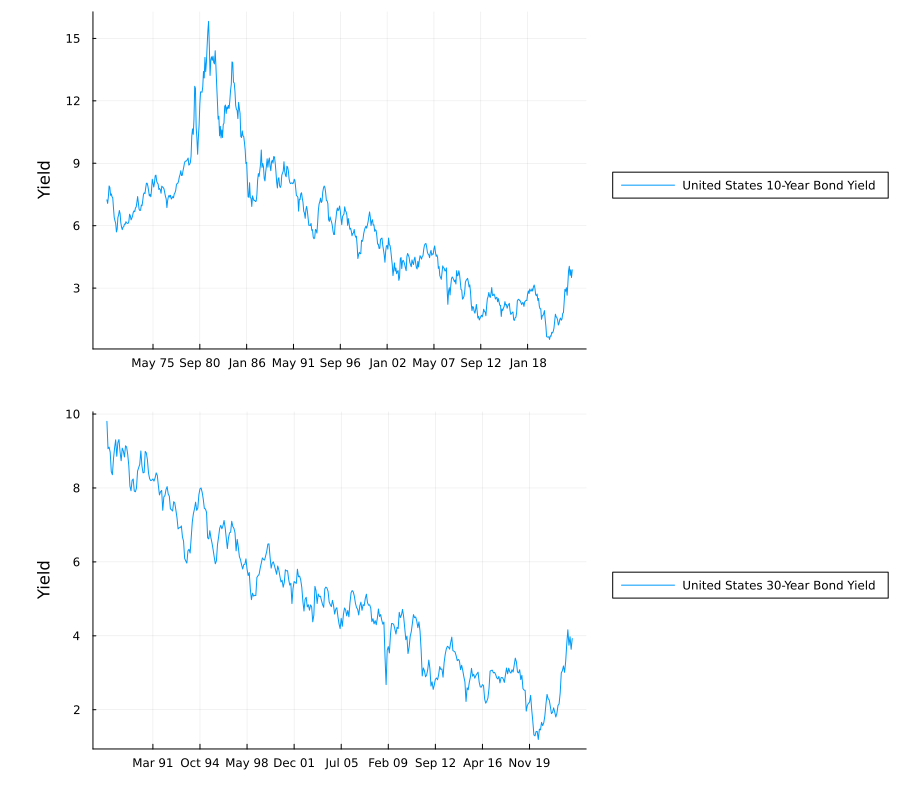

In [64]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebond10y = "./csv/United States 10-Year Bond Yield Historical Data.csv"
filebond30y = "./csv/United States 30-Year Bond Yield Historical Data.csv"

dfbond10y = CSV.read(filebond10y, DataFrame)
dfbond30y = CSV.read(filebond30y, DataFrame)

p1 = plot(dfbond10y.Date, dfbond10y.Price, title="",
    label="United States 10-Year Bond Yield ", xlabel="", ylabel="")
p2 = plot(dfbond30y.Date, dfbond30y.Price, title="",
    label="United States 30-Year Bond Yield ", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Yield")


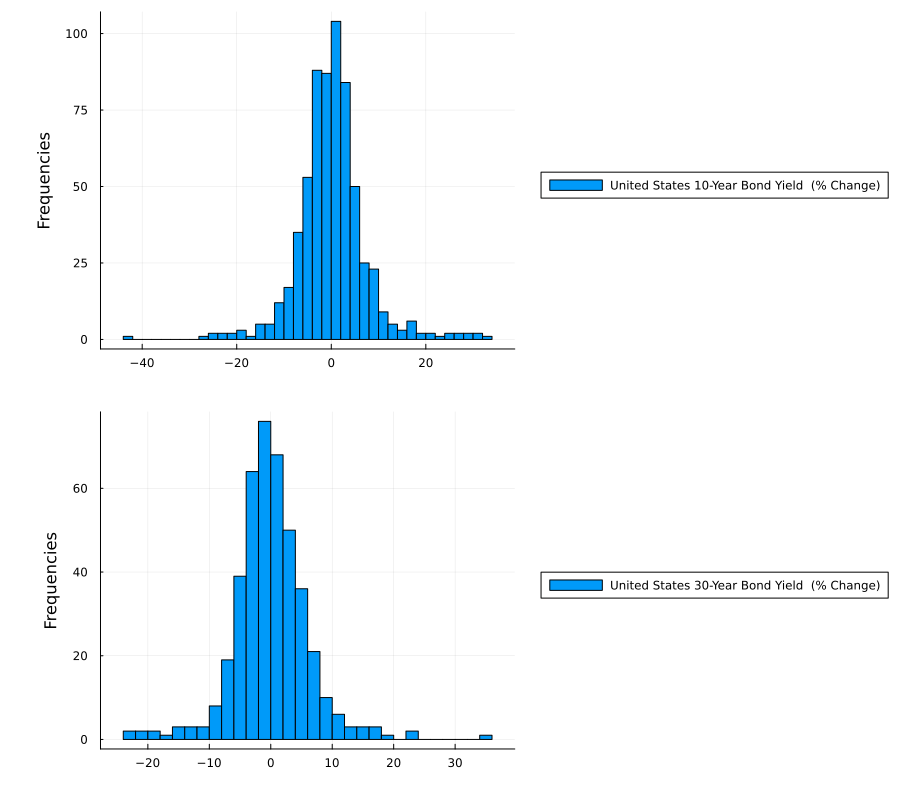

In [65]:
using CSV, Dates, DataFrames, Plots, Plots.PlotMeasures

filebond10y = "./csv/United States 10-Year Bond Yield Historical Data.csv"
filebond30y = "./csv/United States 30-Year Bond Yield Historical Data.csv"

dfbond10y = CSV.read(filebond10y, DataFrame)
dfbond30y = CSV.read(filebond30y, DataFrame)

dfbond10y[!,"Change %"] .= parse.(Float64, replace.(dfbond10y[!,"Change %"], "%" => ""))
dfbond30y[!,"Change %"] .= parse.(Float64, replace.(dfbond30y[!,"Change %"], "%" => ""))

p1 = histogram(dfbond10y.Date, dfbond10y[!,"Change %"], title="",
    label="United States 10-Year Bond Yield  (% Change)", xlabel="", ylabel="")
p2 = histogram(dfbond30y.Date, dfbond30y[!,"Change %"], title="",
    label="United States 30-Year Bond Yield  (% Change)", xlabel="", ylabel="")

plot(p1, p2, size=(900,800), layout = (2, 1), 
    legend=:outerright, left_margin=10mm, bottom_margin=5mm,
     xaxis = "", yaxis = "Frequencies")


# Appendix

In [66]:
# To activate project designated for GK BoginyFreya Bank
# Create an empty folder named csv to store the csv files that is in one folder with this notebook
import Pkg
Pkg.activate(".")

  Activating project at `~/LasthrimProjection/JupyterLab/Statistics`


In [67]:
]st

      Status `~/LasthrimProjection/JupyterLab/Statistics/Project.toml`
  [336ed68f] CSV v0.10.9
  [a93c6f00] DataFrames v1.5.0
  [31c24e10] Distributions v0.25.80
  [91a5bcdd] Plots v1.38.5
  [b0e4dd01] RollingFunctions v0.7.0
  [f3b207a7] StatsPlots v0.15.4


Source of Learning:

1. Julia Discourse 

2. StackOverFlow

3. Graham, Benjamin. The Intelligent Investor 4th Edition